In [ ]:
import gym
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import math
from scipy.special import softmax
import tensorflow_probability as tfp

#SEED 2 UEs
tf.random.set_seed(12)
np.random.seed(22)

gamma_dqn = 0.99  # Discount factor for past rewards
epsilon = 1.0  # Epsilon greedy parameter
epsilon_min = 0.1  # Minimum epsilon greedy parameter
epsilon_max = 1.0  # Maximum epsilon greedy parameter
epsilon_interval = (
    epsilon_max - epsilon_min
)  # Rate at which to reduce chance of random action being taken
batch_size_dqn = 32  # Size of batch taken from replay buffer


# connect to 5 - equal amounts

dict_actions = {
    "0": [0.2, 0.,  0.2, 0.,  0.,  0.,  0.,  0.2, 0.2, 0.2], # [7 8 9 2 0]
    "1": [0.,  0.2, 0.2, 0.,  0.2, 0.,  0.,  0.,  0.2, 0.2],  # [9 8 2 4 1
    "2": [0.,  0.2, 0.2, 0.,  0.2, 0.2, 0.,  0.,  0.,  0.2], #[1 5 4 9 2]
    "3": [0.,  0.2, 0.,  0.2, 0.,  0.2, 0.,  0.2, 0.2, 0. ], # [3 5 1 8 7]
    "4": [0.2 ,0.2, 0.,  0.2, 0.,  0.,  0.,  0.2, 0.2, 0. ], #[3 1 0 8 7]
    "5": [0.,  0.2, 0.2, 0.2, 0.,  0.,  0.2, 0.,  0.,  0.2], #[1 9 6 3 2]
    "6": [0. , 0. , 0.2, 0.,  0.2, 0. , 0.2, 0.2, 0.,  0.2],  # [9 2 4 6 7]
    "7": [0.,  0.2 ,0.2, 0.,  0.2, 0. , 0.2, 0. , 0.2, 0. ], #[1 8 2 4 6]
    "8": [0.2 ,0.2, 0.  ,0.2 ,0.2 ,0.2, 0. , 0.,  0. , 0. ], #[5 3 0 4 1]
    "9": [0.2 ,0. , 0.2, 0.,  0.,  0.,  0.2, 0.2, 0.,  0.2]  , #6 0 2 9 7]
}


# connect to 4 - equal amounts
'''
dict_actions = {
    "0": [0.,   0. ,  0.,   0.25, 0.,   0.25, 0.25, 0.,   0.25, 0.  ], # [8 5 6 3]
    "1": [0.  , 0.,   0.25, 0. ,  0.,   0.25, 0.25, 0. ,  0.25, 0.  ],  # [6 2 5 8]
    "2": [0.25, 0.,   0.25, 0.,   0.,   0.25, 0.25, 0.,   0.,   0.  ], #[2 5 6 0]
    "3": [0.25, 0.  , 0.25, 0.,   0. ,  0.25 ,0.,   0.25 ,0.,   0.  ], # [2 0 5 7]
    "4": [0.25, 0.,   0.,   0.,   0.,   0.25, 0.25, 0.,   0.,   0.25], #[9 0 5 6]
    "5": [0. ,  0.25, 0. ,  0.25, 0.,   0.,   0.,   0.25, 0.,   0.25], #7 3 9 1]
    "6": [0.25 ,0.25, 0. ,  0. ,  0. ,  0. ,  0.25, 0.,   0.25, 0.  ],  # [1 0 8 6]
    "7": [0.25, 0.25, 0.25, 0.,   0.25, 0.,   0.,   0.,   0.,   0.  ], #0124
    "8": [0.,   0.25, 0.25, 0.,   0.25, 0.,   0.,   0.,   0.,   0.25], #4 9 2 1]
    "9": [0.,   0.,   0.25, 0.,   0.,   0.25, 0.,   0.25, 0.25, 0.  ]  , #8 5 27
}
'''

# connect to 3 - equal amounts
'''
dict_actions = {
    "0": [0.  ,   0.    ,   0. ,  0.33333333, 0.33333333 ,0., 0. ,  0.33333333, 0.    ,     0.        ], # 7 3 4]
    "1": [0.,  0.33333333, 0.33333333, 0.,  0.,  0., 0., 0.,  0.,   0.33333333],  # [9 2 1]
    "2": [0.  ,   0.,   0. ,  0.,   0.,  0.33333333, 0. ,0.  ,0.33333333 ,0.33333333], #8 5 9]
    "3": [0.33333333, 0.33333333, 0.33333333, 0.,  0.,   0., 0.,   0.,    0.,    0.   ], # 2 1 0
    "4": [0.,   0. ,  0.,   0.,   0.,  0.33333333, 0.,  0.33333333, 0.33333333, 0.   ], #[8 7 5]
    "5": [0.33333333, 0.,  0., 0.33333333, 0. ,  0., 0.33333333, 0.,  0. ,  0.  ], #0 6 3
    "6": [0.,  0.33333333, 0., 0.33333333, 0.,  0., 0.,  0.33333333, 0.,  0.    ],  # 3  1 7
    "7": [0. ,  0.33333333, 0., 0.33333333, 0.,  0.33333333, 0.,   0.,  0.,  0.      ], #3 5 1]
    "8": [0. ,   0. ,   0.,   0.  ,   0.  ,   0.33333333, 0.33333333, 0.,  0.33333333, 0. ], #5 6 8]
    "9": [0. ,   0. ,   0.,   0.33333333  ,   0.33333333  ,   0.33333333, 0. , 0.,  0., 0. ], #3 5 4
}
'''






# connect to 5 - random amounts
'''
dict_actions = {
    "0": [0.  ,   0.19074129, 0.23633142, 0.2256996,  0.20456269, 0., 0.142665   ,0. ,0.  ,0. ],  #[1 3 4 2 6]
    "1": [0.  ,   0.27189425, 0., 0.17030932, 0.21046934, 0.26938872, 0.,     0. ,  0.07793836, 0.  ], # 3 1 5 4 8
    "2": [0.10275102, 0.30264126, 0.,  0.,   0. ,   0., 0., 0.22669452, 0.25906022, 0.10885299], # [8 7 9 0 1]
    "3": [0.16654872, 0.32358239, 0., 0.03368735, 0.08192548, 0., 0.,  0.,  0.39425605, 0.   ], # [1 8 0 4 3]
    "4": [0.,   0.,  0.31711721, 0.19388919, 0.,  0.34970154, 0.,  0.,  0.13587448, 0.00341758], #[5 9 2 8 3]
    "5": [0. ,  0.,   0.17191809, 0.,  0.25712362, 0.23524776, 0.,  0.0499325,  0.28577802, 0.      ], # 4 2 5 7 8
    "6": [0.24856655, 0.27759128, 0.,  0.14852409, 0.3071876,  0.01813048, 0.,   0.,   0.,   0.      ],  # 3 5 1 0 4]
    "7": [0.2183542,  0.,   0.,  0.25829537, 0.1073336,  0., 0.2033568 , 0.21266003, 0., 0.  ],  #6 0 4 7 3
    "8": [0. ,  0.,  0.22402612, 0.14459276 , 0.26519119, 0.23269341, 0., 0.13349653, 0. ,   0.   ], #  [7 2 3 5 4]
    "9": [0.17358963, 0.,  0.,  0.22797795, 0.,  0.26112856, 0.05295353, 0. , 0.28435033, 0.        ] # [3 5 6 0 8]
}
'''

# connect to 4 for 10 APs - random amounts
# connect to 4 - random amounts
'''
dict_actions = {
    "0": [0. ,  0.30672732, 0.22149082, 0. ,  0.,   0., 0.34207347, 0.12970839, 0.,    0. ],  #2 7 1 6
    "1": [0., 0.37190641, 0., 0.00255166, 0., 0., 0.,  0., 0.28054312, 0.34499881], #1 4 8 9
    "2": [0.06642009, 0. ,   0.14315798, 0. , 0.3982394,  0., 0.  ,   0.39218253, 0. ,        0.        ], #0 4 2 7
    "3": [0.38996323, 0. ,  0.23200215, 0.  ,       0. ,        0.07947499, 0. ,   0. ,    0. ,   0.29855963], #2 0 9 5
    "4": [0.32024535, 0.13377763, 0.,  0.31586558, 0.,  0.23011145, 0.,  0.,  0.,  0.        ], #5 3 0 1
    "5": [0.21920769, 0.,  0. ,   0.  ,  0.33133828, 0., 0.35642668, 0. ,  0.09302734, 0.   ], # 0 8 4 6
    "6": [0.32075518, 0., 0.03171573, 0.54554279, 0.,   0., 0.,   0.,   0.1019863 , 0.   ],  # 8 0 2 3
    "7": [0. , 0.,   0.,  0.20504993, 0.62749856, 0., 0.07733287, 0.,  0., 0.09011864],  #4 9 3 6
    "8": [0.35933627, 0.10375033, 0.,  0.,   0.,  0., 0.25255831, 0.28435509, 0.,    0.   ], #  6 7 1 0
    "9": [0.  ,   0.28348718, 0.40388053, 0.,  0.14631017, 0.16632211, 0.,  0.,   0.,   0.    ], # 5 4 2 1
}

'''

#connect to 3 for 10 APs - random amounts
'''
dict_actions = {
    "0": [0., 0. ,  0.41328562, 0.24491733, 0., 0.,0. , 0.34179705, 0.,  0. ],  #3 4 8
    "1": [0.,  0.,  0., 0.4394119,  0.,  0.,0.,  0., 0.12806464, 0.43252346], #4 9 10
    "2": [0., 0.36020897, 0.,  0., 0.2914157,  0.,0.34837533, 0.,  0., 0.   ], #2 5 7
    "3": [0.  ,  0.38370845, 0. ,  0.35160323, 0.,  0., 0.26468832, 0.,  0.,  0.  ], #2 4 7
    "4": [0. , 0.33225476, 0.58616668, 0.,  0.,  0., 0.,   0.,   0.,   0.08157857], #2 3 10
    "5": [0. , 0.,   0.,  0.31122126, 0.,  0.,0.25420851, 0.,   0.43457023, 0.  ], # 4 7 9
    "6": [0.25499849, 0.36944131, 0.,  0.,   0.,  0.3755602, 0.,   0.,   0.,    0.    ],  # 1 2 6
    "7": [0.24477583, 0.,   0.,  0.32046166, 0.,  0.43476251, 0.,  0.,   0.,  0.  ],  #1 4 6
    "8": [0. , 0.17818928, 0.14624946, 0., 0.,  0., 0., 0.67556125, 0.,         0.      ], # 2 3 8
    "9": [0.23675027, 0. ,  0.,   0.,  0.42248953, 0., 0.,  0.,  0.3407602,  0.    ], # 1 5 9
}
'''







# connect to 2 for 10 APs - equal amounts
'''
dict_actions = {
    "0": [0.5, 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.5, 0. ],
    "1": [0.,  0.,  0.,  0.5, 0.,  0.,  0.,  0.,  0.5, 0. ],
    "2": [0.5, 0.,  0.5, 0.,  0.,  0.,  0.,  0.,  0.,  0. ],
    "3": [0.,  0.5, 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.5],
    "4": [0.,  0.,  0.,  0.,  0.,  0.,  0.,  0. , 0.5, 0.5],
    "5": [0.,  0.,  0.,  0.,  0.,  0.,  0.5, 0.,  0.5, 0. ], ##
    "6": [0.,  0.,  0.,  0.5, 0.5, 0.,  0.,  0.,  0.,  0. ],  
    "7": [0.,  0.,  0.5, 0.,  0.,  0.,  0.,  0.5, 0.,  0. ],
    "8": [0. , 0. , 0.5, 0.5, 0.,  0.,  0.,  0.,  0. , 0. ],
    "9": [0.,  0.,  0.,  0.,  0.5, 0.5, 0.,  0.,  0.,  0. ],
}
'''

# connect to 2 for 10 APs - random amounts
'''
dict_actions = {
    "0": [0.,  0.,  0.52401754, 0.47598246, 0., 0.,0. ,0. ,0. ,0.  ],
    "1": [0., 0.73175478, 0.26824522, 0.,  0.,  0.,0. ,0. ,0. , 0.],
    "2": [0.,  0.17128827, 0.,  0.,  0.,  0., 0.82871173, 0.,  0.,  0.  ],
    "3": [0.67593495, 0.,  0.32406505, 0.,  0.,  0., 0.,  0.,   0.,   0.   ],
    "4": [0. ,   0.,   0.,  0.,  0.,  0.,0.46805536 ,0. ,   0. , 0.53194464],
    "5": [0. ,  0.82117362, 0.,  0.,  0.,  0., 0.,   0.,  0.,   0.17882638],
    "6": [0.  ,   0.,   0.,   0.,  0.,  0.48705381,0.51294619 ,0. ,0. ,0.  ],
    "7": [0. ,    0.,    0.,    0. ,  0.48747732, 0.51252268,0.,  0.,  0.,  0.   ],
    "8": [0.  ,   0.,  0.,   0.,   0.,   0., 0.45405668, 0.,  0.54594332, 0.  ],
    "9": [0. ,  0.,   0.,  0.,  0.,  0., 0.4212056, 0.,  0.5787944, 0.  ],
}
'''
 # for 10 APs
'''
dict_actions = {
    "0": [0.,         0.,         0.,         0.11501813, 0.,         0.07956493,0.,         0.28960175, 0.28834465, 0.22747054],
    "1": [0.16550045, 0.19532288, 0.19503212, 0.,         0.,         0.,  0.,         0.24558995, 0.1985546,  0. ],
    "2": [0.,         0.26072819, 0.04854112, 0.18195497, 0.30321406, 0.,  0.20292008, 0.,         0.00264159, 0. ],
    "3": [0.,         0.27591962, 0.,         0.01816579, 0.,         0.05353865, 0.2178809,  0.31416588, 0.,         0.12032916],
    "4": [0.,         0.,         0.12637077, 0.31828359, 0.28628475, 0.26906089,0.,         0.,         0.,         0.  ],
    "5": [0.40081547, 0.26967368, 0.,         0.,         0.04336716, 0.,0.16361413, 0.,         0.,         0.12252956],
    "6": [0.,         0.02799477, 0.25291342, 0.22358675, 0.,         0.02567279,0.23228689, 0.23754538, 0.,         0. ],
    "7": [0.,         0.04974401, 0.,         0.22062329, 0.19696887, 0.12064568,  0.,         0.02767109, 0.218917,   0.16543004],
    "8": [0.07876426, 0.,         0.,         0.28494832, 0.27520557, 0.17665331, 0.,         0.,         0.,         0.18442854],
    "9": [0.21521076, 0.15891891, 0.08503499, 0.,         0.20185978, 0.,0.23134307, 0.10763249, 0.,         0.  ]
}
'''


'''
#for 15 APs

dict_actions = {
    "0": [0.21620828, 0.,         0.00250923, 0.07669951, 0. ,        0., 0.,         0.  ,       0.19125853, 0.20724798, 0.17605879, 0., 0.  ,       0.05395346, 0.07606422],
    "1": [0. ,   0.,   0.00081291, 0., 0.19376858, 0., 0.,   0.,  0.09465375, 0., 0.08661127, 0.20342718, 0.17943865, 0.,  0.24128767],
    "2": [0.15339709, 0. ,   0.,   0.,  0.07994063, 0.18879555,0. ,  0.09743929, 0.21640566, 0.,   0.,  0.21968049,0.0443413, 0.,  0.],
    "3": [0.14122426, 0.,0.14757777, 0., 0.15054063, 0.,0., 0.17555916, 0.09680513, 0., 0.11458008, 0.,0.0470996,  0.12661337, 0. ],
    "4": [0.01225043, 0., 0.,  0.18334232, 0.,  0.,0., 0.03582846, 0.189505,   0.,  0.16990186, 0.18793736, 0.01917788, 0.20205668, 0.        ],
    "5": [0.,  0., 0.07047189, 0.16685623, 0.06805834, 0.09098285,  0.15356602, 0.,  0., 0.09974863 ,0.06771011, 0.13785801, 0.03705144, 0.10769649, 0. ],
    "6": [0. ,0. ,0.04305377, 0.14741407, 0. ,0.24588102,0.10751104, 0.22253016, 0.23360994, 0.,   0.,   0.,  0.,0., 0.  ],
    "7": [0.1995657,  0.00417456, 0.12814542, 0.,   0.,   0.,0.,  0.23182056, 0., 0.06034787, 0., 0.23000114,  0.,  0.10208816, 0.0438566 ],
    "8": [0.02104342, 0.18505101, 0.,   0.06935539, 0.10517169, 0.00685132,  0.02727554, 0., 0.0915928,  0.18714162, 0.17941481, 0.,  0.,    0.,      0.12710239],
    "9": [0.02745874, 0.06884756, 0.,  0.,  0.,  0.21168267,0. ,0.16143628, 0.02037108, 0.17110622, 0.16099506, 0.05449668,0.06519315, 0.05841256, 0.],
    "10": [0.,  0.,  0.,  0.12849022, 0.,  0.09293721,0.,   0.14269737, 0.00169285, 0.0923687 , 0.13910788, 0.0312831,  0.11310161, 0.17443594, 0.08388512],
    "11": [0.05973853, 0.09195428, 0.05182429, 0.09080122, 0., 0.09476275,0.18571319, 0.17435847, 0.10011534, 0.,  0., 0.06647099,0.08426093, 0.,    0.      ],
    "12": [0.15823383, 0.12336039, 0.18620851, 0.02251173, 0.16550428, 0., 0.07347478, 0.13450078, 0.,  0.03155479, 0.0114737, 0.09317721,0.,    0.,    0.],
    "13": [0.,  0., 0.19709795, 0.13886968, 0. ,  0.14855692,  0.19558376, 0.  ,  0.05108784, 0.  , 0.17745446, 0.0655285,0.02582088, 0.,  0.        ],
    "14": [0.16494374, 0.06691802, 0., 0.05354922, 0.,  0.,0.16761457, 0.,  0.08424696, 0.,  0.16326579, 0.00389592,0.19038044, 0.10518533, 0.        ],
}
'''

# for 20 APs
'''
dict_actions = {
    "0": [0.08807529, 0.10944973, 0. ,  0., 0.08407573, 0.02759999,0.04594513, 0.04601546, 0.00728861, 0.00071906, 0.03859469, 0.11423297, 0.02994055, 0.04169781, 0.,  0.06402407, 0.08998214, 0.,0.1263455,  0.08601328],
    "1": [0.,  0., 0.12095262, 0.13298823, 0.,   0.1424544, 0., 0.12576262, 0.,    0.,  0.0124651,  0.04612025,0.14164445, 0. ,  0.05762992, 0.,  0.04637206, 0.,0.13336406, 0.04024629],
    "2": [0.13863558, 0.,   0.,  0.14311613, 0.,   0., 0.1335315,  0.10667207, 0.03716071, 0.,  0.09984969, 0.,0.,  0.00028777, 0.13856251, 0.,  0.,  0.05186867,0.11794186, 0.03237351],
    "3": [0.06705751, 0.,   0.,  0.05377693, 0.04687115, 0.1288755,0.,  0.08956961, 0.,  0.,   0.,  0.12259012,0.11165291, 0.08295065, 0.11735936, 0., 0.02216862, 0.,0.15712763, 0.  ],
    "4": [0.00765484, 0.03551327, 0.,  0.0655737,  0.13221918, 0.09039354, 0.10944437, 0.,  0.09100161, 0.05210412, 0.,  0.,0.08647494, 0.07274455, 0.10984194, 0.07170497, 0.,  0.07532896,0.,   0. ],
    "5": [0.05648991, 0.00305753, 0. ,  0.08716637, 0.0797311,  0.15322312,0.  , 0.00770714, 0.1745744 , 0. ,    0. ,     0.09566951,0.  ,   0.,  0.12356997, 0.03766928, 0.00752178, 0.,0.1736199,  0. ],
    "6": [0.0295874,  0.,  0.,  0.,  0.,  0.1090341,0.12893166, 0.,  0.10049425, 0.07652969, 0., 0.10212608,0.05231637, 0.,  0.1066919,  0.08946878, 0.08533228, 0.00333624,0.07487811, 0.04127314],
    "7": [0.1270691,  0.01186108, 0.,  0.14177543, 0.,  0.00466697, 0., 0.03147924, 0.05960381, 0.06049049, 0.13231814, 0.,0.09891919, 0.07527274, 0.,   0.,  0.,  0., 0.12064855, 0.13589525],
    "8": [0.05608317, 0.08667963, 0., 0.14994374, 0. ,  0.15124082, 0.04466934, 0., 0.10368512, 0.12529648, 0.,  0.05415266, 0.12863144, 0. , 0.08936167, 0.,  0. ,  0., 0.01025592, 0.],
    "9": [0.12375797, 0.12890101, 0.02252391, 0., 0.03072959, 0.,0.,  0.02991706, 0., 0.06786984, 0.12911767, 0., 0.,  0., 0.09604695, 0.15773234, 0., 0., 0.05796471, 0.15543896],
    "10":[0.04707615, 0.,  0., 0.14146488, 0.12049841, 0.,0.02123536, 0., 0.11221968, 0., 0.,  0.,0.09644906, 0.1791114,  0.1272557,  0.,  0.,   0.11559767, 0.0390917 , 0. ],
    "11":[0., 0.03023324, 0.,  0.,   0., 0.14236561, 0. ,  0., 0.1152297,  0.01517687, 0., 0.15310286, 0.1447157, 0.15530993, 0.,  0., 0.10649768, 0., 0., 0.13736841],
    "12":[0.,  0.08160519, 0.05044293, 0., 0.1241959,  0., 0., 0.15240992, 0., 0.01676034, 0.14249154, 0., 0., 0.1411196, 0.00321968, 0.07428277, 0.01912686, 0.04420741,0.13177384, 0.01836402],
    "13":[0.06993794, 0.0066146, 0.10802486, 0., 0.07747442, 0.,0.09475481, 0.05738544, 0.07788589, 0.04627104, 0.13323858, 0.,0., 0., 0.11502987, 0.,  0.,  0.09264995,0.12073259, 0. ],
    "14":[0., 0., 0., 0.08910157, 0., 0.,0.04146379, 0.1522839,  0.11823537, 0., 0.14143374, 0., 0.12012572, 0.07278885, 0., 0.07164201, 0., 0.0542957,0.02064423, 0.11798511],
    "15":[0.08889663, 0.07369276, 0.04432663, 0.0644525, 0.11040397, 0.00976997, 0., 0.05259303, 0., 0., 0.0807329, 0.11040574, 0.05158922, 0.01799346, 0.05189345, 0.09798108, 0., 0.09046642, 0., 0.05480224],
    "16":[0., 0.16723028, 0., 0.02641618, 0.13253813, 0.,0.,  0., 0.18738198, 0.02143656, 0.02360059, 0.08336448, 0.,0.12354886, 0., 0., 0.1518813,  0., 0.00780073, 0.07480092],
    "17":[0.08354031, 0., 0.03710782, 0.09867685, 0., 0.11402374,0., 0., 0.06698367, 0.08219821, 0.10099388, 0.,0.08128425, 0., 0., 0.12589752, 0.09189377, 0.,0.1154327, 0.00196729],
    "18":[0.16595931, 0., 0.06849636, 0.11821655, 0.13928567, 0.,0.,  0., 0.06151085, 0.04431556, 0.,  0.,0.,  0., 0., 0.11000476, 0.05517023, 0.09519773,0.14184299, 0.],
    "19":[0., 0., 0.09594622, 0., 0.04614032, 0.,0., 0., 0.06137928, 0.10261184, 0.0196875, 0.08228998,0.05477572, 0.1126652, 0.11887696, 0.0042091, 0.07608084, 0.,0.08243412, 0.14290292]
}
'''



'\ndict_actions = {\n    "0": [0.08807529, 0.10944973, 0. ,  0., 0.08407573, 0.02759999,0.04594513, 0.04601546, 0.00728861, 0.00071906, 0.03859469, 0.11423297, 0.02994055, 0.04169781, 0.,  0.06402407, 0.08998214, 0.,0.1263455,  0.08601328],\n    "1": [0.,  0., 0.12095262, 0.13298823, 0.,   0.1424544, 0., 0.12576262, 0.,    0.,  0.0124651,  0.04612025,0.14164445, 0. ,  0.05762992, 0.,  0.04637206, 0.,0.13336406, 0.04024629],\n    "2": [0.13863558, 0.,   0.,  0.14311613, 0.,   0., 0.1335315,  0.10667207, 0.03716071, 0.,  0.09984969, 0.,0.,  0.00028777, 0.13856251, 0.,  0.,  0.05186867,0.11794186, 0.03237351],\n    "3": [0.06705751, 0.,   0.,  0.05377693, 0.04687115, 0.1288755,0.,  0.08956961, 0.,  0.,   0.,  0.12259012,0.11165291, 0.08295065, 0.11735936, 0., 0.02216862, 0.,0.15712763, 0.  ],\n    "4": [0.00765484, 0.03551327, 0.,  0.0655737,  0.13221918, 0.09039354, 0.10944437, 0.,  0.09100161, 0.05210412, 0.,  0.,0.08647494, 0.07274455, 0.10984194, 0.07170497, 0.,  0.07532896,0.,   0. ]

In [ ]:
data = files.upload()
for f in data.keys():
    file = open(f, 'r')
    lines = file.readlines()
print(lines)

Saving VER3_PLS_DONE_PLS_ACTUAL_FINAL_SHADDD_Hmat_scenario3_10APs_Multi_3_users_FUNFINALACTUREG_complex_50000_7_28_ExtendingTesting_ver62.txt to VER3_PLS_DONE_PLS_ACTUAL_FINAL_SHADDD_Hmat_scenario3_10APs_Multi_3_users_FUNFINALACTUREG_complex_50000_7_28_ExtendingTesting_ver62 (5).txt


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
num_APs = 10
num_user = 3
pos = 0
raw_iq = []
complex_vec = []
complex_vec_total = []
count = 0
count2 = 0

for i in range(num_user):
  temp = lines[pos+i]
  temp = temp.strip()
  temp = temp.split(' ')
  raw_iq.append(temp)
  print(raw_iq[i])

for i in range(num_user):
  for jslack in raw_iq[i]:
  #i = float(i)
    if count % 2 == 0:
      tens = float(raw_iq[i][count])
    if  count % 2 == 1:
      complex_vec.append(complex(tens,float(raw_iq[i][count])))
      count2 = count2+ 1
    count = count + 1
  complex_vec_total.append(complex_vec)
  complex_vec = []
  count = 0
  count2 = 0

print(complex_vec_total[0])
print(complex_vec_total[1])


['0.00165', '-0.00275', '-0.00229', '-0.00048', '0.00014', '0.00076', '0.00173', '0.00107', '-0.00156', '-0.00164', '-0.00313', '0.00224', '-0.00942', '-0.00156', '0.00727', '0.00887', '-0.00563', '0.01007', '-0.00580', '0.00812']
['-0.00190', '0.00026', '-0.00143', '-0.00197', '-0.00058', '-0.00001', '0.00203', '0.00053', '0.00197', '0.00147', '-0.00320', '0.00189', '-0.00554', '-0.00529', '-0.01892', '0.01531', '0.00267', '0.00885', '0.00256', '0.00113']
['0.00544', '0.00239', '0.00182', '0.00253', '0.00240', '-0.00114', '-0.00096', '-0.00081', '0.00178', '0.00147', '0.00490', '0.00522', '0.00716', '0.01255', '0.05883', '-0.00440', '0.01458', '0.01323', '-0.01460', '-0.00903']
[(0.00165-0.00275j), (-0.00229-0.00048j), (0.00014+0.00076j), (0.00173+0.00107j), (-0.00156-0.00164j), (-0.00313+0.00224j), (-0.00942-0.00156j), (0.00727+0.00887j), (-0.00563+0.01007j), (-0.0058+0.00812j)]
[(-0.0019+0.00026j), (-0.00143-0.00197j), (-0.00058-1e-05j), (0.00203+0.00053j), (0.00197+0.00147j), (-0.0

In [ ]:
def converttt(lines,id):  
  raw_iq = []
  complex_vec = []
  complex_vec_total = []
  count = 0
  count2 = 0

  for i in range(num_user):
    temp = lines[id+i]
    temp = temp.strip()
    temp = temp.split(' ')
    raw_iq.append(temp)
    print(raw_iq[i])

  for i in range(num_user):
    for jslack in raw_iq[i]:
    #i = float(i)
      if count % 2 == 0:
        tens = float(raw_iq[i][count])
      if  count % 2 == 1:
        complex_vec.append(complex(tens,float(raw_iq[i][count])))
        count2 = count2+ 1
      count = count + 1
    complex_vec_total.append(complex_vec)
    complex_vec = []
    count = 0
    count2 = 0

  return complex_vec_total
  #print(complex_vec_total[0])
  #print(complex_vec_total[1])


In [ ]:

freq = 1*10**6
B = 20*10**6
C = 20
S_u = 10**3
#S_u = 10**6
beta1 = 1
#beta1 = 10
beta2 = 1 #100 for chan 1, 10 for chan 2, 1 for chan 3
p = 100 #100 #(mW)
ada_1 = 1
num_actions = num_APs
num_states = num_APs # ust passing rate
#num_states = num_APs +num_APs#state requires alphas of each AP and channel gains between each AP and the user
'''
problem = "Pendulum-v0"
env = gym.make(problem)

num_states = env.observation_space.shape[0]
print("Size of State Space ->  {}".format(num_states))
num_actions = env.action_space.shape[0]
print("Size of Action Space ->  {}".format(num_actions))
'''

lower_bound = 0
upper_bound = 1
#upper_bound = env.action_space.high[0]
#lower_bound = env.action_space.low[0]

print("Max Value of Action ->  {}".format(upper_bound))
print("Min Value of Action ->  {}".format(lower_bound))

Max Value of Action ->  1
Min Value of Action ->  0


In [ ]:

class OUActionNoise:
    def __init__(self, mean, std_deviation, theta=0.15, dt=1e-2, x_initial=None):
        self.theta = theta
        self.mean = mean
        self.std_dev = std_deviation
        self.dt = dt
        self.x_initial = x_initial
        self.reset()

    def __call__(self):
        # Formula taken from https://www.wikipedia.org/wiki/Ornstein-Uhlenbeck_process.
        x = (
            self.x_prev
            + self.theta * (self.mean - self.x_prev) * self.dt
            + self.std_dev * np.sqrt(self.dt) * np.random.normal(size=self.mean.shape)
        )
        # Store x into x_prev
        # Makes next noise dependent on current one
        self.x_prev = x
        return x

    def reset(self):
        if self.x_initial is not None:
            self.x_prev = self.x_initial
        else:
            self.x_prev = np.zeros_like(self.mean)


In [ ]:

class Buffer:
    def __init__(self, buffer_capacity=100000, batch_size=64):
        # Number of "experiences" to store at max
        self.buffer_capacity = buffer_capacity
        # Num of tuples to train on.
        self.batch_size = batch_size

        # Its tells us num of times record() was called.
        self.buffer_counter = 0

        # Instead of list of tuples as the exp.replay concept go
        # We use different np.arrays for each tuple element
        self.state_buffer = np.zeros((self.buffer_capacity, num_states))
        self.action_buffer = np.zeros((self.buffer_capacity, num_actions))
        self.reward_buffer = np.zeros((self.buffer_capacity, 1))
        self.next_state_buffer = np.zeros((self.buffer_capacity, num_states))

    # Takes (s,a,r,s') obervation tuple as input
    def record(self, obs_tuple):
        # Set index to zero if buffer_capacity is exceeded,
        # replacing old records
        index = self.buffer_counter % self.buffer_capacity

        self.state_buffer[index] = obs_tuple[0]
        self.action_buffer[index] = obs_tuple[1]
        self.reward_buffer[index] = obs_tuple[2]
        self.next_state_buffer[index] = obs_tuple[3]

        self.buffer_counter += 1

    # Eager execution is turned on by default in TensorFlow 2. Decorating with tf.function allows
    # TensorFlow to build a static graph out of the logic and computations in our function.
    # This provides a large speed up for blocks of code that contain many small TensorFlow operations such as this one.
    @tf.function
    def update(
        self, state_batch, action_batch, reward_batch, next_state_batch,
    ):
        # Training and updating Actor & Critic networks.
        # See Pseudo Code.
        with tf.GradientTape() as tape:
            target_actions = target_actor(next_state_batch, training=True)
            y = reward_batch + gamma * target_critic(
                [next_state_batch, target_actions], training=True
            )
            critic_value = critic_model([state_batch, action_batch], training=True)
            critic_loss = tf.math.reduce_mean(tf.math.square(y - critic_value))

        critic_grad = tape.gradient(critic_loss, critic_model.trainable_variables)
        critic_optimizer.apply_gradients(
            zip(critic_grad, critic_model.trainable_variables)
        )

        with tf.GradientTape() as tape:
            actions = actor_model(state_batch, training=True)
            critic_value = critic_model([state_batch, actions], training=True)
            # Used `-value` as we want to maximize the value given
            # by the critic for our actions
            actor_loss = -tf.math.reduce_mean(critic_value)

        actor_grad = tape.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(
            zip(actor_grad, actor_model.trainable_variables)
        )

    # We compute the loss and update parameters
    def learn(self):
        # Get sampling range
        record_range = min(self.buffer_counter, self.buffer_capacity)
        # Randomly sample indices
        batch_indices = np.random.choice(record_range, self.batch_size)

        # Convert to tensors
        state_batch = tf.convert_to_tensor(self.state_buffer[batch_indices])
        action_batch = tf.convert_to_tensor(self.action_buffer[batch_indices])
        reward_batch = tf.convert_to_tensor(self.reward_buffer[batch_indices])
        reward_batch = tf.cast(reward_batch, dtype=tf.float32)
        next_state_batch = tf.convert_to_tensor(self.next_state_buffer[batch_indices])

        self.update(state_batch, action_batch, reward_batch, next_state_batch)


# This update target parameters slowly
# Based on rate `tau`, which is much less than one.
@tf.function
def update_target(target_weights, weights, tau):
    for (a, b) in zip(target_weights, weights):
        a.assign(b * tau + a * (1 - tau))


In [ ]:
##orginal
def get_actor():
    # Initialize weights between -3e-3 and 3-e3
    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)

    inputs = layers.Input(shape=(num_states,))
    out = layers.Dense(256, activation="tanh")(inputs)
    out = layers.BatchNormalization()(out)
    out = layers.Dense(256, activation="tanh")(out)
    out = layers.BatchNormalization()(out)
    outputs = layers.Dense(num_APs, activation="linear", kernel_initializer=last_init)(out) #originally 1 action

    # Our upper bound is 2.0 for Pendulum.
    #outputs = outputs * upper_bound
    model = tf.keras.Model(inputs, outputs)
    
    return model


def get_critic():
    # State as input
    state_input = layers.Input(shape=(num_states))
    #state_out = layers.Dense(16, activation="tanh")(state_input)
    #state_out = layers.Dense(32, activation="tanh")(state_out)

    # Action as input
    action_input = layers.Input(shape=(num_actions))
    #action_out = layers.Dense(32, activation="tanh")(action_input)

    # Both are passed through seperate layer before concatenating
    #concat = layers.Concatenate()([state_out, action_out])
    concat = layers.Concatenate()([state_input, action_input])
    ############################ new
    out = layers.BatchNormalization()(concat)    
    out = layers.Dense(256, activation="tanh")(out)
    ##############################

    #######out = layers.Dense(256, activation="tanh")(concat)
    out = layers.BatchNormalization()(out)
    out = layers.Dense(256, activation="tanh")(out)
    out = layers.BatchNormalization()(out)
    outputs = layers.Dense(num_APs,activation="linear")(out)  #originally sigmoid
    # Outputs single value for give state-action
    model = tf.keras.Model([state_input, action_input], outputs)
    
    return model


In [ ]:
def create_q_model():
    # Network defined by the Deepmind paper
    #######inputs = layers.Input(shape=(84, 84, 4,))
    inputs = layers.Input(shape=(1, num_actions,))
    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)
    # Convolutions on the frames on the screen
    layer1 = layers.Conv1D(8, 1, strides=4, activation="relu")(inputs)
    layer2 = layers.Conv1D(16, 1, strides=2, activation="relu")(layer1)
    layer3 = layers.Conv1D(16, 1, strides=1, activation="relu")(layer2)

    layer4 = layers.Flatten()(layer3)

    layer5 = layers.Dense(256, activation="relu")(layer4)
    actionsssss = layers.Dense(num_actions, activation="linear",kernel_initializer=last_init)(layer5)

    return tf.keras.Model(inputs=inputs, outputs=actionsssss)
'''
def create_q_model():
    # Network defined by the Deepmind paper
    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)

    inputs = layers.Input(shape=(num_states,))
    out = layers.Dense(256) (inputs)   #256 0.01
    out = layers.LeakyReLU(alpha=0.1)(out)
    out = layers.Dense(128)(out)   #128 0.01
    out = layers.LeakyReLU(alpha=0.1)(out)

    #out = layers.Dense(256, activation="relu")(inputs)  #256 tanh
    #out = layers.Dense(128, activation="relu")(out)   # 256 tanh
    outputs = layers.Dense(num_APs, activation="softmax", kernel_initializer=last_init)(out) #originally  softmax

    # Our upper bound is 2.0 for Pendulum.
    #outputs = outputs * upper_bound
    model = tf.keras.Model(inputs, outputs)


    return model

'''


'\ndef create_q_model():\n    # Network defined by the Deepmind paper\n    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)\n\n    inputs = layers.Input(shape=(num_states,))\n    out = layers.Dense(256) (inputs)   #256 0.01\n    out = layers.LeakyReLU(alpha=0.1)(out)\n    out = layers.Dense(128)(out)   #128 0.01\n    out = layers.LeakyReLU(alpha=0.1)(out)\n\n    #out = layers.Dense(256, activation="relu")(inputs)  #256 tanh\n    #out = layers.Dense(128, activation="relu")(out)   # 256 tanh\n    outputs = layers.Dense(num_APs, activation="softmax", kernel_initializer=last_init)(out) #originally  softmax\n\n    # Our upper bound is 2.0 for Pendulum.\n    #outputs = outputs * upper_bound\n    model = tf.keras.Model(inputs, outputs)\n\n\n    return model\n\n'

In [ ]:

def policy(state, noise_object):
    sampled_actions = tf.squeeze(actor_model(state))
    #print('NN output')
    #print(sampled_actions.numpy()) #debug
    temp = sampled_actions
    ###########print('TEMP')
    ##########print(sampled_actions)
    noise = noise_object()
    temp2 = noise
    # Adding noise to action
    '''
    sampled_actions = sampled_actions.numpy() + noise
    
   
     
    # We make sure action is within bounds
    
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)

    legal_action = legal_action/np.sum(legal_action) 

    '''
    
    
    legal_action = sampled_actions.numpy()/np.sum(sampled_actions.numpy()) 
    for val in range(num_APs):
      if legal_action[val] < 0:
        legal_action[val] = 0#legal_action[val]*-1

    #re-normalize
    legal_action = legal_action/np.sum(legal_action) 
  


    #legal_action = softmax(legal_action)
    
    '''
    valll = np.max(legal_action)
    idddd = np.argmax(legal_action)
    update_val = np.random.uniform(0,valll)
    '''
    
   
    #strategy 1
    '''
    inttt_rand = np.random.randint(0,num_APs)
    legal_action[idddd] = legal_action[idddd] - update_val
    legal_action[inttt_rand] = legal_action[inttt_rand] + update_val
    '''

    #strategy 2
    '''
    legal_action[idddd] = legal_action[idddd] - update_val
    for_others_update_val = (update_val)/(num_APs-1)
    listttt = list(range(0,num_APs))
    listttt.pop(idddd)
    for jjj in listttt:
      legal_action[jjj] = legal_action[jjj] + for_others_update_val
    '''
    
 
    #strategy 3
    '''
    percentagesss = np.random.uniform(0,1,num_APs-1)
    percentagesss = percentagesss/np.sum(percentagesss)
    legal_action[idddd] = legal_action[idddd] - update_val
    percentagesss = percentagesss * update_val
    listttt = list(range(0,num_APs))
    listttt.pop(idddd)
    count = 0
    for jjj in listttt:
      if jjj ==  num_APs-1:
        legal_action[jjj] = legal_action[jjj] + percentagesss[idddd]
      else:
        legal_action[jjj] = legal_action[jjj] + percentagesss[jjj]
    '''
    
    
    
    



  


    '''
    legal_action = sampled_actions/np.sum(sampled_actions) 
    noisssse = np.random.rand(1,10)
    legal_action = legal_action + noisssse - np.mean(noisssse)
    '''
    
    
    ################legal_action = legal_action/np.sum(legal_action)

    ####THIS WORKS!!!
    #legal_action = sampled_actions.numpy()/np.sum(sampled_actions.numpy()) 
    

    

    return [np.squeeze(legal_action)]
    

  




In [ ]:

def policy_testing(state):
    sampled_actions = tf.squeeze(actor_model(state))
    #######print('NN output')
    #########print(sampled_actions.numpy()) #debug
    #temp = sampled_actions
    #print('TEMP')
    #print(sampled_actions)
    epsilonn = 10**-6
    #temp2 = noise
    # Adding noise to action
    '''
    sampled_actions = sampled_actions.numpy() + noise
    
   
     
    # We make sure action is within bounds
    
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)

    legal_action = legal_action/np.sum(legal_action) 

    '''


    '''
    for val in range(num_APs):
      if sampled_actions[val] < 0:
        sampled_actions[val] = sampled_actions[val]*-1

   # legal_action = np.clip(sampled_actions, lower_bound, upper_bound)
    legal_action = sampled_actions/np.sum(sampled_actions) 
    noisssse = np.random.rand(1,10)
    legal_action = legal_action + noisssse - np.mean(noisssse)
    '''

    legal_action = sampled_actions.numpy()/np.sum(sampled_actions.numpy())

    for val in range(num_APs):
      if legal_action[val] < 0:
        legal_action[val] = 0#legal_action[val]*-1

    #re-normalize
    legal_action = legal_action/np.sum(legal_action) 


  
    #legal_action = softmax(legal_action)
    #################################legal_action = softmax(sampled_actions.numpy()) 
    #legal_action = np.exp(legal_action) + epsilonn
    #legal_action = np.random.dirichlet(legal_action) 

 
    '''
    HOWHTISWORK
    legal_action = np.random.dirichlet(legal_action)
    legal_action = np.exp(legal_action) + epsilonn
    '''
     

    #legal_action = np.log2(legal_action)
    #legal_action = legal_action/sum(legal_action)



    #legal_action = legal_action + noise #new new
    
    

 
    ###############legal_action = legal_action/np.sum(legal_action) 
    
    
    #legal_action = softmax(sampled_actions.numpy()+noise) #could try with random instead?
    #legal_action = sampled_actions

    '''
    afl = sampled_actions#+noise
    afl = np.clip(afl, lower_bound, upper_bound)

    legal_action = softmax(afl) #could try with random instead?
    '''

    return [np.squeeze(legal_action)]
    

  




In [ ]:
std_dev = 0.2
#ou_noise = OUActionNoise(mean=np.zeros(1), std_deviation=float(std_dev) * np.ones(1))  
##############ou_noise = OUActionNoise(mean=np.zeros(num_APs), std_deviation=float(std_dev) * np.ones(num_APs))  

# The first model makes the predictions for Q-values which are used to
# make a action.
model = create_q_model()
# Build a target model for the prediction of future rewards.
# The weights of a target model get updated every 10000 steps thus when the
# loss between the Q-values is calculated the target Q-value is stable.
model_target = create_q_model()

#actor_model = get_actor()
#critic_model = get_critic()

#target_actor = get_actor()
#target_critic = get_critic()

# Making the weights equal initially
#target_actor.set_weights(actor_model.get_weights())
#target_critic.set_weights(critic_model.get_weights())

# Learning rate for actor-critic models
#These worked!!!
#####critic_lr = 0.02   
#####actor_lr = 0.001     

#tanh tanh linear
critic_lr = 0.002  #0.02 
#7/12 - 7:49
#actor_lr = 0.0001 #0.0001  brings zeros       0.01 makes it close to uniform    7/11/morning12 - did 0.001 got better results
actor_lr = 0.001 #0.001 - 2 users  0.0001

critic_optimizer = tf.keras.optimizers.Adam(critic_lr) #adam
actor_optimizer = tf.keras.optimizers.Adam(actor_lr)  #adam

total_episodes = 300 #300#100!!!! #450 #90 20  200 works  wors   500 episodes
# Discount factr for future rewards 
gamma = 0.7 #0.85 for 2 users 0.7
# Used to update target networks
tau = 0.0001 #0.001

#buffer = Buffer(200, 256) #200, 128 - 2 users was working!!!                50000  #200 -2:55, 64  128 works 10000 256  32 gave nans 512

In [ ]:
# To store reward history of each episode
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  #0.005
ep_reward_list = []
solo1 = []
solo2 = []
# To store average reward history of last few episodes
dqn_ep_reward_list = []
const_reward_list = []
unif_reward_list = []
new_reward = 0
best_alphas = np.zeros(shape=(1,num_APs))
#best_alphas = np.zeros(shape=(1,10))
b1  = 0
indexxx = 0

#10000000   #100000 #200
# Number of frames to take random action and observe output
epsilon_random_frames = 50000
# Number of frames for exploration
epsilon_greedy_frames = 1000#100000#1000 #10000 #1000   #100000 
# Maximum replay length
# Note: The Deepmind paper suggests 1000000 however this causes memory issues
max_memory_length = 100000
# Experience replay buffers
dqn_action_history = []
dqn_state_history = []
dqn_state_next_history = []
dqn_rewards_history = []
dqn_done_history = []


# How often to update the target network
update_target_network = 10
update_after_actions = 4
# Using huber loss for stability
loss_function = tf.keras.losses.Huber()

# Takes about 4 min to train
for ep in range(total_episodes):

    #prev_state = env.reset() ep*1000
    prev_state = np.zeros([num_states,])
    prev_state_dqn = prev_state
    episodic_reward = 0
    alphasss = []
    for i in range(num_user):
      rand_vecs = np.random.random(size=(1,num_APs))
      rand_vecs = rand_vecs/np.sum(rand_vecs)
      alphasss.append(rand_vecs[0])
    
    indexxx = ep*200
    #indexxx = ep*1000
    #print('Step')
    #print(indexxx)
    #print(200+ep*200)
    '''
    comp, fla = converttt(lines,0)
    prev_state[0:10] = fla
    prev_state[10:21] = alphasss
    '''

    #while indexxx < len(lines)-1:
    #while indexxx < 1000 + ep*1000:
    while indexxx < 200 + ep*200:
    #while indexxx < 15:
        # Uncomment this to see the Actor in action
        # But not in a python notebook.
        # env.render()
        #print(prev_state)
        #prev_state = np.asarray(prev_state).astype(np.float32)
        ############print(indexxx)   
        #tf_prev_state = [[]]*num_user
        '''
        if indexxx > 0:
          print('Step')
          print(indexxx)
          for jwiw in range(num_user):
            tf_prev_state[jwiw] = (tf.expand_dims(tf.convert_to_tensor(prev_state[jwiw],dtype=np.float32), 0))
        else:
          for jwiw in range(num_user):
            tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state[jwiw],dtype=np.float32), 0)



        actions = []
        #if indexxx == ep*1000: #1000: #0: 200
        if indexxx == ep*200:
          for ikea in range(num_user):
            actions.append(np.asarray(alphasss[ikea]))
        else:
          for ikea22 in range(num_user):
            actions.append(policy(tf_prev_state[ikea22], ou_noise)[0])
          #action = softmax(tf_prev_state)
          ######action = action[0]
          
          #TO EXPERIMENT COMMENTING THIS OUT
        '''

        latencies_co = []
        latencies_u_co = []
        latencies_b_co = []
        sum_temp = np.zeros(shape=(1,num_APs))
        sum_den = np.zeros(shape=(1,num_APs))
        sum_temp_u = np.zeros(shape=(1,num_APs))
        sum_den_u = np.zeros(shape=(1,num_APs))
        sum_temp_b = []
        sum_den_b = []
        '''
        for swag in range(num_user):
          action = actions[swag]
    
          alphasss = action
          ########################product = alphasss*S_u
          oneminussquared = (1-alphasss)**2
          squareddd = alphasss**2
          chan_squared = (np.absolute(complex_vec_total[swag])**2)

          #num = ((B*np.log2(1+((p*ada_1)*(squareddd*chan_squared)))))
          ###########################den = 1+ ((p*ada_1)*(oneminussquared*chan_squared))
          den = ((p*ada_1)*(oneminussquared*chan_squared))

          temp = (((p*ada_1)*(squareddd*chan_squared)))
          ############################rate = ((B*np.log2((1+(((p*ada_1)*(squareddd*chan_squared))/den)))))


          sum_den[0] = sum_den[0] + den
          sum_temp[0] = sum_temp[0] + temp



          # should do this if somehow channel becomes zero (i.e. shadow)
        
        rate = ((B*np.log2((1+((sum_temp)/(1+sum_den))))))

        un_dB_sinr = ((sum_temp)/(1+sum_den))

        #### CHecking ###
        for sew in range(num_user):
        
          alphasss_indices = np.where(actions[sew]==0)[0]
          print('Alphas Indices')
          print(alphasss_indices)

          new_rate = rate[0].copy()

          
          for i in alphasss_indices:  #setting rates where alpha = 0 to zero
            new_rate[i] = 0 
 
          print('Alphasss')
          print(actions[sew])
          new_alphasss = actions[sew][actions[sew] != 0]

          
          observing_rate_indices = np.where(new_rate==0)[0]
          observing_alphasss_indices = np.where(actions[sew]==0)[0]
          tezerk = len(observing_rate_indices)
          tezerk2 = len(observing_alphasss_indices)

          if tezerk != tezerk2:
            print('Size Damn it')
            print('chan squared')
            print(chan_squared)
            print('Alphas')
            print(alphasss)
            print('Temp')
            print(temp)
            print('Den')
            print(den)
            print('Rate')
            print(rate[0])
            print('New Rate')
            print(new_rate)
            quit()

          for excak in range(tezerk):
            if observing_rate_indices[excak] != observing_alphasss_indices[excak]:
              print('Damn it')
              print(chan_squared)
              print('Alphas')
              print(alphasss)
              print('Temp')
              print(temp)
              print('Den')
              print(den)
              print('Rate')
              print(rate[0])
              print('New Rate')
              print(new_rate)
              quit()
          



          ##TODO: FOR THE ALPHAS THAT ARE ZERO REMOVE THE CORRESPONDING INDICES FROM THE RATE EVEN IF NOT ZERO INSTEAD OF SEEING IF THEY MATCH
          new_rate = new_rate[new_rate != 0]
          product = actions[sew]*S_u

          product = product[product!=0]

        
      

  

          #un_dB_sinr = (2**(new_rate/B)) - 1


        ###################################un_dB_sinr = ((((p*ada_1)*(squareddd*chan_squared))/den))




      # Recieve state and reward from environment.
      #state, reward, done, info = env.step(action)
          
          total_latency = (beta1*(new_alphasss*S_u*C)/freq) + (beta2*(product/new_rate))
          latencies_co.append(total_latency)
         
        final_rewards = []
        for fight in range(num_user):
          final_rewards.append(np.max(latencies_co[fight]))

        #xx1 = np.max(latencies_co[0])
        #xx2 = np.max(latencies_co[1])
        #reward =np.mean([xx1, xx2]) 

        reward = np.max(final_rewards)
        #reward = np.max([xx1, xx2]) 
        #reward =np.sum([xx1, xx2]) 

        #####Trying this out - 6PM
        #final_rewards = []
        #final_rewards.append(-1*xx1)
        #final_rewards.append(-1*xx2)
        #solo1.append(xx1)
        #solo2.append(xx2)

        reward= -1*reward
        '''


        tf_prev_state_dqn = [[]]*num_user
      
        if indexxx > 0:
          print('Step')
          print(indexxx)
          for jwiw in range(num_user):
            tf_prev_state_dqn[jwiw] = (tf.expand_dims(tf.convert_to_tensor(prev_state_dqn[jwiw],dtype=np.float32), 0))
        else:
          for jwiw in range(num_user):
            tf_prev_state_dqn = tf.expand_dims(tf.convert_to_tensor(prev_state_dqn[jwiw],dtype=np.float32), 0)
      
       

        actions_dqn = []

        
        if indexxx == ep*200 or epsilon > np.random.rand(1)[0]:
            # Take random action
            for ikea in range(num_user):
              actions_dqn.append(np.random.choice(num_actions))
        else:
            # Predict action Q-values
            # From environment state
            #state_tensor = tf.convert_to_tensor(prev_state)
            #state_tensor = tf.expand_dims(state_tensor, 0)
            for ikea in range(num_user):
              action_probs_dqn = model(tf_prev_state_dqn[ikea], training=False)
            # Take best action
              actions_dqn.append(tf.argmax(action_probs_dqn[0]).numpy())
      
        # Decay probability of taking random action
        epsilon -= epsilon_interval / epsilon_greedy_frames
        epsilon = max(epsilon, epsilon_min)
        print('Updated Epsilon')
        print(epsilon)

        latencies_co_dqn = []
        sum_temp_dqn = np.zeros(shape=(1,num_APs))
        sum_den_dqn = np.zeros(shape=(1,num_APs))
        actual_actions_dqn = []
        for swag in range(num_user):
          action_dqn = actions_dqn[swag]
    
          alphasss_dqn = np.array(dict_actions[str(action_dqn)],dtype=float)
          actual_actions_dqn.append(alphasss_dqn)
          ########################product = alphasss*S_u
          oneminussquared_dqn = (1-alphasss_dqn)**2
          squareddd_dqn = alphasss_dqn**2
          chan_squared_dqn = (np.absolute(complex_vec_total[swag])**2)

          #num = ((B*np.log2(1+((p*ada_1)*(squareddd*chan_squared)))))
          ###########################den = 1+ ((p*ada_1)*(oneminussquared*chan_squared))
          den_dqn = ((p*ada_1)*(oneminussquared_dqn*chan_squared_dqn))

          temp_dqn = (((p*ada_1)*(squareddd_dqn*chan_squared_dqn)))
          ############################rate = ((B*np.log2((1+(((p*ada_1)*(squareddd*chan_squared))/den)))))


          sum_den_dqn[0] = sum_den_dqn[0] + den_dqn
          sum_temp_dqn[0] = sum_temp_dqn[0] + temp_dqn



          # should do this if somehow channel becomes zero (i.e. shadow)
        
        rate_dqn = ((B*np.log2((1+((sum_temp_dqn)/(1+sum_den_dqn))))))

        dqn_un_dB_sinr = ((sum_temp_dqn)/(1+sum_den_dqn))

        #### CHecking ###
        for sew in range(num_user):
        
          alphasss_indices_dqn = np.where(actual_actions_dqn[sew]==0)[0]
          print('Alphas Indices')
          print(alphasss_indices_dqn)

          new_rate_dqn = rate_dqn[0].copy()

          
          for i in alphasss_indices_dqn:  #setting rates where alpha = 0 to zero
            new_rate_dqn[i] = 0 
 
          print('DQN Alphasss ' )
          print(actions_dqn)
          new_alphasss_dqn = actual_actions_dqn[sew][actual_actions_dqn[sew] != 0]

          
          observing_rate_indices_dqn = np.where(new_rate_dqn==0)[0]
          observing_alphasss_indices_dqn = np.where(actual_actions_dqn[sew]==0)[0]
          tezerk = len(observing_rate_indices_dqn)
          tezerk2 = len(observing_alphasss_indices_dqn)

          if tezerk != tezerk2:
            print('Size Damn it')
            print('chan squared')
            print(chan_squared_dqn)
            print('Alphas')
            print(alphasss_dqn)
            print('Temp')
            print(temp_dqn)
            print('Den')
            print(den_dqn)
            print('Rate')
            print(rate_dqn[0])
            print('New Rate')
            print(new_rate_dqn)
            quit()

          for excak in range(tezerk):
            if observing_rate_indices_dqn[excak] != observing_alphasss_indices_dqn[excak]:
              print('Damn it')
              print(chan_squared_dqn)
              print('Alphas')
              print(alphasss_dqn)
              print('Temp')
              print(temp_dqn)
              print('Den')
              print(den_dqn)
              print('Rate')
              print(rate_dqn[0])
              print('New Rate')
              print(new_rate_dqn)
              quit()
          



          ##TODO: FOR THE ALPHAS THAT ARE ZERO REMOVE THE CORRESPONDING INDICES FROM THE RATE EVEN IF NOT ZERO INSTEAD OF SEEING IF THEY MATCH
          new_rate_dqn = new_rate_dqn[new_rate_dqn != 0]
          product_dqn = actual_actions_dqn[sew]*S_u

          product_dqn = product_dqn[product_dqn!=0]

        
      

  

          #un_dB_sinr = (2**(new_rate/B)) - 1


        ###################################un_dB_sinr = ((((p*ada_1)*(squareddd*chan_squared))/den))




      # Recieve state and reward from environment.
      #state, reward, done, info = env.step(action)
          
          total_latency_dqn = (beta1*(new_alphasss_dqn*S_u*C)/freq) + (beta2*(product_dqn/new_rate_dqn))
          latencies_co_dqn.append(total_latency_dqn)

        
        xx1_dqn = np.max(latencies_co_dqn[0])
        xx2_dqn = np.max(latencies_co_dqn[1])
        xx3_dqn = np.max(latencies_co_dqn[2])

        reward_dqn = np.max([xx1_dqn, xx2_dqn,xx3_dqn]) 

        #reward_dqn = np.max([xx1_dqn, xx2_dqn]) 
        #reward =np.sum([xx1, xx2]) 

        reward_dqn= -1*reward_dqn
        


      



        # End this episode when `done` is True
        #if done:
        #    break

        #prev_state = state
        #ep_reward_list.append(episodic_reward)
 
        ##### UNIFORM
        for delicious in range(num_user):
          unif_alphasss = 1/num_APs*np.ones([1,num_APs]) 
          #unif_alphasss = 1/10*np.ones([1,10]) 
          product_u = unif_alphasss*S_u
          oneminussquared_u = (1-unif_alphasss)**2
          squareddd_u = unif_alphasss**2
          chan_squared_u = (np.absolute(complex_vec_total[delicious])**2)

          #num = ((B*np.log2(1+((p*ada_1)*(squareddd*chan_squared)))))
          ########################den_u = 1+ ((p*ada_1)*(oneminussquared_u*chan_squared_u))
          den_u = ((p*ada_1)*(oneminussquared_u*chan_squared_u))
          temp_u = (((p*ada_1)*(squareddd_u*chan_squared_u)))


          sum_den_u[0] = sum_den_u[0] + den_u
          sum_temp_u[0] = sum_temp_u[0] + temp_u

          #########rate_u = ((B*np.log2((1+(((p*ada_1)*(squareddd_u*chan_squared_u))/den_u)))))

          
        rate_u = ((B*np.log2((1+((sum_temp_u)/(1+sum_den_u))))))   
        total_latency_u = (beta1*(unif_alphasss*S_u*C)/freq) + (beta2*(product_u/rate_u))
        #because alphas are always uniform for both users, can just multiply reward by 2. 

        reward_u = np.max(total_latency_u[0])   #2*
        '''
        if indexxx == ep*200:
          reward_u = np.max(total_latency_u[0])  
          old_reward_u = reward_u
        else:
          reward_u = np.max(total_latency_u[0])   
          reward_u = reward_u - old_reward_u
          old_reward_u = reward_u
        '''
          



        '''
        latencies_u_co.append(total_latency_u[0])
        xx1_u = np.max(latencies_u_co[0])
        xx2_u = np.max(latencies_u_co[1])
        reward_u =np.sum([xx1_u, xx2_u]) 
       '''
        
 
        
        unif_reward_list.append(reward_u)

        best_channel_gains = []
        #### BEST Method
        for great in range(num_user):
          best_id = np.argmax(np.abs(complex_vec_total)[great])
          best_channel_gains.append(best_id)
          best_alphasss = 1

          product_b = best_alphasss*S_u
          oneminussquared_b = (1-best_alphasss)**2
          squareddd_b = best_alphasss**2

          chan_squared_b = (np.absolute(complex_vec_total[great][best_id])**2)

          #num = ((B*np.log2(1+((p*ada_1)*(squareddd*chan_squared)))))
          #####################den_b = 1+ ((p*ada_1)*(oneminussquared_b*chan_squared_b))
          den_b = ((p*ada_1)*(oneminussquared_b*chan_squared_b))
          temp_b = (((p*ada_1)*(squareddd_b*chan_squared_b)))
          sum_den_b.append(den_b)
          sum_temp_b.append(temp_b)
          #####################rate_b = ((B*np.log2((1+(((p*ada_1)*(squareddd_b*chan_squared_b))/den_b)))))
        
        duplicates = []
        for j in best_channel_gains:
          if j in duplicates:
            continue
          else:
            timeagain = np.argwhere(best_channel_gains == j)[0]
            #if more than 1 sum up the indices
            temp_sum_den_b = 0
            temp_sum_temp_b = 0
          for iterating in timeagain:
            temp_sum_den_b = temp_sum_den_b + sum_den_b[iterating]
            temp_sum_temp_b = temp_sum_temp_b + sum_temp_b[iterating]
          
          rate_b = ((B*np.log2((1+((temp_sum_temp_b)/(1+temp_sum_den_b))))))
          total_latency_b = (beta1*(best_alphasss*S_u*C)/freq) + (beta2*(product_b/rate_b))
          latencies_b_co.append(total_latency_b)
          #delete from best_gains
          duplicates.append(timeagain[0])


        '''
        if best_channel_gains[0] == best_channel_gains[1]: # if same AP is chosen for both add them together. 
          sum_den_bb = np.sum(sum_den_b)
          sum_temp_bb = np.sum(sum_temp_b) #need to add for same alpha
          rate_b = ((B*np.log2((1+((sum_temp_bb)/(1+sum_den_bb))))))
          total_latency_b = (beta1*(best_alphasss*S_u*C)/freq) + (beta2*(product_b/rate_b))
          reward_b = total_latency_b #because now doing  for same alpha #2*total_latency_b #because same alpha
        else:  # if not they are sepearte entities
          for i in range(len(sum_den_b)):
            rate_b = ((B*np.log2((1+((sum_temp_b[i])/(1+sum_den_b[i]))))))
            total_latency_b = (beta1*(best_alphasss*S_u*C)/freq) + (beta2*(product_b/rate_b))
            latencies_b_co.append(total_latency_b)
          
          xx1_b = np.max(latencies_b_co[0])
          xx2_b = np.max(latencies_b_co[1])
          #reward_b =np.mean([xx1_b, xx2_b]) 
          reward_b = np.max([xx1_b, xx2_b]) 
          #reward_b =np.sum([xx1_b, xx2_b]) 
        '''
        reward_b = np.max(latencies_b_co)

        '''
        if indexxx == ep*200: 
          old_reward_b = reward_b
        else:
          reward_b = reward_b - old_reward_b
          old_reward_b = reward_b
        '''
        
      

     
        const_reward_list.append(reward_b)
        
        indexxx = indexxx + num_user#2#1
        '''
        if indexxx < len(lines):
          complex_vec_total = converttt(lines,indexxx)
          state = []
          for iii in range(num_user):
            status =  np.empty((1, num_states), dtype=np.object)  #TODO: how to assign to None,30 or convert 1,1,30 to None,3
            for jwe in range(num_states):
              #status[0][jwe] = np.log2(np.absolute(complex_vec_total[iii][jwe]))
              #status[0][jwe] = un_dB_sinr[0][jwe]
              status[0][jwe] = (un_dB_sinr[0][jwe])

            status= status[0].astype('float64')
              #############state[0][iii] = (un_dB_sinr[0][iii])
            state.append(status)
            
           
          
          #state = state[0].astype('float64')
        else:
          print('Stop')
          break
        '''
        
        
        #print('State')
        #print(state)
        #print('Alphasss')
        #print(actions)
        print('Reward')
        print(reward_dqn*-1)
        
        
        



        '''
        print('Computational latency')
        print((beta1*(alphasss*S_u*C)/freq)) 
        print('Transmission Latency')
        print(beta2*(product/rate))
        '''
        
        '''
        for ew in range(num_user):
           buffer.record((prev_state[ew], actions[ew], reward, state[ew])) #dont know if this should be -reward or not
           #############buffer.record((prev_state[ew], action[ew], final_rewards[ew], state[ew])) #dont know if this should be -reward or not


        ############buffer.record((prev_state, alphasss, reward, state)) #dont know if this should be -reward or not
        episodic_reward = (reward*-1)

        buffer.learn()
        update_target(target_actor.variables, actor_model.variables, tau)
        update_target(target_critic.variables, critic_model.variables, tau)
        
        #indexxx = indexxx + 1
        prev_state = state
        ep_reward_list.append(episodic_reward)
        '''
        
        dqn_ep_reward_list.append(reward_dqn*-1)
        
      
        ####UPDATING DQN###
        
        state_next_dqn = []
        if indexxx < len(lines):
          complex_vec_total = converttt(lines,indexxx)
          for iii in range(num_user):
            tank =  np.empty((1, num_states), dtype=np.object)
            tank = (dqn_un_dB_sinr) #TODO: PRINT UN_DB_SINR

            #state_next, reward, done, _ = env.step(action)
            #######state_next_dqn = np.array(tank)
            state_next_dqn.append(np.array(tank))
        
        else:
          print('Stop')
          break
        
        for ew in range(num_user):
          dqn_action_history.append(actions_dqn[ew])
          is_all_zero = np.all((prev_state_dqn[ew] == 0))
          if is_all_zero:
            x = np.random.random(size=(1,num_APs))
            x = x - x
            dqn_state_history.append(x)
          else:
            dqn_state_history.append(prev_state_dqn[ew])
          dqn_state_next_history.append(state_next_dqn[ew])
          dqn_done_history.append(0) #instead of done
          dqn_rewards_history.append(reward_dqn)
      
        state_dqn = state_next_dqn
          #prev_state_dqn = tank
        prev_state_dqn = state_next_dqn
        ### UPDATe
        
        if indexxx % update_after_actions == 0 and len(dqn_done_history) > batch_size_dqn:
          #index = buffer_counter % buffer_capacity
          indices = np.random.choice(range(len(dqn_done_history)), size=batch_size_dqn)

                  # Using list comprehension to sample from replay buffer
          state_sample = np.array([dqn_state_history[i] for i in indices])
          state_next_sample = np.array([dqn_state_next_history[i] for i in indices])
          rewards_sample = [dqn_rewards_history[i] for i in indices]
          action_sample = [dqn_action_history[i] for i in indices]
          done_sample = tf.convert_to_tensor(
              [float(dqn_done_history[i]) for i in indices]
          )
          

          # Build the updated Q-values for the sampled future states
          # Use the target model for stability
          print('CHECK')

          future_rewards = model_target.predict(state_next_sample)
          # Q value = reward + discount factor * expected future reward
          updated_q_values = rewards_sample + gamma_dqn * tf.reduce_max(
              future_rewards, axis=1
          )

          # If final frame set the last value to -1
          #updated_q_values = updated_q_values * (1 - done_sample) - done_sample

          # Create a mask so we only calculate loss on the updated Q-values
          masks = tf.one_hot(action_sample, num_actions)

          with tf.GradientTape() as tape:
              # Train the model on the states and updated Q-values
              #if indexxx == ep*200:

              q_values = model(state_sample)
              #else:
              #  q_values = model(tf_prev_state)

              # Apply the masks to the Q-values to get the Q-value for action taken
              q_action = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)
              # Calculate loss between new Q-value and old Q-value
              loss = loss_function(updated_q_values, q_action)

          # Backpropagation
          grads = tape.gradient(loss, model.trainable_variables)
          optimizer.apply_gradients(zip(grads, model.trainable_variables))
          
        #Copy target
        if indexxx % update_target_network == 0:
        #if frame_count % update_target_network == 0:
          model_target.set_weights(model.get_weights())
        
          if len(dqn_rewards_history) > max_memory_length:
            del dqn_rewards_history[:1]
            del dqn_state_history[:1]
            del dqn_state_next_history[:1]
            del dqn_action_history[:1]
            del dqn_done_history[:1]
         
        

    #ep_reward_list.append(episodic_reward)
    

    ## Mean of last 40 episodes
    ##avg_reward = np.mean(ep_reward_list[-40:])
    #print("Episode * {} * Avg Reward is ==> {}".format(ep, avg_reward))
    #vg_reward_list.append(avg_reward)

# Plotting graph
# Episodes versus Avg. Rewards
print(indexxx)
#count = b1/float(1000)
#print(count)

Updated Epsilon
0.9991
Alphas Indices
[0 3 5 7 9]
DQN Alphasss 
[7, 3, 9]
Alphas Indices
[0 2 4 6 9]
DQN Alphasss 
[7, 3, 9]
Alphas Indices
[1 3 4 5 8]
DQN Alphasss 
[7, 3, 9]
Reward
0.3980119502817752
['-0.00695', '-0.00841', '0.00088', '-0.00259', '-0.00444', '-0.00023', '-0.00479', '0.00091', '-0.00264', '-0.00098', '0.01308', '-0.03113', '0.00814', '0.03158', '-0.01309', '-0.00703', '-0.06184', '-0.09508', '0.06537', '-0.06216']
['0.01456', '0.00239', '-0.00784', '-0.00640', '-0.00076', '-0.00590', '0.00331', '0.00215', '-0.00386', '-0.00172', '-0.00070', '0.02005', '0.01380', '0.02563', '0.01389', '0.07016', '0.07328', '0.02341', '0.02755', '-0.15173']
['-0.01715', '0.01638', '0.00481', '0.00133', '0.00452', '0.01464', '0.00218', '0.00794', '-0.00791', '-0.01646', '-0.06404', '0.00567', '0.17402', '-0.15360', '-0.11446', '0.19626', '-0.02855', '0.28497', '-0.06333', '0.45897']
Step
3
Updated Epsilon
0.9982
Alphas Indices
[1 3 4 5 8]
DQN Alphasss 
[9, 9, 0]
Alphas Indices
[1 3 4 5 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:616: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Streaming output truncated to the last 5000 lines.
DQN Alphasss 
[8, 1, 6]
Alphas Indices
[0 3 5 6 7]
DQN Alphasss 
[8, 1, 6]
Alphas Indices
[0 1 3 5 8]
DQN Alphasss 
[8, 1, 6]
Reward
3.5209746860976106
['-0.00341', '0.00193', '0.00029', '0.00238', '-0.00036', '0.00314', '0.00457', '0.00921', '0.00304', '-0.01775', '-0.00837', '-0.01013', '0.00043', '0.00293', '0.00331', '-0.01113', '0.01313', '0.00397', '0.00649', '0.01028']
['0.00022', '0.00141', '0.00690', '-0.00088', '0.00198', '0.00557', '-0.01127', '0.00016', '-0.02954', '-0.00461', '-0.01915', '-0.00048', '-0.00857', '0.00799', '0.00110', '0.01269', '-0.00495', '0.01855', '0.04385', '-0.01636']
['0.00054', '-0.00024', '-0.00164', '-0.00020', '-0.00223', '-0.00116', '-0.00610', '-0.00263', '0.00590', '-0.00009', '-0.00554', '0.00032', '0.00581', '-0.00904', '-0.01401', '0.00184', '0.00400', '0.02094', '-0.01147', '-0.01285']
CHECK
1/1 [==============================] - 0s 25ms/step
Step
59308
Updated Epsilon
0.1
Alphas Indices
[0

In [ ]:
print(epsilon_greedy_frames)

100000


In [ ]:
print(np.shape(state_next_sample))

(32, 1, 10)


In [ ]:
print(epsilon_interval)
print(epsilon_greedy_frames)
print(epsilon_interval/epsilon_greedy_frames)

0.9
200
0.0045000000000000005


In [ ]:
print(complex_vec_total[0])

#print(iterating[0])
#print(sum_den_b[0])
#print(best_channel_gains)
#print(best_channel_gains[best_channel_gains!=0])
#print(observing_rate_indices)
#print(observing_alphasss_indices)
'''
print(sum_den_u)
print(sum_temp_u)
print(((B*np.log2((1+((sum_temp_u)/(1+sum_den_u)))))))

print(alphasss_indices)
print(actions[sew]) 
print(alphasss)
print(rate[0])
print(new_rate)
'''

[(0.023-0.01282j), (0.01476+0.00401j), (-0.00098+0.00303j), (0.0084+0.00065j), (0.00135-0.00448j), (0.00174-0.0073j), (0.00064+0.0018j), (0.00249-0.00761j), (0.00066-0.00674j), (0.0227+0.01084j)]


'\nprint(sum_den_u)\nprint(sum_temp_u)\nprint(((B*np.log2((1+((sum_temp_u)/(1+sum_den_u)))))))\n\nprint(alphasss_indices)\nprint(actions[sew]) \nprint(alphasss)\nprint(rate[0])\nprint(new_rate)\n'

In [ ]:
print(total_latency)
print(total_latency_u)
print(total_latency_b)


[ 186.91558017   25.01427168   29.64307492   27.78037481   32.91000733
   79.307628     28.94238158 1186.59700406   35.60432172  434.07528692]
[[20.82849415 21.41018655 23.40284172 25.71822535 31.90781301 58.66525036
  36.55811032 30.18175987 42.5893708  39.24056754]]
200.07051874793837


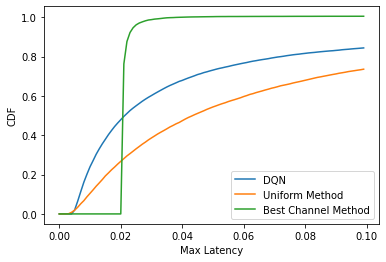

In [ ]:
stats = np.arange(0, 0.1, 0.001)
#stats = np.arange(10, 5000, 10)
#stats = np.arange(2, 250, 2)
dqn_cdf =np.zeros([1,len(stats)])[0]
unif_cdf =np.zeros([1,len(stats)])[0]
const_cdf =np.zeros([1,len(stats)])[0]
#solo1_cdf =np.zeros([1,len(stats)])[0]
#solo2_cdf =np.zeros([1,len(stats)])[0]
count = 0
for il in stats:
  #print('index ' + str(il))
  tata = len(np.argwhere(dqn_ep_reward_list<il))
  #print('count ' + str(tata))
  tata2 = len(np.argwhere(unif_reward_list<il))
  tata3 = len(np.argwhere(const_reward_list<il))
  tata4 = len(np.argwhere(solo1<il))
  tata5 = len(np.argwhere(solo2<il))
  dqn_cdf[count] = tata/((200+ep*200)/num_user) #(1000+ep*1000)  (200+ep*200)
  unif_cdf[count] = tata2/((200+ep*200)/num_user)
  const_cdf[count] = tata3/((200+ep*200)/num_user)
  #solo1_cdf[count] = tata4/((200+ep*200)/2)
  #solo2_cdf[count] = tata4/((200+ep*200)/2)
  count = count + 1


plt.plot(stats,dqn_cdf)
plt.plot(stats,unif_cdf)
plt.plot(stats,const_cdf)
#plt.plot(solo1_cdf)
#plt.plot(solo2_cdf)
plt.xlabel("Max Latency")
plt.ylabel("CDF")
plt.legend(['DQN', 'Uniform Method', 'Best Channel Method'])
plt.show()

In [ ]:
print(8239/((200+ep*200)/num_user))


0.8239


In [ ]:
# Save the weights
model.save_weights("sam260.h5")
#critic_model.save_weights("cell_critic.h5")

#target_actor.save_weights("cell_target_actor.h5")
#target_critic.save_weights("cell_target_critic.h5")

In [ ]:
#getting new channel state info
data222 = files.upload()
for f in data222.keys():
    file = open(f, 'r')
    testlines = file.readlines()
print(testlines)

Saving VER3_PLS_DONE_PLS_ACTUAL_FINAL_SHADDD_Hmat_scenario3_10APs_Multi_3_users_FUNFINALACTUREG_complex_part2_7_28_ExtendingTesting_ver62.txt to VER3_PLS_DONE_PLS_ACTUAL_FINAL_SHADDD_Hmat_scenario3_10APs_Multi_3_users_FUNFINALACTUREG_complex_part2_7_28_ExtendingTesting_ver62 (5).txt
['-0.00094 0.00976 -0.00722 0.00105 0.00222 -0.00512 -0.00624 -0.00058 -0.00364 -0.00407 0.03500 0.00514 0.04121 0.00064 -0.01391 -0.00977 -0.00755 -0.05825 -0.04848 0.02619\n', '0.00119 0.01094 -0.00334 0.00177 -0.00234 -0.00385 0.00283 -0.00053 -0.00800 -0.00676 -0.01682 0.01818 0.00595 -0.03464 0.01870 0.00837 -0.00476 -0.06585 -0.00465 0.03693\n', '-0.00269 0.00239 -0.00218 -0.00169 -0.00156 0.00446 -0.00079 0.00017 -0.00101 -0.00340 -0.00048 0.01567 0.01024 -0.00290 0.00961 -0.02295 0.00469 0.01961 -0.01814 -0.00976\n', '-0.04703 0.04698 -0.01491 -0.03138 0.00669 -0.00674 -0.01366 0.00154 0.00951 -0.00216 -0.00495 -0.00235 0.01524 0.02005 0.00805 -0.01060 -0.03653 -0.07615 -0.20091 0.00146\n', '0.02590

In [ ]:
pos = 0
raw_iq = []
complex_vec2 = []
complex_vec_total_p2 = []
count = 0
count2 = 0

for i in range(num_user):
  temp = testlines[pos+i]
  temp = temp.strip()
  temp = temp.split(' ')
  raw_iq.append(temp)
  print(raw_iq[i])

for i in range(num_user):
  for jslack in raw_iq[i]:
  #i = float(i)
    if count % 2 == 0:
      tens = float(raw_iq[i][count])
    if  count % 2 == 1:
      complex_vec2.append(complex(tens,float(raw_iq[i][count])))
      count2 = count2+ 1
    count = count + 1
  complex_vec_total_p2.append(complex_vec2)
  complex_vec2 = []
  count = 0
  count2 = 0

print(complex_vec_total_p2[0])
print(complex_vec_total_p2[1])



['-0.00094', '0.00976', '-0.00722', '0.00105', '0.00222', '-0.00512', '-0.00624', '-0.00058', '-0.00364', '-0.00407', '0.03500', '0.00514', '0.04121', '0.00064', '-0.01391', '-0.00977', '-0.00755', '-0.05825', '-0.04848', '0.02619']
['0.00119', '0.01094', '-0.00334', '0.00177', '-0.00234', '-0.00385', '0.00283', '-0.00053', '-0.00800', '-0.00676', '-0.01682', '0.01818', '0.00595', '-0.03464', '0.01870', '0.00837', '-0.00476', '-0.06585', '-0.00465', '0.03693']
['-0.00269', '0.00239', '-0.00218', '-0.00169', '-0.00156', '0.00446', '-0.00079', '0.00017', '-0.00101', '-0.00340', '-0.00048', '0.01567', '0.01024', '-0.00290', '0.00961', '-0.02295', '0.00469', '0.01961', '-0.01814', '-0.00976']
[(-0.00094+0.00976j), (-0.00722+0.00105j), (0.00222-0.00512j), (-0.00624-0.00058j), (-0.00364-0.00407j), (0.035+0.00514j), (0.04121+0.00064j), (-0.01391-0.00977j), (-0.00755-0.05825j), (-0.04848+0.02619j)]
[(0.00119+0.01094j), (-0.00334+0.00177j), (-0.00234-0.00385j), (0.00283-0.00053j), (-0.008-0.006

In [ ]:
#load weights -- need to understand what's needed here during testing phase
model.load_weights("sam260.h5")


# To store reward history of each episode
ep_reward_list = []
dqn_ep_reward_list = []
# To store average reward history of last few episodes
const_reward_list = []
unif_reward_list = []
new_reward = 0
best_alphas = np.zeros(shape=(1,num_APs))
#best_alphas = np.zeros(shape=(1,10))
b1  = 0
indexxx = 0
total_episodes = 1
# Takes about 4 min to train
for ep in range(total_episodes):

    #prev_state = env.reset() ep*1000
    prev_state = np.zeros([num_states,])
    prev_state_dqn = prev_state
    episodic_reward = 0
    alphasss = []
    for i in range(num_user):
      rand_vecs = np.random.random(size=(1,num_APs))
      rand_vecs = rand_vecs/np.sum(rand_vecs)
      alphasss.append(rand_vecs[0])
    
    #indexxx = ep*1000
    #print('Step')
    #print(indexxx)
    #print(200+ep*200)
    '''
    comp, fla = converttt(lines,0)
    prev_state[0:10] = fla
    prev_state[10:21] = alphasss
    '''

    #while indexxx < len(testlines)-1:
    while indexxx < len(testlines)-(num_user-1):
        # Uncomment this to see the Actor in action
        # But not in a python notebook.
        # env.render()
        #print(prev_state)
        #prev_state = np.asarray(prev_state).astype(np.float32)  
        #tf_prev_state = [[]]*num_user
        '''
        if indexxx > 0:
          for jwiw in range(num_user):
            tf_prev_state[jwiw] = (tf.expand_dims(tf.convert_to_tensor(prev_state[jwiw],dtype=np.float32), 0))
        else:
          for jwiw in range(num_user):
            tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state[jwiw],dtype=np.float32), 0)

      
        actions = []
        
        if indexxx == 0:
          for ikea in range(num_user):
            actions.append(np.asarray(alphasss[ikea]))
        else:
          for ikea22 in range(num_user):
            actions.append(policy_testing(tf_prev_state[ikea22])[0])
          #action = softmax(tf_prev_state)
          ######action = action[0]
          
          #TO EXPERIMENT COMMENTING THIS OUT

        '''
          
        latencies_co = []
        latencies_u_co = []
        latencies_b_co = []
        sum_temp = np.zeros(shape=(1,num_APs))
        sum_den = np.zeros(shape=(1,num_APs))
        sum_temp_u = np.zeros(shape=(1,num_APs))
        sum_den_u = np.zeros(shape=(1,num_APs))
        sum_temp_b = []
        sum_den_b = []
        '''
        for swag in range(num_user):
          action = actions[swag]
    
          alphasss = action
          ########################product = alphasss*S_u
          oneminussquared = (1-alphasss)**2
          squareddd = alphasss**2
          chan_squared = (np.absolute(complex_vec_total_p2[swag])**2)

          #num = ((B*np.log2(1+((p*ada_1)*(squareddd*chan_squared)))))
          ###########################den = 1+ ((p*ada_1)*(oneminussquared*chan_squared))
          den = ((p*ada_1)*(oneminussquared*chan_squared))





          temp = (((p*ada_1)*(squareddd*chan_squared)))
          ############################rate = ((B*np.log2((1+(((p*ada_1)*(squareddd*chan_squared))/den)))))


          sum_den[0] = sum_den[0] + den
          sum_temp[0] = sum_temp[0] + temp



          # should do this if somehow channel becomes zero (i.e. shadow)
        
        rate = ((B*np.log2((1+((sum_temp)/(1+sum_den))))))


        un_dB_sinr = ((sum_temp)/(1+sum_den))

        #### CHecking ###
        
        for sew in range(num_user):
        
          alphasss_indices = np.where(actions[sew]==0)[0]
          print('Alphas Indices')
          print(alphasss_indices)


          new_rate = rate[0].copy()

          
          for i in alphasss_indices:  #setting rates where alpha = 0 to zero
            new_rate[i] = 0 

          print('Alphasss')
          print(actions[sew])
          new_alphasss = actions[sew][actions[sew] != 0]

          
          observing_rate_indices = np.where(new_rate==0)[0]
          observing_alphasss_indices = np.where(actions[sew]==0)[0]
          tezerk = len(observing_rate_indices)
          tezerk2 = len(observing_alphasss_indices)

          if tezerk != tezerk2:
            print('Size Damn it')
            print('chan squared')
            print(chan_squared)
            print('Alphas')
            print(alphasss)
            print('Temp')
            print(temp)
            print('Den')
            print(den)
            print('Rate')
            print(rate[0])
            print('New Rate')
            print(new_rate)
            quit()

          for excak in range(tezerk):
            if observing_rate_indices[excak] != observing_alphasss_indices[excak]:
              print('Damn it')
              print(chan_squared)
              print('Alphas')
              print(alphasss)
              print('Temp')
              print(temp)
              print('Den')
              print(den)
              print('Rate')
              print(rate[0])
              print('New Rate')
              print(new_rate)
              quit()
          



          ##TODO: FOR THE ALPHAS THAT ARE ZERO REMOVE THE CORRESPONDING INDICES FROM THE RATE EVEN IF NOT ZERO INSTEAD OF SEEING IF THEY MATCH
          new_rate = new_rate[new_rate != 0]
          product = actions[sew]*S_u

          product = product[product!=0]
          

        
      

  

          #un_dB_sinr = (2**(new_rate/B)) - 1


          #un_dB_sinr = ((((p*ada_1)*(squareddd*chan_squared))/den))




      # Recieve state and reward from environment.
      #state, reward, done, info = env.step(action)
          
          total_latency = (beta1*(new_alphasss*S_u*C)/freq) +  (beta2*(product/new_rate))

          latencies_co.append(total_latency)
        


        final_rewards = []
        for fight in range(num_user):
          final_rewards.append(np.max(latencies_co[fight]))

        #xx1 = np.max(latencies_co[0])
        #xx2 = np.max(latencies_co[1])
        #reward =np.mean([xx1, xx2]) 
        #reward = np.max([xx1,xx2])
        reward = np.max(final_rewards)

        
        if indexxx >0 and indexxx < len(testlines):
          ep_reward_list.append(reward)

        #reward =np.sum([xx1, xx2]) 
        '''


        tf_prev_state_dqn = [[]]*num_user
        if indexxx > 0:
          print('Step')
          print(indexxx)
          for jwiw in range(num_user):
            tf_prev_state_dqn[jwiw] = (tf.expand_dims(tf.convert_to_tensor(prev_state_dqn[jwiw],dtype=np.float32), 0))
        else:
          for jwiw in range(num_user):
            tf_prev_state_dqn = tf.expand_dims(tf.convert_to_tensor(prev_state_dqn[jwiw],dtype=np.float32), 0)
           
       

        actions_dqn = []
        if indexxx == ep*200:
            # Take random action
            for ikea in range(num_user):
              actions_dqn.append(np.random.choice(num_actions))
        else:
            # Predict action Q-values
            # From environment state

            #state_tensor = tf.convert_to_tensor(prev_state)
            #state_tensor = tf.expand_dims(state_tensor, 0)
            for ikea in range(num_user):
              action_probs_dqn = model(tf_prev_state_dqn[ikea], training=False)
            # Take best action
              actions_dqn.append(tf.argmax(action_probs_dqn[0]).numpy())


        latencies_co_dqn = []
        sum_temp_dqn = np.zeros(shape=(1,num_APs))
        sum_den_dqn = np.zeros(shape=(1,num_APs))
        actual_actions_dqn = []
        for swag in range(num_user):
          action_dqn = actions_dqn[swag]
    
          alphasss_dqn = np.array(dict_actions[str(action_dqn)],dtype=float)
          actual_actions_dqn.append(alphasss_dqn)
          ########################product = alphasss*S_u
          oneminussquared_dqn = (1-alphasss_dqn)**2
          squareddd_dqn = alphasss_dqn**2
          chan_squared_dqn = (np.absolute(complex_vec_total_p2[swag])**2)

          #num = ((B*np.log2(1+((p*ada_1)*(squareddd*chan_squared)))))
          ###########################den = 1+ ((p*ada_1)*(oneminussquared*chan_squared))
          den_dqn = ((p*ada_1)*(oneminussquared_dqn*chan_squared_dqn))

          temp_dqn = (((p*ada_1)*(squareddd_dqn*chan_squared_dqn)))
          ############################rate = ((B*np.log2((1+(((p*ada_1)*(squareddd*chan_squared))/den)))))


          sum_den_dqn[0] = sum_den_dqn[0] + den_dqn
          sum_temp_dqn[0] = sum_temp_dqn[0] + temp_dqn



          # should do this if somehow channel becomes zero (i.e. shadow)
        
        rate_dqn = ((B*np.log2((1+((sum_temp_dqn)/(1+sum_den_dqn))))))

        dqn_un_dB_sinr = ((sum_temp_dqn)/(1+sum_den_dqn))
        '''
        if indexxx > 0:
          print('Original')
          print(rate)
        '''
        #### CHecking ###
        for sew in range(num_user):
        
          alphasss_indices_dqn = np.where(actual_actions_dqn[sew]==0)[0]
          print('Alphas Indices')
          print(alphasss_indices_dqn)

          new_rate_dqn = rate_dqn[0].copy()

          
          for i in alphasss_indices_dqn:  #setting rates where alpha = 0 to zero
            new_rate_dqn[i] = 0 
 
          print('DQN Alphasss ' )
          print(actions_dqn)
          new_alphasss_dqn = actual_actions_dqn[sew][actual_actions_dqn[sew] != 0]

          
          observing_rate_indices_dqn = np.where(new_rate_dqn==0)[0]
          observing_alphasss_indices_dqn = np.where(actual_actions_dqn[sew]==0)[0]
          tezerk = len(observing_rate_indices_dqn)
          tezerk2 = len(observing_alphasss_indices_dqn)

          if tezerk != tezerk2:
            print('Size Damn it')
            print('chan squared')
            print(chan_squared_dqn)
            print('Alphas')
            print(alphasss_dqn)
            print('Temp')
            print(temp_dqn)
            print('Den')
            print(den_dqn)
            print('Rate')
            print(rate_dqn[0])
            print('New Rate')
            print(new_rate_dqn)
            quit()

          for excak in range(tezerk):
            if observing_rate_indices_dqn[excak] != observing_alphasss_indices_dqn[excak]:
              print('Damn it')
              print(chan_squared_dqn)
              print('Alphas')
              print(alphasss_dqn)
              print('Temp')
              print(temp_dqn)
              print('Den')
              print(den_dqn)
              print('Rate')
              print(rate_dqn[0])
              print('New Rate')
              print(new_rate_dqn)
              quit()
          



          ##TODO: FOR THE ALPHAS THAT ARE ZERO REMOVE THE CORRESPONDING INDICES FROM THE RATE EVEN IF NOT ZERO INSTEAD OF SEEING IF THEY MATCH
          new_rate_dqn = new_rate_dqn[new_rate_dqn != 0]
          product_dqn = actual_actions_dqn[sew]*S_u

          product_dqn = product_dqn[product_dqn!=0]

        
      

  

          #un_dB_sinr = (2**(new_rate/B)) - 1


        ###################################un_dB_sinr = ((((p*ada_1)*(squareddd*chan_squared))/den))




      # Recieve state and reward from environment.
      #state, reward, done, info = env.step(action)
          
          total_latency_dqn = (beta1*(new_alphasss_dqn*S_u*C)/freq) + (beta2*(product_dqn/new_rate_dqn))
          latencies_co_dqn.append(total_latency_dqn)

        
        xx1_dqn = np.max(latencies_co_dqn[0])
        xx2_dqn = np.max(latencies_co_dqn[1])
        xx3_dqn = np.max(latencies_co_dqn[2])

        reward_dqn = np.max([xx1_dqn, xx2_dqn,xx3_dqn]) 

        #reward_dqn = np.max([xx1_dqn, xx2_dqn]) 
        if indexxx >0 and indexxx < len(testlines):
          dqn_ep_reward_list.append(reward_dqn)







      



        # End this episode when `done` is True
        #if done:
        #    break

        #prev_state = state
        #ep_reward_list.append(episodic_reward)
 
        ##### UNIFORM
        ##### UNIFORM
        for delicious in range(num_user):
          unif_alphasss = 1/num_APs*np.ones([1,num_APs]) 
          #unif_alphasss = 1/10*np.ones([1,10]) 
          product_u = unif_alphasss*S_u
          oneminussquared_u = (1-unif_alphasss)**2
          squareddd_u = unif_alphasss**2
          chan_squared_u = (np.absolute(complex_vec_total_p2[delicious])**2)

          #num = ((B*np.log2(1+((p*ada_1)*(squareddd*chan_squared)))))
          ########################den_u = 1+ ((p*ada_1)*(oneminussquared_u*chan_squared_u))
          den_u = ((p*ada_1)*(oneminussquared_u*chan_squared_u))
          temp_u = (((p*ada_1)*(squareddd_u*chan_squared_u)))


          sum_den_u[0] = sum_den_u[0] + den_u
          sum_temp_u[0] = sum_temp_u[0] + temp_u

          #########rate_u = ((B*np.log2((1+(((p*ada_1)*(squareddd_u*chan_squared_u))/den_u)))))

          
        rate_u = ((B*np.log2((1+((sum_temp_u)/(1+sum_den_u))))))   
        total_latency_u = (beta1*(unif_alphasss*S_u*C)/freq) + (beta2*(product_u/rate_u))
        #because alphas are always uniform for both users, can just multiply reward by 2. 
        reward_u = np.max(total_latency_u[0])  
        #reward_u = 2*np.max(total_latency_u[0])  
        '''
        latencies_u_co.append(total_latency_u[0])
        xx1_u = np.max(latencies_u_co[0])
        xx2_u = np.max(latencies_u_co[1])
        reward_u =np.sum([xx1_u, xx2_u]) 
       '''
        
        ##NEW - 7/16
        if indexxx >0 and indexxx < len(testlines):
          unif_reward_list.append(reward_u)


        #### BEST Method
        best_channel_gains = []
        final_best_reward = []
        #### BEST Method
        for great in range(num_user):
          best_id = np.argmax(np.abs(complex_vec_total_p2)[great])
          best_channel_gains.append(best_id)
          best_alphasss = 1

          product_b = best_alphasss*S_u
          oneminussquared_b = (1-best_alphasss)**2
          squareddd_b = best_alphasss**2

          chan_squared_b = (np.absolute(complex_vec_total_p2[great][best_id])**2)

          #num = ((B*np.log2(1+((p*ada_1)*(squareddd*chan_squared)))))
          #####################den_b = 1+ ((p*ada_1)*(oneminussquared_b*chan_squared_b))
          den_b = ((p*ada_1)*(oneminussquared_b*chan_squared_b))
          temp_b = (((p*ada_1)*(squareddd_b*chan_squared_b)))
          sum_den_b.append(den_b)
          sum_temp_b.append(temp_b)
          #####################rate_b = ((B*np.log2((1+(((p*ada_1)*(squareddd_b*chan_squared_b))/den_b)))))
         
        duplicates = []
        for j in best_channel_gains:
          if j in duplicates:
            continue
          else:
            timeagain = np.argwhere(best_channel_gains == j)[0]
            #if more than 1 sum up the indices
            temp_sum_den_b = 0
            temp_sum_temp_b = 0
          for iterating in timeagain:
            temp_sum_den_b = temp_sum_den_b + sum_den_b[iterating]
            temp_sum_temp_b = temp_sum_temp_b + sum_temp_b[iterating]
          
          rate_b = ((B*np.log2((1+((temp_sum_temp_b)/(1+temp_sum_den_b))))))
          total_latency_b = (beta1*(best_alphasss*S_u*C)/freq) + (beta2*(product_b/rate_b))
          latencies_b_co.append(total_latency_b)
          #delete from best_gains
          duplicates.append(timeagain[0])


        '''


        if best_channel_gains[0] == best_channel_gains[1]: # if same AP is chosen for both add them together. 
          sum_den_bb = np.sum(sum_den_b)
          sum_temp_bb = np.sum(sum_temp_b) #need to add for same alpha
          rate_b = ((B*np.log2((1+((sum_temp_bb)/(1+sum_den_bb))))))
          total_latency_b = (beta1*(best_alphasss*S_u*C)/freq) + (beta2*(product_b/rate_b))
          reward_b = total_latency_b #because same alpha
        else:  # if not they are sepearte entities
          for i in range(len(sum_den_b)):
            rate_b = ((B*np.log2((1+((sum_temp_b[i])/(1+sum_den_b[i]))))))
            total_latency_b = (beta1*(best_alphasss*S_u*C)/freq) + (beta2*(product_b/rate_b))
            latencies_b_co.append(total_latency_b)
          
          xx1_b = np.max(latencies_b_co[0])
          xx2_b = np.max(latencies_b_co[1])
          #reward_b =np.mean([xx1_b, xx2_b]) 
          reward_b =np.max([xx1_b, xx2_b]) 
          #reward_b =np.sum([xx1_b, xx2_b]) 
        '''

        reward_b = np.max(latencies_b_co)

      
       
         #NEW - 7/16
        if indexxx > 0 and indexxx < len(testlines):
          const_reward_list.append(reward_b)

        print('Step')
        print(indexxx)
        indexxx = indexxx + num_user #2#1
        '''
        if indexxx < len(testlines):
          complex_vec_total_p2 = converttt(testlines,indexxx)
          state = []
          for iii in range(num_user):
            status =  np.empty((1, num_states), dtype=np.object)  #TODO: how to assign to None,30 or convert 1,1,30 to None,3
            for jwe in range(num_states):
              #status[0][jwe] = np.log2(np.absolute(complex_vec_total_p2[iii][jwe])) #un_dB_sinr[0][jwe]
              status[0][jwe] = (un_dB_sinr[0][jwe])
            
            status= status[0].astype('float64')
              #############state[0][iii] = (un_dB_sinr[0][iii])
            state.append(status)
            
           
          
          #state = state[0].astype('float64')
        else:
          print('Stop')
          break
        
        
        '''




        
        #print('Computational latency')
        #print((beta1*(new_alphasss*S_u*C)/freq)) 
        #print('Transmission Latency')
        #print(beta2*(product/new_rate))
        print('Reward')
        print(reward_dqn)


        state_next_dqn = []
        if indexxx < len(testlines):
          #complex_vec,float_line = converttt(lines,indexxx)
          complex_vec_total_p2 = converttt(testlines,indexxx)
          for iii in range(num_user):
            tank =  np.empty((1, num_states), dtype=np.object)
            tank = (dqn_un_dB_sinr) #TODO: PRINT UN_DB_SINR

            #state_next, reward, done, _ = env.step(action)
            #######state_next_dqn = np.array(tank)
            state_next_dqn.append(np.array(tank))
        
        else:
          print('Stop')
          break
        prev_state_dqn = state_next_dqn

        

        ############buffer.record((prev_state, alphasss, reward, state)) #dont know if this should be -reward or not
          
        #episodic_reward = (reward)
        
        #indexxx = indexxx + 1
        #prev_state = state

        #ep_reward_list.append(episodic_reward)

        

    #ep_reward_list.append(episodic_reward)
    

    ## Mean of last 40 episodes
    ##avg_reward = np.mean(ep_reward_list[-40:])
    #print("Episode * {} * Avg Reward is ==> {}".format(ep, avg_reward))
    #vg_reward_list.append(avg_reward)

# Plotting graph
# Episodes versus Avg. Rewards
print(indexxx)
#count = b1/float(1000)
#print(count)

Alphas Indices
[2 6 7 8 9]
DQN Alphasss 
[8, 9, 4]
Alphas Indices
[1 3 4 5 8]
DQN Alphasss 
[8, 9, 4]
Alphas Indices
[2 4 5 6 9]
DQN Alphasss 
[8, 9, 4]
Step
0
Reward
0.08994177425457192
['-0.04703', '0.04698', '-0.01491', '-0.03138', '0.00669', '-0.00674', '-0.01366', '0.00154', '0.00951', '-0.00216', '-0.00495', '-0.00235', '0.01524', '0.02005', '0.00805', '-0.01060', '-0.03653', '-0.07615', '-0.20091', '0.00146']
['0.02590', '0.04532', '0.01244', '-0.00753', '-0.02425', '0.00172', '-0.00546', '-0.00104', '0.00951', '0.00720', '-0.00141', '0.00007', '0.00030', '-0.00606', '0.00856', '0.00253', '-0.03613', '-0.00960', '-0.00496', '-0.06284']
['0.01239', '-0.00069', '0.00298', '-0.00235', '0.01075', '0.01104', '-0.00195', '0.00491', '-0.00289', '-0.00012', '-0.00197', '0.00554', '-0.00841', '-0.00302', '0.01583', '-0.00061', '-0.00369', '0.00268', '-0.00346', '0.01827']
Step
3
Alphas Indices
[0 3 6 7 8]
DQN Alphasss 
[2, 2, 2]
Alphas Indices
[0 3 6 7 8]
DQN Alphasss 
[2, 2, 2]
Alphas I

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:555: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Streaming output truncated to the last 5000 lines.
['-0.00455', '0.00792', '0.00323', '0.00382', '0.00304', '0.00363', '-0.00950', '-0.00133', '-0.02058', '0.02938', '0.01814', '-0.00995', '0.02126', '0.00809', '-0.00710', '0.00358', '0.01325', '-0.00664', '-0.03502', '0.01375']
['0.00221', '0.00722', '-0.00662', '-0.01395', '0.00786', '-0.00408', '0.00251', '0.01093', '0.00570', '0.01043', '-0.00564', '-0.00105', '0.02923', '-0.03231', '0.00639', '-0.00741', '-0.01032', '-0.00951', '-0.09616', '-0.05027']
['-0.00735', '-0.01168', '-0.00298', '-0.00466', '0.00446', '-0.00217', '-0.00680', '-0.02663', '0.01223', '0.01213', '-0.02693', '0.00600', '-0.00188', '0.02870', '0.00104', '-0.01053', '0.01491', '0.00189', '0.00761', '-0.00007']
Step
2286
Alphas Indices
[0 3 6 7 8]
DQN Alphasss 
[2, 2, 2]
Alphas Indices
[0 3 6 7 8]
DQN Alphasss 
[2, 2, 2]
Alphas Indices
[0 3 6 7 8]
DQN Alphasss 
[2, 2, 2]
Step
2286
Reward
0.017928135599427936
['-0.01374', '-0.06178', '-0.05691', '0.02777', '-0.050

In [ ]:
print(np.shape(state_next_sample))
#print(np.max(ep_reward_list))
#print(np.max(unif_reward_list))
#print(np.max(const_reward_list))

(32, 1, 10)


In [ ]:
print(unif_reward_list)
print(np.max(unif_reward_list))
print(np.max(ep_reward_list))

[162.29996129553876, 198.64842380903443, 199.620965245459, 78.69973051507131, 131.35682167839815, 347.76879231401466, 107.21688667578051, 112.4667322428572, 125.7066255539824, 132.07492943876713, 142.6920650302314, 103.18317372641944, 134.47749863219138, 175.9446947982965, 130.54675107711785, 198.63544560717685, 116.2881675508301, 82.72238247826799, 327.98226601780004, 149.5624886323165, 118.72175020578555, 184.45168587310351, 98.78874937863878, 109.40860442666761, 97.44455018827688, 112.48501033004446, 107.30911362302308, 130.92776014138136, 111.8426209778503, 113.59111663062941, 164.83428025192535, 172.57937068440958, 229.3212342184181, 315.8997473522207, 343.2545604180865, 121.01916792346759, 160.63718213298878, 132.3979098119865, 179.75165474176174, 446.28189850071146, 134.23459204898592, 262.38762903279735, 104.34293542702916, 156.1027318599069, 112.71205762965216, 103.51946105512107, 221.30309331948584, 190.99857985739035, 90.34802586181559, 104.27177304943214, 126.25765860043582

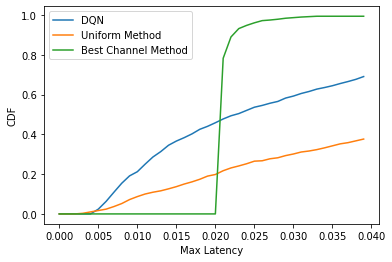

In [ ]:
stats22 = np.arange(0, 0.04, 0.001)
#stats22 = np.arange(5, 300, 5) #400
dqn_cdf22 =np.zeros([1,len(stats22)])[0]
unif_cdf22 =np.zeros([1,len(stats22)])[0]
const_cdf22 =np.zeros([1,len(stats22)])[0]
count22 = 0
for il in stats22:
  tata22 = len(np.argwhere(dqn_ep_reward_list<=il))
  tata222 = len(np.argwhere(unif_reward_list<=il))
  tata223 = len(np.argwhere(const_reward_list<=il))
  dqn_cdf22[count22] = tata22/len(dqn_ep_reward_list)#999#1000
  unif_cdf22[count22] = tata222/len(unif_reward_list)#999#1000
  const_cdf22[count22] = tata223/len(const_reward_list)#999#1000
  count22 = count22 + 1

#plt.xlim(0, 70)
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,unif_cdf22)
plt.plot(stats22,const_cdf22)
plt.xlabel("Max Latency")
plt.ylabel("CDF")
plt.legend(['DQN', 'Uniform Method', 'Best Channel Method'])
plt.show()

In [ ]:
stats22 = np.arange(0, 0.04, 0.001)

In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.02402402
 0.06306306 0.10910911 0.15415415 0.19119119 0.21221221 0.25025025
 0.28628629 0.31331331 0.34534535 0.36636637 0.38338338 0.4024024
 0.42542543 0.44044044 0.45845846 0.47747748 0.49349349 0.5045045
 0.52052052 0.53653654 0.54554555 0.55655656 0.56556557 0.58258258
 0.59259259 0.60560561 0.61561562 0.62762763 0.63563564 0.64464464
 0.65565566 0.66566567 0.67667668 0.69069069]


In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
dqn_5 = [0. ,        0.,         0.,         0.,         0.,         0.02402402,
 0.06306306 ,0.10910911, 0.15415415, 0.19119119, 0.21221221, 0.25025025,
 0.28628629, 0.31331331, 0.34534535, 0.36636637, 0.38338338, 0.4024024,
 0.42542543, 0.44044044, 0.45845846, 0.47747748, 0.49349349, 0.5045045,
 0.52052052, 0.53653654, 0.54554555, 0.55655656, 0.56556557, 0.58258258,
 0.59259259, 0.60560561, 0.61561562, 0.62762763, 0.63563564, 0.64464464,
 0.65565566, 0.66566567, 0.67667668, 0.69069069]

In [ ]:
print(dict_actions)

{'0': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2], '1': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2], '2': [0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2], '3': [0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0], '4': [0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0], '5': [0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2], '6': [0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2], '7': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0], '8': [0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0], '9': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2]}


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.06606607 0.15515516 0.22822823 0.27727728 0.32032032 0.36136136
 0.3973974  0.44144144 0.46846847 0.49349349 0.52252252 0.54954955
 0.56456456 0.58158158 0.6016016  0.61861862 0.63763764 0.65165165
 0.66666667 0.68068068 0.69269269 0.70970971 0.72172172 0.73273273
 0.73973974 0.74874875 0.75675676 0.76876877 0.77477477 0.77777778
 0.78478478 0.79079079 0.79379379 0.7977978 ]


In [ ]:
dqn_4 = [0.,         0.,         0.,         0.,         0.,         0.,
 0.06606607, 0.15515516, 0.22822823, 0.27727728, 0.32032032, 0.36136136,
 0.3973974 , 0.44144144, 0.46846847, 0.49349349, 0.52252252, 0.54954955,
 0.56456456, 0.58158158, 0.6016016 , 0.61861862, 0.63763764, 0.65165165,
 0.66666667, 0.68068068, 0.69269269, 0.70970971, 0.72172172, 0.73273273,
 0.73973974, 0.74874875, 0.75675676, 0.76876877, 0.77477477, 0.77777778,
 0.78478478, 0.79079079, 0.79379379, 0.7977978 ]

In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
print(dict_actions)

{'0': [0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.25, 0.0, 0.25, 0.0], '1': [0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.25, 0.0], '2': [0.25, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0], '3': [0.25, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0], '4': [0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25], '5': [0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25], '6': [0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0], '7': [0.25, 0.25, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0], '8': [0.0, 0.25, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25], '9': [0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.25, 0.0]}


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.1011011  0.35535536 0.47747748 0.54754755 0.60960961
 0.66266266 0.7007007  0.72572573 0.75075075 0.77577578 0.78978979
 0.80780781 0.82382382 0.83283283 0.83883884 0.85085085 0.86186186
 0.87187187 0.88188188 0.88788789 0.89489489 0.9039039  0.90990991
 0.91191191 0.91391391 0.91591592 0.91791792 0.92092092 0.92392392
 0.92792793 0.92792793 0.93093093 0.93393393]


In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
dqn_3 = [0.,         0.,         0.,         0.,         0.,         0.,
 0.        , 0.1011011 , 0.35535536, 0.47747748, 0.54754755, 0.60960961,
 0.66266266, 0.7007007 , 0.72572573, 0.75075075, 0.77577578, 0.78978979,
 0.80780781, 0.82382382, 0.83283283, 0.83883884, 0.85085085, 0.86186186,
 0.87187187, 0.88188188, 0.88788789, 0.89489489, 0.9039039 , 0.90990991,
 0.91191191, 0.91391391, 0.91591592, 0.91791792, 0.92092092, 0.92392392,
 0.92792793, 0.92792793, 0.93093093, 0.93393393]

In [ ]:
print(dict_actions)

{'0': [0.0, 0.0, 0.0, 0.33333333, 0.33333333, 0.0, 0.0, 0.33333333, 0.0, 0.0], '1': [0.0, 0.33333333, 0.33333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333], '2': [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333, 0.0, 0.0, 0.33333333, 0.33333333], '3': [0.33333333, 0.33333333, 0.33333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333, 0.0, 0.33333333, 0.33333333, 0.0], '5': [0.33333333, 0.0, 0.0, 0.33333333, 0.0, 0.0, 0.33333333, 0.0, 0.0, 0.0], '6': [0.0, 0.33333333, 0.0, 0.33333333, 0.0, 0.0, 0.0, 0.33333333, 0.0, 0.0], '7': [0.0, 0.33333333, 0.0, 0.33333333, 0.0, 0.33333333, 0.0, 0.0, 0.0, 0.0], '8': [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333, 0.33333333, 0.0, 0.33333333, 0.0], '9': [0.0, 0.0, 0.0, 0.33333333, 0.33333333, 0.33333333, 0.0, 0.0, 0.0, 0.0]}


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.7037037
 0.81881882 0.86786787 0.9029029  0.92192192 0.93693694 0.94794795
 0.95495495 0.95995996 0.96596597 0.97397397 0.97797798 0.98198198
 0.98298298 0.98398398 0.98498498 0.98598599 0.98698699 0.98698699
 0.98698699 0.98798799 0.98898899 0.98898899 0.99099099 0.99099099
 0.99099099 0.99099099 0.99099099 0.99099099]


In [ ]:
dqn_2 = [0. ,        0.,         0. ,        0.,         0. ,        0.,
 0.        , 0.        , 0.        , 0.        , 0.         ,0.7037037,
 0.81881882, 0.86786787, 0.9029029 , 0.92192192, 0.93693694 ,0.94794795,
 0.95495495, 0.95995996, 0.96596597, 0.97397397, 0.97797798 ,0.98198198,
 0.98298298, 0.98398398, 0.98498498, 0.98598599, 0.98698699 ,0.98698699,
 0.98698699, 0.98798799, 0.98898899, 0.98898899, 0.99099099 ,0.99099099,
 0.99099099, 0.99099099, 0.99099099, 0.99099099]

In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
print(dict_actions)

{'0': [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '1': [0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '2': [0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '3': [0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], '4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], '5': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0], '6': [0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0], '7': [0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0], '8': [0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '9': [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0]}


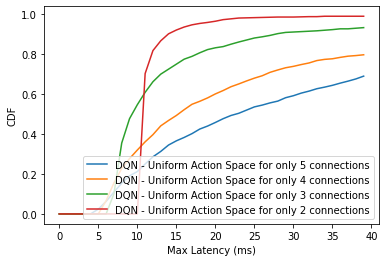

In [ ]:
plt.plot(stats22*1000,dqn_5) #dqn_cdf22
plt.plot(stats22*1000,dqn_4)
plt.plot(stats22*1000,dqn_3)
plt.plot(stats22*1000,dqn_2)
plt.xlabel("Max Latency (ms)")
plt.ylabel("CDF")
plt.legend(['DQN - Uniform Action Space for only 5 connections','DQN - Uniform Action Space for only 4 connections','DQN - Uniform Action Space for only 3 connections', 'DQN - Uniform Action Space for only 2 connections'])
plt.show()

In [ ]:
################################################## DISREGARD EVERYTHING BELOW BECAUS THIRD UE WAS NOT FIXED

In [ ]:
## 5 action

In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.03803804
 0.09309309 0.15415415 0.2012012  0.24024024 0.26926927 0.31031031
 0.33933934 0.36636637 0.39139139 0.41341341 0.43143143 0.45445445
 0.47947948 0.5005005  0.51651652 0.53653654 0.55155155 0.56656657
 0.57657658 0.59359359 0.6036036  0.61961962 0.62862863 0.64264264
 0.64964965 0.66366366 0.67167167 0.68168168 0.6976977  0.7017017
 0.71071071 0.71771772 0.72372372 0.73573574]


In [ ]:
print(epsilon_greedy_frames)

10000


In [ ]:
### 4 action

In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.05705706 0.13513514 0.21521522 0.29129129 0.34034034 0.37737738
 0.41641642 0.45645646 0.48648649 0.51151151 0.52852853 0.54054054
 0.55855856 0.58958959 0.61261261 0.62962963 0.64064064 0.65065065
 0.66266266 0.67767768 0.68768769 0.6986987  0.71771772 0.72572573
 0.73473473 0.74474474 0.75275275 0.75975976 0.76476476 0.76976977
 0.77477477 0.78178178 0.78478478 0.78678679]


In [ ]:
dqn_4 = [0.  ,       0.,         0.,         0.,         0.,         0.,
 0.05705706, 0.13513514, 0.21521522, 0.29129129, 0.34034034, 0.37737738,
 0.41641642, 0.45645646, 0.48648649, 0.51151151, 0.52852853, 0.54054054,
 0.55855856, 0.58958959, 0.61261261, 0.62962963, 0.64064064, 0.65065065,
 0.66266266, 0.67767768, 0.68768769, 0.6986987 , 0.71771772, 0.72572573,
 0.73473473, 0.74474474, 0.75275275, 0.75975976, 0.76476476, 0.76976977,
 0.77477477, 0.78178178, 0.78478478, 0.78678679]

In [ ]:
print(epsilon_greedy_frames)

10000


In [ ]:
### 3 action

In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.01401401 0.09209209 0.18218218 0.23823824 0.2992993
 0.35135135 0.4014014  0.43743744 0.46946947 0.48948949 0.51751752
 0.54054054 0.57357357 0.58658659 0.5995996  0.61861862 0.63363363
 0.64964965 0.65965966 0.67567568 0.6956957  0.70870871 0.71671672
 0.72772773 0.73473473 0.73973974 0.74674675 0.75675676 0.76476476
 0.76876877 0.77977978 0.78378378 0.79179179]


In [ ]:
print(epsilon_greedy_frames)

10000


In [ ]:
dqn_3 = [0. ,        0.,         0. ,        0.,         0. ,        0.,
 0.        , 0.01401401, 0.09209209, 0.18218218, 0.23823824, 0.2992993,
 0.35135135 ,0.4014014 , 0.43743744, 0.46946947, 0.48948949, 0.51751752,
 0.54054054, 0.57357357, 0.58658659, 0.5995996 , 0.61861862, 0.63363363,
 0.64964965, 0.65965966, 0.67567568, 0.6956957 , 0.70870871, 0.71671672,
 0.72772773, 0.73473473, 0.73973974, 0.74674675, 0.75675676 ,0.76476476,
 0.76876877, 0.77977978, 0.78378378, 0.79179179]

In [ ]:
#### 2 action

In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.48448448
 0.66366366 0.73473473 0.77677678 0.80980981 0.83483483 0.85985986
 0.88088088 0.8958959  0.90790791 0.92092092 0.93293293 0.93693694
 0.94294294 0.94594595 0.94794795 0.94994995 0.95595596 0.95995996
 0.96396396 0.96596597 0.96796797 0.96796797 0.97297297 0.97297297
 0.97297297 0.97297297 0.97597598 0.97697698]


In [ ]:
dqn_2 = [0.,         0.,         0. ,        0.,         0. ,        0.,
 0.        , 0.        , 0.        , 0.        , 0.        , 0.48448448,
 0.66366366, 0.73473473, 0.77677678, 0.80980981, 0.83483483, 0.85985986,
 0.88088088, 0.8958959 , 0.90790791, 0.92092092, 0.93293293, 0.93693694,
 0.94294294, 0.94594595, 0.94794795, 0.94994995, 0.95595596, 0.95995996,
 0.96396396, 0.96596597, 0.96796797, 0.96796797, 0.97297297, 0.97297297,
 0.97297297, 0.97297297, 0.97597598, 0.97697698]

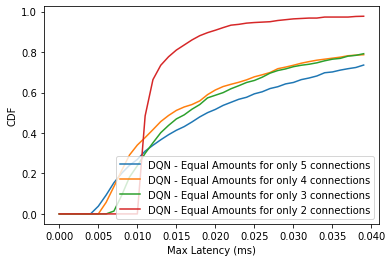

In [ ]:
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,dqn_4)
plt.plot(stats22,dqn_3)
plt.plot(stats22,dqn_2)
plt.xlabel("Max Latency (ms)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 5 connections','DQN - Equal Amounts for only 4 connections','DQN - Equal Amounts for only 3 connections', 'DQN - Equal Amounts for only 2 connections'])
plt.show()

In [ ]:
print(epsilon_greedy_frames)

10000


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.03803804
 0.09309309 0.15415415 0.2012012  0.24024024 0.26926927 0.31031031
 0.33933934 0.36636637 0.39139139 0.41341341 0.43143143 0.45445445
 0.47947948 0.5005005  0.51651652 0.53653654 0.55155155 0.56656657
 0.57657658 0.59359359 0.6036036  0.61961962 0.62862863 0.64264264
 0.64964965 0.66366366 0.67167167 0.68168168 0.6976977  0.7017017
 0.71071071 0.71771772 0.72372372 0.73573574]


In [ ]:
print(epsilon_greedy_frames)

10000


In [ ]:
print(dict_actions)

{'0': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2], '1': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2], '2': [0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2], '3': [0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0], '4': [0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0], '5': [0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2], '6': [0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2], '7': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0], '8': [0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0], '9': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2]}


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.05705706 0.13513514 0.21521522 0.29129129 0.34034034 0.37737738
 0.41641642 0.45645646 0.48648649 0.51151151 0.52852853 0.54054054
 0.55855856 0.58958959 0.61261261 0.62962963 0.64064064 0.65065065
 0.66266266 0.67767768 0.68768769 0.6986987  0.71771772 0.72572573
 0.73473473 0.74474474 0.75275275 0.75975976 0.76476476 0.76976977
 0.77477477 0.78178178 0.78478478 0.78678679]


In [ ]:
dqn_cdf_4_10000 = [0. ,        0.,         0. ,        0. ,        0.  ,       0.,
 0.05705706, 0.13513514, 0.21521522, 0.29129129, 0.34034034, 0.37737738,
 0.41641642, 0.45645646, 0.48648649, 0.51151151, 0.52852853, 0.54054054,
 0.55855856, 0.58958959, 0.61261261, 0.62962963, 0.64064064, 0.65065065,
 0.66266266, 0.67767768, 0.68768769, 0.6986987 , 0.71771772, 0.72572573,
 0.73473473, 0.74474474, 0.75275275, 0.75975976, 0.76476476, 0.76976977,
 0.77477477, 0.78178178, 0.78478478, 0.78678679]

In [ ]:
print(epsilon_greedy_frames)

10000


In [ ]:
print(dict_actions)

{'0': [0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.25, 0.0, 0.25, 0.0], '1': [0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.25, 0.0], '2': [0.25, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0], '3': [0.25, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0], '4': [0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25], '5': [0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25], '6': [0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0], '7': [0.25, 0.25, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0], '8': [0.0, 0.25, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25], '9': [0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.25, 0.0]}


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.01401401 0.09209209 0.18218218 0.23823824 0.2992993
 0.35135135 0.4014014  0.43743744 0.46946947 0.48948949 0.51751752
 0.54054054 0.57357357 0.58658659 0.5995996  0.61861862 0.63363363
 0.64964965 0.65965966 0.67567568 0.6956957  0.70870871 0.71671672
 0.72772773 0.73473473 0.73973974 0.74674675 0.75675676 0.76476476
 0.76876877 0.77977978 0.78378378 0.79179179]


In [ ]:
dqn_cdf_3_10000 = [0. ,        0. ,        0. ,        0.,         0. ,        0.,
 0.        , 0.01401401, 0.09209209, 0.18218218, 0.23823824, 0.2992993,
 0.35135135, 0.4014014 , 0.43743744, 0.46946947, 0.48948949, 0.51751752,
 0.54054054, 0.57357357, 0.58658659, 0.5995996 , 0.61861862, 0.63363363,
 0.64964965, 0.65965966, 0.67567568, 0.6956957 , 0.70870871, 0.71671672,
 0.72772773, 0.73473473, 0.73973974, 0.74674675, 0.75675676, 0.76476476,
 0.76876877, 0.77977978, 0.78378378, 0.79179179]

In [ ]:
print(epsilon_greedy_frames)

10000


In [ ]:
print(dict_actions)

{'0': [0.0, 0.0, 0.0, 0.33333333, 0.33333333, 0.0, 0.0, 0.33333333, 0.0, 0.0], '1': [0.0, 0.33333333, 0.33333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333], '2': [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333, 0.0, 0.0, 0.33333333, 0.33333333], '3': [0.33333333, 0.33333333, 0.33333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333, 0.0, 0.33333333, 0.33333333, 0.0], '5': [0.33333333, 0.0, 0.0, 0.33333333, 0.0, 0.0, 0.33333333, 0.0, 0.0, 0.0], '6': [0.0, 0.33333333, 0.0, 0.33333333, 0.0, 0.0, 0.0, 0.33333333, 0.0, 0.0], '7': [0.0, 0.33333333, 0.0, 0.33333333, 0.0, 0.33333333, 0.0, 0.0, 0.0, 0.0], '8': [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333, 0.33333333, 0.0, 0.33333333, 0.0], '9': [0.0, 0.0, 0.0, 0.33333333, 0.33333333, 0.33333333, 0.0, 0.0, 0.0, 0.0]}


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.48448448
 0.66366366 0.73473473 0.77677678 0.80980981 0.83483483 0.85985986
 0.88088088 0.8958959  0.90790791 0.92092092 0.93293293 0.93693694
 0.94294294 0.94594595 0.94794795 0.94994995 0.95595596 0.95995996
 0.96396396 0.96596597 0.96796797 0.96796797 0.97297297 0.97297297
 0.97297297 0.97297297 0.97597598 0.97697698]


In [ ]:
dqn_cdf_2_10000_constant = [0. ,        0. ,        0. ,        0. ,        0. ,        0.,
 0.      ,   0.        , 0.        , 0.        , 0.        , 0.48448448,
 0.66366366, 0.73473473, 0.77677678, 0.80980981, 0.83483483, 0.85985986,
 0.88088088, 0.8958959 , 0.90790791, 0.92092092, 0.93293293, 0.93693694,
 0.94294294, 0.94594595, 0.94794795, 0.94994995, 0.95595596, 0.95995996,
 0.96396396, 0.96596597, 0.96796797, 0.96796797, 0.97297297, 0.97297297,
 0.97297297, 0.97297297, 0.97597598, 0.97697698]

In [ ]:
print(epsilon_greedy_frames)

10000


In [ ]:
dqn_cdf_2_10000_random = [0.      ,   0.    ,     0.       ,  0.    ,     0.        , 0.,
 0.     ,    0.        , 0.      ,   0.        , 0.      ,   0.52752753,
 0.7007007,  0.75375375, 0.79479479, 0.82982983, 0.84884885, 0.86786787,
 0.88888889, 0.9039039 , 0.91791792, 0.92692693, 0.93493493, 0.93993994,
 0.94694695, 0.94894895, 0.95295295, 0.95295295, 0.95695696, 0.96196196,
 0.96696697, 0.96896897, 0.97097097, 0.97397397, 0.97397397, 0.97797798,
 0.97797798, 0.97797798, 0.97797798, 0.97997998]

In [ ]:
print(dict_actions)

{'0': [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '1': [0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '2': [0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '3': [0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], '4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], '5': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0], '6': [0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0], '7': [0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0], '8': [0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '9': [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0]}


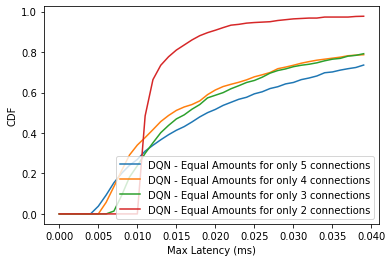

In [ ]:
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,dqn_cdf_4_10000)
plt.plot(stats22,dqn_cdf_3_10000)
plt.plot(stats22,dqn_cdf_2_10000)
plt.xlabel("Max Latency (ms)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 5 connections','DQN - Equal Amounts for only 4 connections','DQN - Equal Amounts for only 3 connections', 'DQN - Equal Amounts for only 2 connections'])
plt.show()

In [ ]:
############################################################### now above 10000 with shadow fading

In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02602603
 0.33933934 0.62962963 0.76976977 0.84684685 0.9039039  0.93293293
 0.94694695 0.95695696 0.96596597 0.97297297 0.97697698 0.98198198
 0.98498498 0.98798799 0.98898899 0.99099099 0.99199199 0.99299299
 0.99499499 0.996997   0.998999   0.998999   0.998999   1.
 1.         1.         1.         1.        ]


In [ ]:
print(epsilon_greedy_frames)

10000


In [ ]:
print(dict_actions)

{'0': [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '1': [0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '2': [0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '3': [0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], '4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], '5': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0], '6': [0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0], '7': [0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0], '8': [0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '9': [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0]}


In [ ]:
dqn_random_10000 = [0.      ,   0.   ,      0.      ,   0.    ,     0.     ,    0.,
 0.        , 0.        , 0.      ,   0.        , 0.       ,  0.001001,
 0.38638639, 0.7007007 , 0.84584585, 0.9029029 , 0.93893894, 0.95795796,
 0.97097097, 0.97697698, 0.98198198, 0.98398398, 0.98598599, 0.98798799,
 0.99099099, 0.99299299, 0.99299299, 0.99499499, 0.995996  , 0.996997,
 0.997998  , 0.997998  , 0.997998  , 0.997998,   0.998999  , 0.998999,
 0.998999  , 0.998999  , 0.998999 ,  0.998999  ]

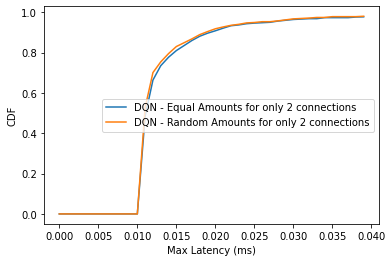

In [ ]:
stats22 = np.arange(0, 0.04, 0.001)
#plt.plot(stats22,dqn_cdf_equal)
plt.plot(stats22,dqn_cdf_2_10000_constant)
plt.plot(stats22,dqn_cdf_2_10000_random)
plt.xlabel("Max Latency (ms)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 2 connections', 'DQN - Random Amounts for only 2 connections'])
plt.show()

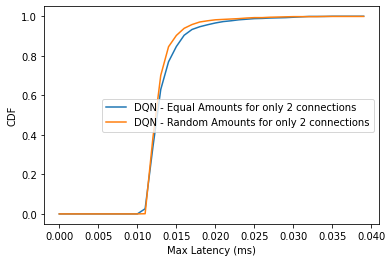

In [ ]:

#plt.plot(stats22,dqn_cdf_equal)
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,dqn_random_10000)
plt.xlabel("Max Latency (ms)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 2 connections', 'DQN - Random Amounts for only 2 connections'])
plt.show()

In [ ]:
#############################################above without shadow fading

In [ ]:
#################5 connections redo
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.02402402
 0.06306306 0.10910911 0.15415415 0.19119119 0.21221221 0.25025025
 0.28628629 0.31331331 0.34534535 0.36636637 0.38338338 0.4024024
 0.42542543 0.44044044 0.45845846 0.47747748 0.49349349 0.5045045
 0.52052052 0.53653654 0.54554555 0.55655656 0.56556557 0.58258258
 0.59259259 0.60560561 0.61561562 0.62762763 0.63563564 0.64464464
 0.65565566 0.66566567 0.67667668 0.69069069]


In [ ]:
################## 5 connections
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.02402402
 0.06306306 0.10910911 0.15415415 0.19119119 0.21221221 0.25025025
 0.28628629 0.31331331 0.34534535 0.36636637 0.38338338 0.4024024
 0.42542543 0.44044044 0.45845846 0.47747748 0.49349349 0.5045045
 0.52052052 0.53653654 0.54554555 0.55655656 0.56556557 0.58258258
 0.59259259 0.60560561 0.61561562 0.62762763 0.63563564 0.64464464
 0.65565566 0.66566567 0.67667668 0.69069069]


In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
print(dict_actions)

{'0': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2], '1': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2], '2': [0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2], '3': [0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0], '4': [0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0], '5': [0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2], '6': [0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2], '7': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0], '8': [0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0], '9': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2]}


In [ ]:
################## 4 connections
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.06606607 0.15515516 0.22822823 0.27727728 0.32032032 0.36136136
 0.3973974  0.44144144 0.46846847 0.49349349 0.52252252 0.54954955
 0.56456456 0.58158158 0.6016016  0.61861862 0.63763764 0.65165165
 0.66666667 0.68068068 0.69269269 0.70970971 0.72172172 0.73273273
 0.73973974 0.74874875 0.75675676 0.76876877 0.77477477 0.77777778
 0.78478478 0.79079079 0.79379379 0.7977978 ]


In [ ]:
dqn_cdf_4_eq = [0.    ,     0.   ,      0.    ,     0.    ,     0.     ,    0.,
 0.06606607 ,0.15515516, 0.22822823 ,0.27727728, 0.32032032, 0.36136136,
 0.3973974  ,0.44144144, 0.46846847 ,0.49349349, 0.52252252, 0.54954955,
 0.56456456 ,0.58158158, 0.6016016  ,0.61861862, 0.63763764, 0.65165165,
 0.66666667 ,0.68068068, 0.69269269 ,0.70970971, 0.72172172, 0.73273273,
 0.73973974 ,0.74874875, 0.75675676 ,0.76876877, 0.77477477, 0.77777778,
 0.78478478 ,0.79079079, 0.79379379 ,0.7977978 ]

In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
print(dict_actions)

{'0': [0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.25, 0.0, 0.25, 0.0], '1': [0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.25, 0.0], '2': [0.25, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0], '3': [0.25, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0], '4': [0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25], '5': [0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25], '6': [0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0], '7': [0.25, 0.25, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0], '8': [0.0, 0.25, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25], '9': [0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.25, 0.0]}


In [ ]:
################# 3 connections not real actiddentally pressed play again
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.02402402
 0.06306306 0.10910911 0.15415415 0.19119119 0.21221221 0.25025025
 0.28628629 0.31331331 0.34534535 0.36636637 0.38338338 0.4024024
 0.42542543 0.44044044 0.45845846 0.47747748 0.49349349 0.5045045
 0.52052052 0.53653654 0.54554555 0.55655656 0.56556557 0.58258258
 0.59259259 0.60560561 0.61561562 0.62762763 0.63563564 0.64464464
 0.65565566 0.66566567 0.67667668 0.69069069]


In [ ]:
dqn_cdf_3_eq =[0.    ,     0.   ,      0.     ,    0.   ,      0.      ,   0.,
 0.       ,  0.1001001 , 0.35435435, 0.47747748, 0.54754755, 0.60960961,
 0.66266266, 0.7007007 , 0.72572573, 0.75075075, 0.77577578, 0.78978979,
 0.80780781, 0.82382382, 0.83283283, 0.83883884, 0.85085085, 0.86186186,
 0.87187187, 0.88188188, 0.88788789, 0.89489489, 0.9039039 , 0.90990991,
 0.91191191, 0.91391391, 0.91591592, 0.91791792, 0.92092092, 0.92392392,
 0.92792793, 0.92792793, 0.93093093, 0.93393393]

In [ ]:
print(dict_actions)

{'0': [0.0, 0.0, 0.0, 0.33333333, 0.33333333, 0.0, 0.0, 0.33333333, 0.0, 0.0], '1': [0.0, 0.33333333, 0.33333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333], '2': [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333, 0.0, 0.0, 0.33333333, 0.33333333], '3': [0.33333333, 0.33333333, 0.33333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333, 0.0, 0.33333333, 0.33333333, 0.0], '5': [0.33333333, 0.0, 0.0, 0.33333333, 0.0, 0.0, 0.33333333, 0.0, 0.0, 0.0], '6': [0.0, 0.33333333, 0.0, 0.33333333, 0.0, 0.0, 0.0, 0.33333333, 0.0, 0.0], '7': [0.0, 0.33333333, 0.0, 0.33333333, 0.0, 0.33333333, 0.0, 0.0, 0.0, 0.0], '8': [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333, 0.33333333, 0.0, 0.33333333, 0.0], '9': [0.0, 0.0, 0.0, 0.33333333, 0.33333333, 0.33333333, 0.0, 0.0, 0.0, 0.0]}


In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56556557
 0.71571572 0.78778779 0.83083083 0.85485485 0.87487487 0.89089089
 0.9049049  0.91391391 0.92792793 0.94194194 0.94994995 0.95395395
 0.95395395 0.95695696 0.95795796 0.95995996 0.96196196 0.96296296
 0.96496496 0.96496496 0.96596597 0.96796797 0.97097097 0.97097097
 0.97097097 0.97097097 0.97097097 0.97297297]


In [ ]:
dqn_cdf_2_eq = [0.    ,     0.   ,      0.    ,     0.  ,       0.     ,    0.,
 0.      ,   0.        , 0.        , 0.        , 0.       ,  0.56556557,
 0.71571572, 0.78778779, 0.83083083, 0.85485485, 0.87487487, 0.89089089,
 0.9049049 , 0.91391391, 0.92792793, 0.94194194, 0.94994995, 0.95395395,
 0.95395395, 0.95695696, 0.95795796, 0.95995996, 0.96196196, 0.96296296,
 0.96496496, 0.96496496, 0.96596597, 0.96796797, 0.97097097, 0.97097097,
 0.97097097, 0.97097097, 0.97097097, 0.97297297]

In [ ]:
dqn_random_1000 = [0. ,        0.  ,       0. ,        0.     ,    0.  ,       0.,
 0.    ,     0.        , 0.        , 0.        , 0.       ,  0.,
 0.56756757, 0.71971972, 0.78178178, 0.81381381, 0.83683684, 0.86186186,
 0.87987988, 0.89389389, 0.90690691, 0.91891892, 0.92792793, 0.93393393,
 0.93793794, 0.94394394, 0.94494494, 0.94894895, 0.94894895, 0.95195195,
 0.95695696 ,0.95995996, 0.96396396, 0.96596597, 0.96696697, 0.96896897,
 0.96996997, 0.97297297, 0.97297297, 0.97397397]

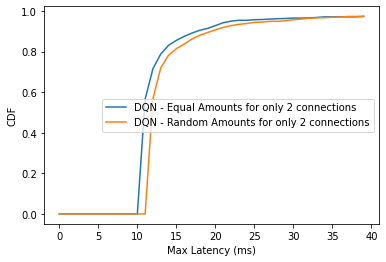

In [ ]:

#plt.plot(stats22,dqn_cdf_equal)
plt.plot(stats22*1000,dqn_cdf22)
plt.plot(stats22*1000,dqn_random_1000)
plt.xlabel("Max Latency (ms)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 2 connections', 'DQN - Random Amounts for only 2 connections'])
plt.show()

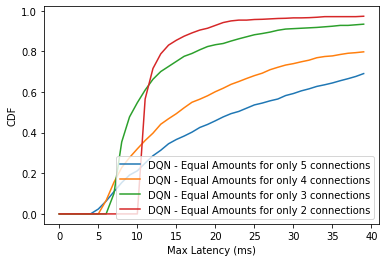

In [ ]:
plt.plot(stats22*1000,dqn_cdf22)
plt.plot(stats22*1000,dqn_cdf_4_eq)
plt.plot(stats22*1000,dqn_cdf_3_eq)
plt.plot(stats22*1000,dqn_cdf_2_eq)
plt.xlabel("Max Latency (ms)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 5 connections','DQN - Equal Amounts for only 4 connections','DQN - Equal Amounts for only 3 connections', 'DQN - Equal Amounts for only 2 connections'])
plt.show()

In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
print(dict_actions)

{'0': [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '1': [0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '2': [0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '3': [0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], '4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], '5': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0], '6': [0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0], '7': [0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0], '8': [0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '9': [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0]}


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.02402402
 0.06306306 0.10910911 0.15415415 0.19119119 0.21221221 0.25025025
 0.28628629 0.31331331 0.34534535 0.36636637 0.38338338 0.4024024
 0.42542543 0.44044044 0.45845846 0.47747748 0.49349349 0.5045045
 0.52052052 0.53653654 0.54554555 0.55655656 0.56556557 0.58258258
 0.59259259 0.60560561 0.61561562 0.62762763 0.63563564 0.64464464
 0.65565566 0.66566567 0.67667668 0.69069069]


In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
print(dict_actions)

{'0': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2], '1': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2], '2': [0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2], '3': [0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0], '4': [0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0], '5': [0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2], '6': [0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2], '7': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0], '8': [0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0], '9': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2]}


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.01901902
 0.06106106 0.11111111 0.16016016 0.1981982  0.22222222 0.26126126
 0.29329329 0.31731732 0.34534535 0.36636637 0.38238238 0.3993994
 0.43043043 0.44744745 0.46346346 0.48448448 0.5005005  0.51251251
 0.52552553 0.54054054 0.55355355 0.56756757 0.57457457 0.58858859
 0.5975976  0.60760761 0.61761762 0.63063063 0.63963964 0.64664665
 0.65665666 0.66766767 0.67667668 0.68968969]


In [ ]:
print(epsilon_greedy_frames)

100000


In [ ]:
print(epsilon_greedy_frames)

100000


In [ ]:
print(dict_actions)

{'0': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2], '1': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2], '2': [0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2], '3': [0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0], '4': [0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0], '5': [0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2], '6': [0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2], '7': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0], '8': [0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0], '9': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2]}


In [ ]:
print(unif_cdf22)

[0.         0.         0.         0.003003   0.01001001 0.01701702
 0.02402402 0.03703704 0.05205205 0.07207207 0.08708709 0.1001001
 0.10910911 0.11611612 0.12612613 0.13713714 0.15015015 0.16116116
 0.17417417 0.19019019 0.1981982  0.21721722 0.23123123 0.24124124
 0.25225225 0.26526527 0.26726727 0.27727728 0.28228228 0.29329329
 0.3013013  0.31131131 0.31631632 0.32332332 0.33233233 0.34234234
 0.35235235 0.35835836 0.36736737 0.37637638]


In [ ]:
print(unif_cdf22)

[0.         0.         0.         0.003003   0.01001001 0.01701702
 0.02402402 0.03703704 0.05205205 0.07207207 0.08708709 0.1001001
 0.10910911 0.11611612 0.12612613 0.13713714 0.15015015 0.16116116
 0.17417417 0.19019019 0.1981982  0.21721722 0.23123123 0.24124124
 0.25225225 0.26526527 0.26726727 0.27727728 0.28228228 0.29329329
 0.3013013  0.31131131 0.31631632 0.32332332 0.33233233 0.34234234
 0.35235235 0.35835836 0.36736737 0.37637638]


In [ ]:
print(const_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.78278278 0.88988989 0.93193193
 0.94794795 0.96096096 0.97197197 0.97497497 0.97897898 0.98398398
 0.98698699 0.98998999 0.99199199 0.99399399 0.99399399 0.99399399
 0.99399399 0.99399399 0.99399399 0.99399399]


In [ ]:
##############################################################

In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.00800801 0.02502503 0.05105105 0.08508509
 0.12712713 0.18218218 0.25025025 0.3013013  0.35635636 0.4024024
 0.43343343 0.46746747 0.51051051 0.55255255 0.58758759 0.61661662
 0.63263263 0.65765766 0.68068068 0.7017017  0.71371371 0.72672673
 0.74074074 0.75675676 0.76776777 0.77477477 0.78178178 0.79379379
 0.80880881 0.81781782 0.82782783 0.83083083]


In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
print(dict_actions)

{'0': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2], '1': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2], '2': [0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2], '3': [0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0], '4': [0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0], '5': [0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2], '6': [0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2], '7': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0], '8': [0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0], '9': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2]}


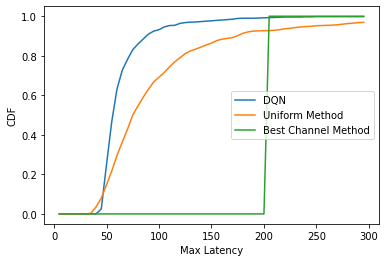

In [ ]:

stats22 = np.arange(5, 300, 5) #400
dqn_cdf22 =np.zeros([1,len(stats22)])[0]
unif_cdf22 =np.zeros([1,len(stats22)])[0]
const_cdf22 =np.zeros([1,len(stats22)])[0]
count22 = 0
for il in stats22:
  tata22 = len(np.argwhere(dqn_ep_reward_list<il))
  tata222 = len(np.argwhere(unif_reward_list<il))
  tata223 = len(np.argwhere(const_reward_list<il))
  dqn_cdf22[count22] = tata22/len(dqn_ep_reward_list)#999#1000
  unif_cdf22[count22] = tata222/len(unif_reward_list)#999#1000
  const_cdf22[count22] = tata223/len(const_reward_list)#999#1000
  count22 = count22 + 1

#plt.xlim(0, 70)
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,unif_cdf22)
plt.plot(stats22,const_cdf22)
plt.xlabel("Max Latency")
plt.ylabel("CDF")
plt.legend(['DQN', 'Uniform Method', 'Best Channel Method'])
plt.show()

In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.02502503 0.25025025 0.46746747 0.63263263
 0.72672673 0.78178178 0.83083083 0.85985986 0.88488488 0.90990991
 0.92492492 0.93193193 0.94594595 0.95295295 0.95395395 0.96396396
 0.96796797 0.96996997 0.97097097 0.97297297 0.97497497 0.97697698
 0.97897898 0.98098098 0.98298298 0.98498498 0.98898899 0.98998999
 0.98998999 0.98998999 0.99099099 0.99199199 0.99299299 0.99399399
 0.99499499 0.995996   0.995996   0.995996   0.995996   0.996997
 0.996997   0.997998   0.997998   0.997998   0.997998   0.997998
 0.997998   0.997998   0.997998   0.997998   0.997998  ]


In [ ]:
print(epsilon_greedy_frames)

100000


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.07107107 0.41541542 0.62762763 0.72872873
 0.80880881 0.86386386 0.8988989  0.92192192 0.93893894 0.94794795
 0.95595596 0.96096096 0.96696697 0.97097097 0.97297297 0.97697698
 0.98198198 0.98198198 0.98198198 0.98598599 0.98898899 0.98898899
 0.98898899 0.98898899 0.98998999 0.99099099 0.99099099 0.99099099
 0.99099099 0.99099099 0.99099099 0.99099099 0.99099099 0.99199199
 0.99199199 0.99199199 0.99299299 0.99299299 0.99399399 0.99399399
 0.99499499 0.99499499 0.99499499 0.99499499 0.99499499 0.99499499
 0.99499499 0.99499499 0.99499499 0.99499499 0.99499499]


In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
print(dict_actions)

{'0': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2], '1': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2], '2': [0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2], '3': [0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0], '4': [0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0], '5': [0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2], '6': [0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2], '7': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0], '8': [0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0], '9': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2]}


In [ ]:
#const space 5 shadow fading 1000 frames
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.2032032  0.35635636 0.45245245 0.53653654
 0.59259259 0.64164164 0.69069069 0.72072072 0.74274274 0.76576577
 0.78278278 0.79479479 0.81081081 0.82082082 0.83683684 0.84684685
 0.85585586 0.86386386 0.87387387 0.87987988 0.88288288 0.88688689
 0.89389389 0.89489489 0.8958959  0.8978979  0.9019019  0.9049049
 0.91191191 0.91391391 0.91591592 0.92292292 0.92392392 0.92492492
 0.92692693 0.92892893 0.93293293 0.93593594 0.93893894 0.94194194
 0.94294294 0.94294294 0.94594595 0.94594595 0.94794795 0.94894895
 0.95095095 0.95295295 0.95595596 0.95595596 0.95695696]


In [ ]:
#const space 4 shadow fading 1000 frames
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.29129129 0.46346346
 0.56556557 0.64164164 0.69269269 0.73673674 0.76676677 0.7977978
 0.81381381 0.83083083 0.84284284 0.85985986 0.87087087 0.88288288
 0.88888889 0.8968969  0.9019019  0.90690691 0.91091091 0.91291291
 0.91791792 0.92092092 0.92492492 0.92992993 0.93093093 0.93693694
 0.93693694 0.93993994 0.94194194 0.94494494 0.94794795 0.95095095
 0.95195195 0.95195195 0.95395395 0.95495495 0.95695696 0.95895896
 0.96096096 0.96196196 0.96296296 0.96296296 0.96396396 0.96596597
 0.96596597 0.96696697 0.96696697 0.96896897 0.96996997]


In [ ]:
dqn_4_const = [0.     ,    0.   ,      0.     ,    0.   ,      0.      ,   0.,
 0.        , 0.        , 0.       ,  0.        , 0.29129129, 0.46346346,
 0.56556557, 0.64164164, 0.69269269, 0.73673674, 0.76676677, 0.7977978,
 0.81381381, 0.83083083, 0.84284284, 0.85985986, 0.87087087, 0.88288288,
 0.88888889, 0.8968969 , 0.9019019 , 0.90690691, 0.91091091, 0.91291291,
 0.91791792, 0.92092092, 0.92492492, 0.92992993, 0.93093093, 0.93693694,
 0.93693694, 0.93993994, 0.94194194, 0.94494494, 0.94794795, 0.95095095,
 0.95195195, 0.95195195, 0.95395395, 0.95495495, 0.95695696, 0.95895896,
 0.96096096, 0.96196196, 0.96296296, 0.96296296, 0.96396396, 0.96596597,
 0.96596597, 0.96696697, 0.96696697, 0.96896897, 0.96996997]

In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.29129129 0.46346346
 0.56556557 0.64164164 0.69269269 0.73673674 0.76676677 0.7977978
 0.81381381 0.83083083 0.84284284 0.85985986 0.87087087 0.88288288
 0.88888889 0.8968969  0.9019019  0.90690691 0.91091091 0.91291291
 0.91791792 0.92092092 0.92492492 0.92992993 0.93093093 0.93693694
 0.93693694 0.93993994 0.94194194 0.94494494 0.94794795 0.95095095
 0.95195195 0.95195195 0.95395395 0.95495495 0.95695696 0.95895896
 0.96096096 0.96196196 0.96296296 0.96296296 0.96396396 0.96596597
 0.96596597 0.96696697 0.96696697 0.96896897 0.96996997]


In [ ]:
#const space 3 shaodw fading: 1000 frames
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.5005005  0.6996997  0.79079079 0.85285285 0.89089089
 0.90690691 0.92192192 0.93293293 0.93893894 0.94494494 0.95095095
 0.95895896 0.96196196 0.96396396 0.96696697 0.96696697 0.97097097
 0.97397397 0.97597598 0.97997998 0.98098098 0.98198198 0.98398398
 0.98598599 0.98598599 0.98598599 0.98598599 0.98698699 0.98698699
 0.98798799 0.98798799 0.98798799 0.98798799 0.98798799 0.98798799
 0.98898899 0.98998999 0.99099099 0.99299299 0.99399399 0.99399399
 0.99399399 0.99399399 0.99399399 0.99399399 0.99399399]


In [ ]:
dqn_3_const = [0.     ,    0.   ,      0.     ,    0.    ,     0. ,        0.,
 0.        , 0.        , 0.       ,  0.        , 0.       ,  0.,
 0.         ,0.5005005 , 0.6996997,  0.79079079, 0.85285285, 0.89089089,
 0.90690691 ,0.92192192, 0.93293293, 0.93893894, 0.94494494, 0.95095095,
 0.95895896 ,0.96196196, 0.96396396, 0.96696697, 0.96696697, 0.97097097,
 0.97397397 ,0.97597598, 0.97997998, 0.98098098, 0.98198198, 0.98398398,
 0.98598599 ,0.98598599, 0.98598599, 0.98598599, 0.98698699, 0.98698699,
 0.98798799 ,0.98798799, 0.98798799, 0.98798799, 0.98798799, 0.98798799,
 0.98898899 ,0.98998999, 0.99099099, 0.99299299, 0.99399399, 0.99399399,
 0.99399399 ,0.99399399, 0.99399399, 0.99399399, 0.99399399]

In [ ]:
#const space shadow fading: 1000 frames
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.94394394 0.97797798 0.99099099 0.99199199
 0.99299299 0.99299299 0.99399399 0.995996   0.995996   0.996997
 0.997998   0.997998   0.997998   0.998999   0.998999   0.998999
 0.998999   0.998999   0.998999   0.998999   0.998999   1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


In [ ]:
dqn_2_const = [0.    ,     0.  ,       0.    ,     0.   ,      0.,         0.,
 0.     ,    0.       ,  0.      ,   0.       ,  0.      ,   0.,
 0.      ,   0.       ,  0.       ,  0.       ,  0.      ,   0.,
 0.       ,  0.        , 0.94394394, 0.97797798, 0.99099099, 0.99199199,
 0.99299299, 0.99299299, 0.99399399, 0.995996,   0.995996  , 0.996997,
 0.997998 ,  0.997998 ,  0.997998  , 0.998999,   0.998999  , 0.998999,
 0.998999 ,  0.998999,   0.998999  , 0.998999,   0.998999  , 1.,
 1.       ,  1.    ,     1.       ,  1.     ,    1.     ,    1.,
 1.       ,  1.   ,      1.       ,  1.     ,    1.     ,    1.,
 1.       ,  1.   ,      1.      ,   1.     ,    1.        ]

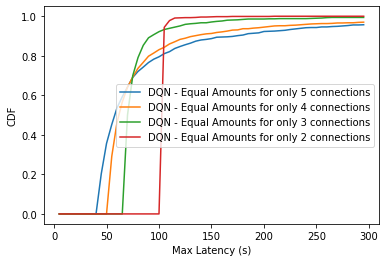

In [ ]:
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,dqn_4_const)
plt.plot(stats22,dqn_3_const)
plt.plot(stats22,dqn_2_const)
plt.xlabel("Max Latency (s)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 5 connections','DQN - Equal Amounts for only 4 connections','DQN - Equal Amounts for only 3 connections', 'DQN - Equal Amounts for only 2 connections'])
plt.show()

In [ ]:
print(epsilon_greedy_frames)

1000


In [ ]:
dqn_random = [0.   ,      0.   ,      0.   ,      0. ,        0.,         0.,
 0.    ,     0.    ,     0.      ,   0.    ,     0.    ,     0.,
 0.     ,    0.   ,      0.       ,  0.   ,      0.     ,    0.,
 0.      ,   0.  ,       0.66366366, 0.82282282, 0.89189189, 0.91791792,
 0.93293293, 0.94594595, 0.95395395, 0.96296296, 0.96696697, 0.96896897,
 0.97097097, 0.97697698, 0.97897898, 0.98198198, 0.98398398, 0.98598599,
 0.98598599, 0.98698699, 0.98698699, 0.98798799 ,0.98798799, 0.98798799,
 0.98798799, 0.98898899, 0.98998999, 0.99399399 ,0.99399399, 0.99399399,
 0.99399399, 0.99399399, 0.99399399, 0.99399399 ,0.99399399, 0.99499499,
 0.99499499, 0.99499499, 0.995996  , 0.996997  , 0.996997  ]

In [ ]:
print(len(dqn_cdf22))
print(len(dqn_random))

59
59


In [ ]:
print(epsilon_greedy_frames)

1000


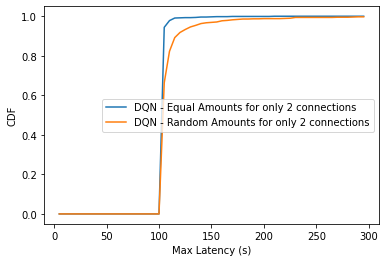

In [ ]:

#plt.plot(stats22,dqn_cdf_equal)
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,dqn_random)
plt.xlabel("Max Latency (s)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 2 connections', 'DQN - Random Amounts for only 2 connections'])
plt.show()

In [ ]:
print(dict_actions)

{'0': [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '1': [0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '2': [0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '3': [0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], '4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], '5': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0], '6': [0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0], '7': [0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0], '8': [0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '9': [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0]}


In [ ]:
################################################# 9_19

In [ ]:
# 5 equal amount action space for 10 APs: without shadow fading
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.27027027 0.73773774 0.87287287 0.94094094
 0.96696697 0.97897898 0.98698699 0.98998999 0.99299299 0.99499499
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


In [ ]:
print(dict_actions)

{'0': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2], '1': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2], '2': [0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2], '3': [0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0], '4': [0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0], '5': [0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2], '6': [0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2], '7': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0], '8': [0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0], '9': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2]}


In [ ]:
#5 equal amount action space for 5 APs: shadow fading
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.14314314 0.2972973  0.38438438 0.46546547
 0.52252252 0.57057057 0.62762763 0.66266266 0.68568569 0.70770771
 0.73173173 0.74674675 0.76476476 0.77477477 0.79279279 0.80780781
 0.82482482 0.83483483 0.84584585 0.85285285 0.85785786 0.86186186
 0.87187187 0.87287287 0.87587588 0.88088088 0.88388388 0.88588589
 0.89289289 0.8978979  0.8998999  0.90890891 0.91191191 0.91391391
 0.91691692 0.91891892 0.92092092 0.92592593 0.92792793 0.93093093
 0.93393393 0.93493493 0.93693694 0.93893894 0.94294294 0.94294294
 0.94494494 0.94594595 0.94794795 0.94794795 0.94894895]


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.14314314 0.2972973  0.38438438 0.46546547
 0.52252252 0.57057057 0.62762763 0.66266266 0.68568569 0.70770771
 0.73173173 0.74674675 0.76476476 0.77477477 0.79279279 0.80780781
 0.82482482 0.83483483 0.84584585 0.85285285 0.85785786 0.86186186
 0.87187187 0.87287287 0.87587588 0.88088088 0.88388388 0.88588589
 0.89289289 0.8978979  0.8998999  0.90890891 0.91191191 0.91391391
 0.91691692 0.91891892 0.92092092 0.92592593 0.92792793 0.93093093
 0.93393393 0.93493493 0.93693694 0.93893894 0.94294294 0.94294294
 0.94494494 0.94594595 0.94794795 0.94794795 0.94894895]


In [ ]:
print(dict_actions)

{'0': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2], '1': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2], '2': [0.0, 0.2, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2], '3': [0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0], '4': [0.2, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0], '5': [0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2], '6': [0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2], '7': [0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0], '8': [0.2, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0], '9': [0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2]}


In [ ]:
#4 equal amount action space for 5 APs: sahdow fading
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.26026026 0.42642643
 0.54154154 0.61461461 0.67267267 0.71571572 0.74874875 0.77477477
 0.8008008  0.81581582 0.82682683 0.83783784 0.85485485 0.86486486
 0.87387387 0.87987988 0.88788789 0.89489489 0.9009009  0.90590591
 0.91091091 0.91191191 0.91691692 0.92192192 0.92492492 0.93193193
 0.93593594 0.93893894 0.94094094 0.94294294 0.94494494 0.94694695
 0.94994995 0.95095095 0.95095095 0.95495495 0.95595596 0.95695696
 0.95695696 0.95695696 0.95995996 0.95995996 0.96096096 0.96196196
 0.96396396 0.96496496 0.96596597 0.96596597 0.96796797]


In [ ]:
dqn_cdf_4_eq = [0.  ,       0.    ,     0.  ,       0.    ,     0.     ,    0.,
 0.        , 0. ,        0.        , 0.      ,   0.26026026, 0.42642643,
 0.54154154, 0.61461461, 0.67267267, 0.71571572, 0.74874875, 0.77477477,
 0.8008008 , 0.81581582, 0.82682683, 0.83783784, 0.85485485, 0.86486486,
 0.87387387, 0.87987988, 0.88788789, 0.89489489, 0.9009009 , 0.90590591,
 0.91091091, 0.91191191, 0.91691692, 0.92192192, 0.92492492, 0.93193193,
 0.93593594, 0.93893894, 0.94094094, 0.94294294, 0.94494494, 0.94694695,
 0.94994995, 0.95095095, 0.95095095, 0.95495495, 0.95595596, 0.95695696,
 0.95695696, 0.95695696, 0.95995996, 0.95995996, 0.96096096, 0.96196196,
 0.96396396, 0.96496496, 0.96596597, 0.96596597 ,0.96796797,]

In [ ]:
# 3 equal amount action space for 10 APs: sahdow fading
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.33733734 0.56556557 0.67367367 0.74274274 0.79079079
 0.82382382 0.85085085 0.86886887 0.87787788 0.89189189 0.9049049
 0.91191191 0.91991992 0.92592593 0.93193193 0.93693694 0.94094094
 0.94494494 0.94694695 0.95295295 0.95795796 0.95995996 0.95995996
 0.96096096 0.96296296 0.96396396 0.96596597 0.96596597 0.96796797
 0.96796797 0.97097097 0.97097097 0.97197197 0.97297297 0.97497497
 0.97597598 0.97697698 0.98098098 0.98198198 0.98398398 0.98498498
 0.98598599 0.98598599 0.98698699 0.98698699 0.98798799]


In [ ]:
print(dqn_cdf22) # 3 redo

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.5005005  0.6996997  0.79079079 0.85285285 0.89089089
 0.90690691 0.92192192 0.93293293 0.93893894 0.94494494 0.95095095
 0.95895896 0.96196196 0.96396396 0.96696697 0.96696697 0.97097097
 0.97397397 0.97597598 0.97997998 0.98098098 0.98198198 0.98398398
 0.98598599 0.98598599 0.98598599 0.98598599 0.98698699 0.98698699
 0.98798799 0.98798799 0.98798799 0.98798799 0.98798799 0.98798799
 0.98898899 0.98998999 0.99099099 0.99299299 0.99399399 0.99399399
 0.99399399 0.99399399 0.99399399 0.99399399 0.99399399]


In [ ]:
print(dqn_cdf22) # 3 redo

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.33733734 0.56556557 0.67367367 0.74274274 0.79079079
 0.82382382 0.85085085 0.86886887 0.87787788 0.89189189 0.9049049
 0.91191191 0.91991992 0.92592593 0.93193193 0.93693694 0.94094094
 0.94494494 0.94694695 0.95295295 0.95795796 0.95995996 0.95995996
 0.96096096 0.96296296 0.96396396 0.96596597 0.96596597 0.96796797
 0.96796797 0.97097097 0.97097097 0.97197197 0.97297297 0.97497497
 0.97597598 0.97697698 0.98098098 0.98198198 0.98398398 0.98498498
 0.98598599 0.98598599 0.98698699 0.98698699 0.98798799]


In [ ]:
dqn_cdf_3_eq = [0.    ,     0.  ,       0.   ,      0.  ,       0.,         0.,
 0.      ,   0.        , 0.       ,  0.       ,  0.      ,   0.,
 0.       ,  0.33733734, 0.56556557, 0.67367367, 0.74274274, 0.79079079,
 0.82382382, 0.85085085, 0.86886887, 0.87787788, 0.89189189, 0.9049049,
 0.91191191, 0.91991992, 0.92592593, 0.93193193, 0.93693694, 0.94094094,
 0.94494494, 0.94694695, 0.95295295, 0.95795796, 0.95995996, 0.95995996,
 0.96096096, 0.96296296, 0.96396396, 0.96596597, 0.96596597, 0.96796797,
 0.96796797, 0.97097097, 0.97097097, 0.97197197, 0.97297297, 0.97497497,
 0.97597598, 0.97697698, 0.98098098, 0.98198198, 0.98398398, 0.98498498,
 0.98598599, 0.98598599, 0.98698699, 0.98698699, 0.98798799]

In [ ]:
# Equal amounts for connect to 2 for 10 APs
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.7027027  0.82782783 0.88288288 0.90590591
 0.93193193 0.94694695 0.95795796 0.96496496 0.96896897 0.97297297
 0.97797798 0.98198198 0.98398398 0.98798799 0.98898899 0.99099099
 0.99199199 0.99399399 0.99399399 0.99499499 0.995996   0.995996
 0.995996   0.995996   0.995996   0.995996   0.995996   0.996997
 0.996997   0.997998   0.998999   0.998999   0.998999   0.998999
 0.998999   0.998999   0.998999   0.998999   0.998999  ]


In [ ]:
dqn_cdf_2_eq = [0.    ,     0.,         0.   ,      0.  ,       0.,         0.,
 0.    ,     0.       ,  0.      ,   0.      ,   0.      ,   0.,
 0.     ,    0.       ,  0.     ,    0.     ,    0.      ,   0.,
 0.      ,   0.       ,  0.7027027,  0.82782783, 0.88288288, 0.90590591,
 0.93193193, 0.94694695, 0.95795796, 0.96496496, 0.96896897, 0.97297297,
 0.97797798, 0.98198198, 0.98398398, 0.98798799, 0.98898899, 0.99099099,
 0.99199199, 0.99399399, 0.99399399, 0.99499499, 0.995996 ,  0.995996,
 0.995996 ,  0.995996,   0.995996,   0.995996  , 0.995996 ,  0.996997,
 0.996997 ,  0.997998,   0.998999,   0.998999  , 0.998999 ,  0.998999,
 0.998999 ,  0.998999,   0.998999,   0.998999 ,  0.998999  ]

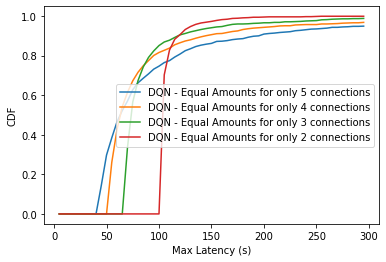

In [ ]:
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,dqn_cdf_4_eq)
plt.plot(stats22,dqn_cdf_3_eq)
plt.plot(stats22,dqn_cdf_2_eq)
plt.xlabel("Max Latency (s)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 5 connections','DQN - Equal Amounts for only 4 connections','DQN - Equal Amounts for only 3 connections', 'DQN - Equal Amounts for only 2 connections'])
plt.show()

In [ ]:
####################################################

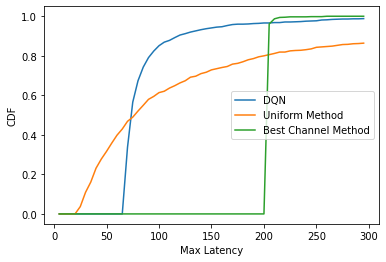

In [ ]:

stats22 = np.arange(5, 300, 5) #400
dqn_cdf22 =np.zeros([1,len(stats22)])[0]
unif_cdf22 =np.zeros([1,len(stats22)])[0]
const_cdf22 =np.zeros([1,len(stats22)])[0]
count22 = 0
for il in stats22:
  tata22 = len(np.argwhere(dqn_ep_reward_list<il))
  tata222 = len(np.argwhere(unif_reward_list<il))
  tata223 = len(np.argwhere(const_reward_list<il))
  dqn_cdf22[count22] = tata22/len(dqn_ep_reward_list)#999#1000
  unif_cdf22[count22] = tata222/len(unif_reward_list)#999#1000
  const_cdf22[count22] = tata223/len(const_reward_list)#999#1000
  count22 = count22 + 1

#plt.xlim(0, 70)
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,unif_cdf22)
plt.plot(stats22,const_cdf22)
plt.xlabel("Max Latency")
plt.ylabel("CDF")
plt.legend(['DQN', 'Uniform Method', 'Best Channel Method'])
plt.show()

In [ ]:
print(dict_actions)

{'0': [0.0, 0.19074129, 0.23633142, 0.2256996, 0.20456269, 0.0, 0.142665, 0.0, 0.0, 0.0], '1': [0.0, 0.27189425, 0.0, 0.17030932, 0.21046934, 0.26938872, 0.0, 0.0, 0.07793836, 0.0], '2': [0.10275102, 0.30264126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22669452, 0.25906022, 0.10885299], '3': [0.16654872, 0.32358239, 0.0, 0.03368735, 0.08192548, 0.0, 0.0, 0.0, 0.39425605, 0.0], '4': [0.0, 0.0, 0.31711721, 0.19388919, 0.0, 0.34970154, 0.0, 0.0, 0.13587448, 0.00341758], '5': [0.0, 0.0, 0.17191809, 0.0, 0.25712362, 0.23524776, 0.0, 0.0499325, 0.28577802, 0.0], '6': [0.24856655, 0.27759128, 0.0, 0.14852409, 0.3071876, 0.01813048, 0.0, 0.0, 0.0, 0.0], '7': [0.2183542, 0.0, 0.0, 0.25829537, 0.1073336, 0.0, 0.2033568, 0.21266003, 0.0, 0.0], '8': [0.0, 0.0, 0.22402612, 0.14459276, 0.26519119, 0.23269341, 0.0, 0.13349653, 0.0, 0.0], '9': [0.17358963, 0.0, 0.0, 0.22797795, 0.0, 0.26112856, 0.05295353, 0.0, 0.28435033, 0.0]}


In [ ]:
#Random amounts for connect to 5 for 10 APs - with shaodw fading
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06906907 0.37337337
 0.49049049 0.57257257 0.62862863 0.67767768 0.70670671 0.72672673
 0.75675676 0.76976977 0.78278278 0.7957958  0.81281281 0.82682683
 0.83683684 0.84684685 0.85385385 0.85985986 0.86586587 0.87587588
 0.87787788 0.88188188 0.88788789 0.89489489 0.8988989  0.9029029
 0.9049049  0.90990991 0.91391391 0.91691692 0.92192192 0.92292292
 0.92392392 0.92792793 0.93193193 0.93193193 0.93393393 0.93593594
 0.93593594 0.93693694 0.94094094 0.94194194 0.94394394 0.94494494
 0.94694695 0.94894895 0.95095095 0.95395395 0.95395395]


In [ ]:
print(dict_actions)

{'0': [0.0, 0.19074129, 0.23633142, 0.2256996, 0.20456269, 0.0, 0.142665, 0.0, 0.0, 0.0], '1': [0.0, 0.27189425, 0.0, 0.17030932, 0.21046934, 0.26938872, 0.0, 0.0, 0.07793836, 0.0], '2': [0.10275102, 0.30264126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22669452, 0.25906022, 0.10885299], '3': [0.16654872, 0.32358239, 0.0, 0.03368735, 0.08192548, 0.0, 0.0, 0.0, 0.39425605, 0.0], '4': [0.0, 0.0, 0.31711721, 0.19388919, 0.0, 0.34970154, 0.0, 0.0, 0.13587448, 0.00341758], '5': [0.0, 0.0, 0.17191809, 0.0, 0.25712362, 0.23524776, 0.0, 0.0499325, 0.28577802, 0.0], '6': [0.24856655, 0.27759128, 0.0, 0.14852409, 0.3071876, 0.01813048, 0.0, 0.0, 0.0, 0.0], '7': [0.2183542, 0.0, 0.0, 0.25829537, 0.1073336, 0.0, 0.2033568, 0.21266003, 0.0, 0.0], '8': [0.0, 0.0, 0.22402612, 0.14459276, 0.26519119, 0.23269341, 0.0, 0.13349653, 0.0, 0.0], '9': [0.17358963, 0.0, 0.0, 0.22797795, 0.0, 0.26112856, 0.05295353, 0.0, 0.28435033, 0.0]}


In [ ]:
#Random amounts for connect to 4 for 10 APs - with sahdow fading
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.10710711 0.51751752 0.61461461
 0.67667668 0.71771772 0.74074074 0.76176176 0.77377377 0.79079079
 0.8038038  0.80980981 0.81481481 0.81881882 0.82582583 0.83183183
 0.84484484 0.84984985 0.85485485 0.85885886 0.86586587 0.87387387
 0.87787788 0.88388388 0.89189189 0.89389389 0.9019019  0.90690691
 0.91091091 0.91291291 0.91291291 0.91691692 0.91691692 0.91891892
 0.91991992 0.92092092 0.92092092 0.92792793 0.93093093 0.93093093
 0.93293293 0.93493493 0.93593594 0.93793794 0.93893894]


In [ ]:
dqn_cdf_4_conn = [0.     ,    0. ,        0.   ,      0.      ,   0.,         0.,
 0. ,   0.       ,  0.   ,      0.        , 0.  ,       0.,
 0.       ,  0.       ,  0.    ,     0.10710711, 0.51751752, 0.61461461,
 0.67667668, 0.71771772, 0.74074074, 0.76176176, 0.77377377, 0.79079079,
 0.8038038 , 0.80980981, 0.81481481, 0.81881882, 0.82582583, 0.83183183,
 0.84484484, 0.84984985, 0.85485485, 0.85885886, 0.86586587, 0.87387387,
 0.87787788, 0.88388388, 0.89189189, 0.89389389, 0.9019019 , 0.90690691,
 0.91091091, 0.91291291, 0.91291291, 0.91691692, 0.91691692, 0.91891892,
 0.91991992, 0.92092092, 0.92092092, 0.92792793, 0.93093093, 0.93093093,
 0.93293293, 0.93493493, 0.93593594, 0.93793794, 0.93893894]

In [ ]:
print(dict_actions)

{'0': [0.0, 0.0, 0.41328562, 0.24491733, 0.0, 0.0, 0.0, 0.34179705, 0.0, 0.0], '1': [0.0, 0.0, 0.0, 0.4394119, 0.0, 0.0, 0.0, 0.0, 0.12806464, 0.43252346], '2': [0.0, 0.36020897, 0.0, 0.0, 0.2914157, 0.0, 0.34837533, 0.0, 0.0, 0.0], '3': [0.0, 0.38370845, 0.0, 0.35160323, 0.0, 0.0, 0.26468832, 0.0, 0.0, 0.0], '4': [0.0, 0.33225476, 0.58616668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08157857], '5': [0.0, 0.0, 0.0, 0.31122126, 0.0, 0.0, 0.25420851, 0.0, 0.43457023, 0.0], '6': [0.25499849, 0.36944131, 0.0, 0.0, 0.0, 0.3755602, 0.0, 0.0, 0.0, 0.0], '7': [0.24477583, 0.0, 0.0, 0.32046166, 0.0, 0.43476251, 0.0, 0.0, 0.0, 0.0], '8': [0.0, 0.17818928, 0.14624946, 0.0, 0.0, 0.0, 0.0, 0.67556125, 0.0, 0.0], '9': [0.23675027, 0.0, 0.0, 0.0, 0.42248953, 0.0, 0.0, 0.0, 0.3407602, 0.0]}


In [ ]:
#Random amounts for connect to 3 for 10 APs - with sahdow fading
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.77077077
 0.83583584 0.85685686 0.87187187 0.88688689 0.8978979  0.90690691
 0.92092092 0.92492492 0.93093093 0.93393393 0.93693694 0.93993994
 0.94494494 0.94794795 0.95195195 0.95395395 0.95495495 0.95695696
 0.95995996 0.96296296 0.96396396 0.96596597 0.96596597 0.96696697
 0.96896897 0.97097097 0.97197197 0.97197197 0.97297297 0.97497497
 0.97497497 0.97497497 0.97597598 0.97597598 0.97597598 0.97697698
 0.97697698 0.97697698 0.97797798 0.97797798 0.97797798]


In [ ]:
dqn_cdf_3_conn = [0.  ,       0. ,        0.  ,       0.  ,       0.  ,       0.,
 0.    ,     0.       ,  0.       ,  0.       ,  0.,         0.,
 0.      ,   0.       ,  0.       ,  0.       ,  0.  ,       0.77077077,
 0.83583584, 0.85685686, 0.87187187, 0.88688689, 0.8978979 , 0.90690691,
 0.92092092, 0.92492492, 0.93093093, 0.93393393, 0.93693694, 0.93993994,
 0.94494494, 0.94794795, 0.95195195, 0.95395395, 0.95495495, 0.95695696,
 0.95995996, 0.96296296, 0.96396396, 0.96596597, 0.96596597, 0.96696697,
 0.96896897, 0.97097097, 0.97197197, 0.97197197, 0.97297297, 0.97497497,
 0.97497497, 0.97497497, 0.97597598, 0.97597598, 0.97597598, 0.97697698,
 0.97697698, 0.97697698, 0.97797798 ,0.97797798, 0.97797798]

In [ ]:

# Random amounts for connect to 2 for 10 APs - copy from older 
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.74674675 0.94694695 0.96896897
 0.97597598 0.97797798 0.98098098 0.98298298 0.98698699 0.98698699
 0.98998999 0.99299299 0.99399399 0.99499499 0.99499499 0.99499499
 0.99499499 0.99499499 0.99499499 0.99499499 0.99499499 0.99499499
 0.99499499 0.99499499 0.99499499 0.99499499 0.996997   0.996997
 0.996997   0.996997   0.996997   0.996997   0.996997   0.996997
 0.996997   0.997998   0.997998   0.997998   0.997998  ]


In [ ]:
dqn_cdf_2_conn = [0.  ,       0.   ,      0.,         0.      ,   0.  ,       0.,
 0.     ,    0.      ,   0.      ,   0.     ,    0. ,        0.,
 0.     ,    0.      ,   0.      ,   0.     ,    0.  ,       0.,
 0.     ,    0.      ,   0.      ,   0.74674675, 0.94694695, 0.96896897,
 0.97597598, 0.97797798, 0.98098098, 0.98298298, 0.98698699, 0.98698699,
 0.98998999, 0.99299299, 0.99399399, 0.99499499, 0.99499499, 0.99499499,
 0.99499499, 0.99499499, 0.99499499, 0.99499499, 0.99499499, 0.99499499,
 0.99499499, 0.99499499, 0.99499499, 0.99499499, 0.996997 ,  0.996997,
 0.996997  , 0.996997 ,  0.996997 ,  0.996997 ,  0.996997 ,  0.996997,
 0.996997  , 0.997998,   0.997998 ,  0.997998 ,  0.997998  ]

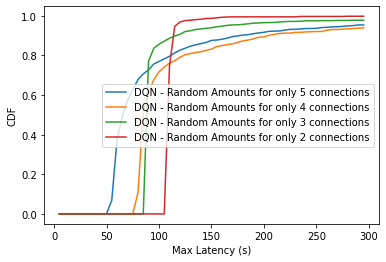

In [ ]:
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,dqn_cdf_4_conn)
plt.plot(stats22,dqn_cdf_3_conn)
plt.plot(stats22,dqn_cdf_2_conn)
plt.xlabel("Max Latency (s)")
plt.ylabel("CDF")
plt.legend(['DQN - Random Amounts for only 5 connections','DQN - Random Amounts for only 4 connections','DQN - Random Amounts for only 3 connections', 'DQN - Random Amounts for only 2 connections'])
plt.show()

In [ ]:
#########################################################################

In [ ]:
print(dict_actions)

{'0': [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '1': [0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0], '2': [0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '3': [0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], '4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], '5': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0], '6': [0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0], '7': [0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0], '8': [0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '9': [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0]}


In [ ]:
print(dict_actions)

{'0': [0.0, 0.0, 0.52401754, 0.47598246, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '1': [0.0, 0.73175478, 0.26824522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '2': [0.0, 0.17128827, 0.0, 0.0, 0.0, 0.0, 0.82871173, 0.0, 0.0, 0.0], '3': [0.67593495, 0.0, 0.32406505, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '4': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.46805536, 0.0, 0.0, 0.53194464], '5': [0.0, 0.82117362, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17882638], '6': [0.0, 0.0, 0.0, 0.0, 0.0, 0.48705381, 0.51294619, 0.0, 0.0, 0.0], '7': [0.0, 0.0, 0.0, 0.0, 0.48747732, 0.51252268, 0.0, 0.0, 0.0, 0.0], '8': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.45405668, 0.0, 0.54594332, 0.0], '9': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4212056, 0.0, 0.5787944, 0.0]}


In [ ]:
print(epsilon_greedy_frames)

100000


In [ ]:
#Equal amounts for connect to 2 for 10 APs - without sahdow fading
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.9049049  0.97797798 0.99199199 0.995996
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


In [ ]:
dqn_cdf_equal = [0.    ,     0. ,        0.  ,       0.       ,  0.,         0.,
 0.   ,      0.   ,      0.      ,   0.      ,   0.,         0.,
 0.   ,      0.   ,      0.      ,   0.      ,   0. ,        0.,
 0.   ,      0.   ,      0.9049049,  0.97797798, 0.99199199, 0.995996,
 1.   ,      1.   ,      1.       ,  1.       ,  1. ,        1.,
 1.   ,      1.   ,      1.       ,  1.      ,   1.  ,       1.,
 1.   ,      1.   ,      1.       ,  1.      ,   1.   ,      1.,
 1.   ,      1.   ,      1.       ,  1.      ,   1.    ,     1.,
 1.   ,      1.   ,      1.       ,  1.      ,   1.      ,   1.,
 1.   ,      1.   ,      1.       ,  1.      ,   1.        ]

In [ ]:
#Random amounts for connect to 2 for 10 APs - without sahdow fading
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.81981982 0.98398398 0.99499499 0.998999
 0.998999   0.998999   1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


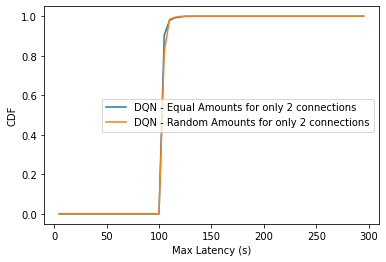

In [ ]:

plt.plot(stats22,dqn_cdf_equal)
plt.plot(stats22,dqn_cdf22)
plt.xlabel("Max Latency (s)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 2 connections', 'DQN - Random Amounts for only 2 connections'])
plt.show()

In [ ]:
######################################

In [ ]:
# Equal amounts for connect to 2 for 10 APs
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.7027027  0.82782783 0.88288288 0.90590591
 0.93193193 0.94694695 0.95795796 0.96496496 0.96896897 0.97297297
 0.97797798 0.98198198 0.98398398 0.98798799 0.98898899 0.99099099
 0.99199199 0.99399399 0.99399399 0.99499499 0.995996   0.995996
 0.995996   0.995996   0.995996   0.995996   0.995996   0.996997
 0.996997   0.997998   0.998999   0.998999   0.998999   0.998999
 0.998999   0.998999   0.998999   0.998999   0.998999  ]


In [ ]:
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.7027027  0.82782783 0.88288288 0.90590591
 0.93193193 0.94694695 0.95795796 0.96496496 0.96896897 0.97297297
 0.97797798 0.98198198 0.98398398 0.98798799 0.98898899 0.99099099
 0.99199199 0.99399399 0.99399399 0.99499499 0.995996   0.995996
 0.995996   0.995996   0.995996   0.995996   0.995996   0.996997
 0.996997   0.997998   0.998999   0.998999   0.998999   0.998999
 0.998999   0.998999   0.998999   0.998999   0.998999  ]


In [ ]:

# Random amounts for connect to 2 for 10 APs
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.74674675 0.94694695 0.96896897
 0.97597598 0.97797798 0.98098098 0.98298298 0.98698699 0.98698699
 0.98998999 0.99299299 0.99399399 0.99499499 0.99499499 0.99499499
 0.99499499 0.99499499 0.99499499 0.99499499 0.99499499 0.99499499
 0.99499499 0.99499499 0.99499499 0.99499499 0.996997   0.996997
 0.996997   0.996997   0.996997   0.996997   0.996997   0.996997
 0.996997   0.997998   0.997998   0.997998   0.997998  ]


In [ ]:
dqn_cdf_random = [0. ,        0. ,        0.  ,       0.      ,   0. ,        0.,
 0.      ,   0.     ,    0.      ,   0.      ,   0.,         0.,
 0.      ,   0.     ,    0.     ,    0.       ,  0.,         0.,
 0.      ,   0.      ,   0.    ,     0.74674675, 0.94694695, 0.96896897,
 0.97597598, 0.97797798, 0.98098098, 0.98298298, 0.98698699, 0.98698699,
 0.98998999, 0.99299299, 0.99399399, 0.99499499, 0.99499499, 0.99499499,
 0.99499499, 0.99499499, 0.99499499, 0.99499499, 0.99499499, 0.99499499,
 0.99499499, 0.99499499, 0.99499499, 0.99499499, 0.996997,   0.996997,
 0.996997 ,  0.996997 ,  0.996997,   0.996997,   0.996997,   0.996997,
 0.996997 ,  0.997998 ,  0.997998 ,  0.997998,   0.997998  ]

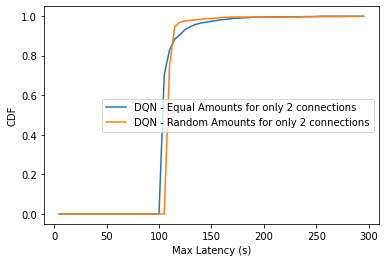

In [ ]:

plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,dqn_cdf_random)
plt.xlabel("Max Latency (s)")
plt.ylabel("CDF")
plt.legend(['DQN - Equal Amounts for only 2 connections', 'DQN - Random Amounts for only 2 connections'])
plt.show()

In [ ]:
########################################

In [ ]:
##10 APs - shadow fad - epsilon_greedy_frames:100000
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.46646647
 0.59359359 0.65065065 0.68368368 0.71671672 0.73573574 0.74774775
 0.75875876 0.77377377 0.79079079 0.8018018  0.80980981 0.81681682
 0.82482482 0.83083083 0.83683684 0.84384384 0.84884885 0.85585586
 0.86386386 0.86686687 0.87387387 0.87887888 0.88288288 0.88488488
 0.88688689 0.89489489 0.8988989  0.8998999  0.9009009  0.9019019
 0.9039039  0.90590591 0.90890891 0.91191191 0.91391391 0.91491491
 0.91491491 0.91691692 0.91891892 0.92092092 0.92092092 0.92192192
 0.92592593 0.92692693 0.92692693 0.92792793 0.92892893]


In [ ]:
##10 APs - shadow fad - epsilon_greedy_frames:100000
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.46646647
 0.59359359 0.65065065 0.68368368 0.71671672 0.73573574 0.74774775
 0.75875876 0.77377377 0.79079079 0.8018018  0.80980981 0.81681682
 0.82482482 0.83083083 0.83683684 0.84384384 0.84884885 0.85585586
 0.86386386 0.86686687 0.87387387 0.87887888 0.88288288 0.88488488
 0.88688689 0.89489489 0.8988989  0.8998999  0.9009009  0.9019019
 0.9039039  0.90590591 0.90890891 0.91191191 0.91391391 0.91491491
 0.91491491 0.91691692 0.91891892 0.92092092 0.92092092 0.92192192
 0.92592593 0.92692693 0.92692693 0.92792793 0.92892893]


In [ ]:
##10 APs - shadow fad - epsilon_greedy_frames:10000
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.21121121 0.46546547 0.57057057 0.64364364 0.68068068 0.70870871
 0.72972973 0.75375375 0.77277277 0.7967968  0.81081081 0.82582583
 0.83783784 0.84484484 0.85285285 0.85685686 0.86086086 0.86586587
 0.87187187 0.87687688 0.88288288 0.88688689 0.89189189 0.8968969
 0.8998999  0.90790791 0.90890891 0.91191191 0.91491491 0.91691692
 0.92192192 0.92492492 0.92792793 0.93093093 0.93393393 0.93393393
 0.93493493 0.93493493 0.93693694 0.93693694 0.93993994 0.94094094
 0.94194194 0.94294294 0.94494494 0.94894895 0.95195195]


In [ ]:
#10000
dqn_cdf_2 = [0.     ,    0.   ,      0.    ,     0.  ,       0.,         0.,
 0.   ,      0.      ,   0.     ,    0.    ,     0.    ,     0.,
 0.21121121, 0.46546547, 0.57057057, 0.64364364, 0.68068068, 0.70870871,
 0.72972973, 0.75375375, 0.77277277, 0.7967968,  0.81081081, 0.82582583,
 0.83783784, 0.84484484, 0.85285285, 0.85685686, 0.86086086, 0.86586587,
 0.87187187, 0.87687688, 0.88288288, 0.88688689, 0.89189189, 0.8968969,
 0.8998999,  0.90790791, 0.90890891, 0.91191191, 0.91491491, 0.91691692,
 0.92192192, 0.92492492, 0.92792793, 0.93093093, 0.93393393, 0.93393393,
 0.93493493, 0.93493493, 0.93693694, 0.93693694, 0.93993994, 0.94094094,
 0.94194194, 0.94294294, 0.94494494, 0.94894895, 0.95195195]

In [ ]:
##10 APs - shadow fad - epsilon_greedy_frames:1000 re-do
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.07507508 0.28028028 0.35935936 0.41341341
 0.46046046 0.5015015  0.53153153 0.56356356 0.58058058 0.6046046
 0.62962963 0.64964965 0.66166166 0.67167167 0.68268268 0.6956957
 0.70870871 0.72072072 0.73373373 0.73973974 0.74874875 0.75775776
 0.76176176 0.76476476 0.77277277 0.78278278 0.79279279 0.7957958
 0.8038038  0.81181181 0.81681682 0.81781782 0.82182182 0.82782783
 0.83183183 0.83683684 0.84684685 0.84884885 0.85085085 0.85385385
 0.85985986 0.86286286 0.86386386 0.86886887 0.87587588 0.87687688
 0.87987988 0.87987988 0.88088088 0.88388388 0.88488488]


In [ ]:
#10 APs - shadow fad - epsilon_greedy_frames:1000
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.07507508 0.28028028 0.35935936 0.41341341
 0.46046046 0.5015015  0.53153153 0.56356356 0.58058058 0.6046046
 0.62962963 0.64964965 0.66166166 0.67167167 0.68268268 0.6956957
 0.70870871 0.72072072 0.73373373 0.73973974 0.74874875 0.75775776
 0.76176176 0.76476476 0.77277277 0.78278278 0.79279279 0.7957958
 0.8038038  0.81181181 0.81681682 0.81781782 0.82182182 0.82782783
 0.83183183 0.83683684 0.84684685 0.84884885 0.85085085 0.85385385
 0.85985986 0.86286286 0.86386386 0.86886887 0.87587588 0.87687688
 0.87987988 0.87987988 0.88088088 0.88388388 0.88488488]


In [ ]:
#1000
dqn_cdf_3 = [0.       ,  0.   ,      0.       ,  0.       ,  0.        , 0.,
 0.     ,    0.        , 0.07507508, 0.28028028, 0.35935936, 0.41341341,
 0.46046046, 0.5015015 , 0.53153153, 0.56356356, 0.58058058, 0.6046046,
 0.62962963, 0.64964965, 0.66166166, 0.67167167, 0.68268268, 0.6956957,
 0.70870871, 0.72072072, 0.73373373, 0.73973974, 0.74874875, 0.75775776,
 0.76176176, 0.76476476, 0.77277277, 0.78278278, 0.79279279, 0.7957958,
 0.8038038,  0.81181181, 0.81681682, 0.81781782, 0.82182182, 0.82782783,
 0.83183183, 0.83683684, 0.84684685, 0.84884885, 0.85085085, 0.85385385,
 0.85985986, 0.86286286, 0.86386386, 0.86886887, 0.87587588, 0.87687688,
 0.87987988, 0.87987988, 0.88088088 ,0.88388388, 0.88488488]

In [ ]:
#10 APs - shadow fad - epsilon_greedy_frames:100
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.21121121 0.46546547 0.57057057 0.64364364 0.68068068 0.70870871
 0.72972973 0.75375375 0.77277277 0.7967968  0.81081081 0.82582583
 0.83783784 0.84484484 0.85285285 0.85685686 0.86086086 0.86586587
 0.87187187 0.87687688 0.88288288 0.88688689 0.89189189 0.8968969
 0.8998999  0.90790791 0.90890891 0.91191191 0.91491491 0.91691692
 0.92192192 0.92492492 0.92792793 0.93093093 0.93393393 0.93393393
 0.93493493 0.93493493 0.93693694 0.93693694 0.93993994 0.94094094
 0.94194194 0.94294294 0.94494494 0.94894895 0.95195195]


In [ ]:
#100 
dqn_cdf_4 = [0.    ,     0.   ,      0.    ,     0.    ,     0.,         0.,
 0.   ,      0.    ,     0.     ,    0.    ,     0.      ,   0.,
 0.21121121, 0.46546547, 0.57057057, 0.64364364, 0.68068068, 0.70870871,
 0.72972973, 0.75375375, 0.77277277, 0.7967968 , 0.81081081, 0.82582583,
 0.83783784, 0.84484484, 0.85285285, 0.85685686, 0.86086086, 0.86586587,
 0.87187187, 0.87687688, 0.88288288, 0.88688689, 0.89189189, 0.8968969,
 0.8998999 , 0.90790791, 0.90890891, 0.91191191, 0.91491491, 0.91691692,
 0.92192192, 0.92492492, 0.92792793, 0.93093093, 0.93393393, 0.93393393,
 0.93493493, 0.93493493, 0.93693694, 0.93693694, 0.93993994, 0.94094094,
 0.94194194 ,0.94294294, 0.94494494, 0.94894895, 0.95195195]

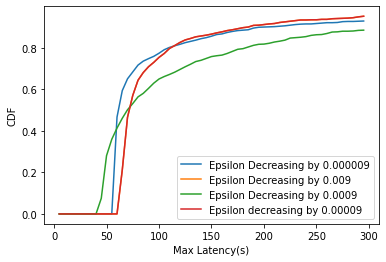

In [ ]:

#plt.xlim(0, 70)
plt.plot(stats22,dqn_cdf22)
plt.plot(stats22,dqn_cdf_4)
plt.plot(stats22,dqn_cdf_3)
plt.plot(stats22,dqn_cdf_2)
plt.xlabel("Max Latency(s)")
plt.ylabel("CDF")
plt.legend(['Epsilon Decreasing by 0.000009', 'Epsilon Decreasing by 0.009', 'Epsilon Decreasing by 0.0009', 'Epsilon decreasing by 0.00009'])
plt.show()

In [ ]:
########################################

In [ ]:
#10 APs - epsilon_greedy_frames:100
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.001001   0.45745746 0.65965966 0.73873874
 0.77677678 0.82782783 0.85785786 0.87587588 0.89289289 0.9029029
 0.91291291 0.91991992 0.92692693 0.93393393 0.93993994 0.94894895
 0.95495495 0.96096096 0.96796797 0.97097097 0.97597598 0.98198198
 0.98298298 0.98398398 0.98698699 0.98798799 0.98898899 0.98898899
 0.99099099 0.99199199 0.99199199 0.99299299 0.99299299 0.99299299
 0.99499499 0.99499499 0.99499499 0.99499499 0.995996   0.995996
 0.995996   0.996997   0.996997   0.996997   0.996997   0.996997
 0.996997   0.996997   0.996997   0.996997   0.996997  ]


In [ ]:
#10 APs - epsilon_greedy_frames:10000
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.001001   0.45745746 0.65965966 0.73873874
 0.77677678 0.82782783 0.85785786 0.87587588 0.89289289 0.9029029
 0.91291291 0.91991992 0.92692693 0.93393393 0.93993994 0.94894895
 0.95495495 0.96096096 0.96796797 0.97097097 0.97597598 0.98198198
 0.98298298 0.98398398 0.98698699 0.98798799 0.98898899 0.98898899
 0.99099099 0.99199199 0.99199199 0.99299299 0.99299299 0.99299299
 0.99499499 0.99499499 0.99499499 0.99499499 0.995996   0.995996
 0.995996   0.996997   0.996997   0.996997   0.996997   0.996997
 0.996997   0.996997   0.996997   0.996997   0.996997  ]


In [ ]:
dqn_cdf_4 = [0.   ,      0.     ,    0.       ,  0.  ,       0.        , 0.,
 0.    ,     0.        , 0.001001 ,  0.45745746 ,0.65965966, 0.73873874,
 0.77677678, 0.82782783, 0.85785786, 0.87587588 ,0.89289289 ,0.9029029,
 0.91291291, 0.91991992, 0.92692693, 0.93393393 ,0.93993994 ,0.94894895,
 0.95495495, 0.96096096, 0.96796797, 0.97097097 ,0.97597598 ,0.98198198,
 0.98298298, 0.98398398, 0.98698699, 0.98798799 ,0.98898899 ,0.98898899,
 0.99099099, 0.99199199, 0.99199199, 0.99299299 ,0.99299299 ,0.99299299,
 0.99499499, 0.99499499, 0.99499499, 0.99499499 ,0.995996   ,0.995996,
 0.995996 ,  0.996997 ,  0.996997 ,  0.996997  , 0.996997   ,0.996997,
 0.996997 ,  0.996997,   0.996997 ,  0.996997 ,  0.996997  ]
[ ]


[]

In [ ]:
#10 APs - epsilon_greedy_frames:1000
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.001001   0.45745746 0.65965966 0.73873874
 0.77677678 0.82782783 0.85785786 0.87587588 0.89289289 0.9029029
 0.91291291 0.91991992 0.92692693 0.93393393 0.93993994 0.94894895
 0.95495495 0.96096096 0.96796797 0.97097097 0.97597598 0.98198198
 0.98298298 0.98398398 0.98698699 0.98798799 0.98898899 0.98898899
 0.99099099 0.99199199 0.99199199 0.99299299 0.99299299 0.99299299
 0.99499499 0.99499499 0.99499499 0.99499499 0.995996   0.995996
 0.995996   0.996997   0.996997   0.996997   0.996997   0.996997
 0.996997   0.996997   0.996997   0.996997   0.996997  ]


In [ ]:
dqn_cdf_2 = [0.      ,   0.   ,      0.       ,  0. ,        0. ,        0.,
 0.       ,  0.       ,  0.001001,   0.45745746, 0.65965966, 0.73873874,
 0.77677678, 0.82782783, 0.85785786 ,0.87587588, 0.89289289, 0.9029029,
 0.91291291, 0.91991992, 0.92692693, 0.93393393, 0.93993994, 0.94894895,
 0.95495495, 0.96096096, 0.96796797, 0.97097097, 0.97597598, 0.98198198,
 0.98298298, 0.98398398, 0.98698699, 0.98798799, 0.98898899, 0.98898899,
 0.99099099, 0.99199199, 0.99199199, 0.99299299, 0.99299299, 0.99299299,
 0.99499499, 0.99499499, 0.99499499, 0.99499499, 0.995996,   0.995996,
 0.995996 ,  0.996997 ,  0.996997,   0.996997 ,  0.996997,   0.996997,
 0.996997 ,  0.996997 ,  0.996997,   0.996997,   0.996997  ]

In [ ]:
#10 APs - epsilon_greedy_frames: 100000
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.64564565 0.91391391 0.96396396
 0.97897898 0.98698699 0.99099099 0.99299299 0.995996   0.995996
 0.995996   0.996997   0.997998   0.997998   1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


In [ ]:
dqn_cdf_3 = [0.  ,       0.    ,     0.    ,     0.   ,      0.      ,   0.,
 0.     ,    0.      ,   0.      ,   0.64564565, 0.91391391, 0.96396396,
 0.97897898, 0.98698699, 0.99099099, 0.99299299, 0.995996,   0.995996,
 0.995996,   0.996997  , 0.997998,   0.997998,   1.  ,       1.,
 1.   ,      1.  ,       1.    ,     1. ,        1.  ,       1.,
 1.   ,      1.  ,       1.   ,      1. ,        1.  ,       1.,
 1.   ,      1.  ,       1.   ,      1. ,        1.  ,       1.,
 1.   ,      1.  ,       1.   ,      1. ,        1.  ,       1.,
 1.   ,      1.  ,       1.  ,       1. ,        1.  ,       1.,
 1.   ,      1.  ,       1.  ,       1. ,        1.        ]

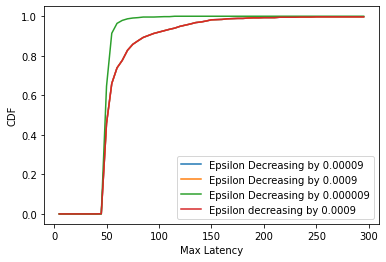

In [ ]:

#plt.xlim(0, 70)
plt.plot(stats22,dqn_cdf_4)
plt.plot(stats22,dqn_cdf_2)
plt.plot(stats22,dqn_cdf_3)
plt.plot(stats22,dqn_cdf22)
plt.xlabel("Max Latency")
plt.ylabel("CDF")
plt.legend(['Epsilon Decreasing by 0.00009', 'Epsilon Decreasing by 0.0009', 'Epsilon Decreasing by 0.000009', 'Epsilon decreasing by 0.0009'])
plt.show()

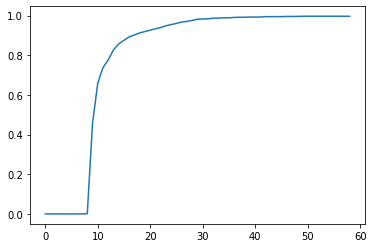

In [ ]:
plt.plot(dqn_cdf_4) # 10000

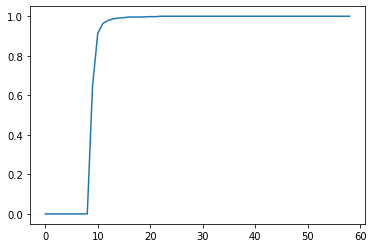

In [ ]:
plt.plot(dqn_cdf_3) #100000

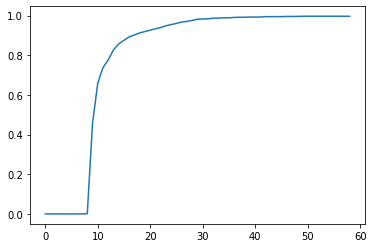

In [ ]:
plt.plot(dqn_cdf_2) #1000

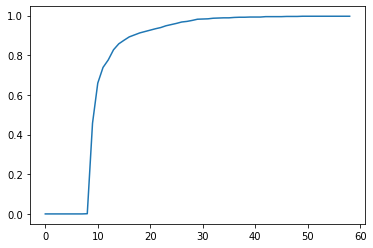

In [ ]:
plt.plot(dqn_cdf22)

In [ ]:
#with seeds
print(dqn_cdf22)

[0.         0.         0.         0.         0.         0.
 0.         0.21521522 0.28828829 0.34834835 0.40540541 0.46346346
 0.51251251 0.55455455 0.58458458 0.61361361 0.64364364 0.67267267
 0.6966967  0.70970971 0.72372372 0.73573574 0.74474474 0.75475475
 0.76576577 0.77277277 0.77977978 0.78378378 0.78678679 0.79479479
 0.8018018  0.80580581 0.81381381 0.81881882 0.82182182 0.82482482
 0.82982983 0.83383383 0.83983984 0.84284284 0.84784785 0.85185185
 0.86186186 0.86886887 0.87087087 0.87487487 0.87487487 0.87787788
 0.87987988 0.88188188 0.88188188 0.88388388 0.88588589 0.88888889
 0.89189189 0.89489489 0.89489489 0.8968969  0.8988989 ]


In [ ]:
print(dqn_cdf)

[0.      0.      0.      0.0984  0.19925 0.29285 0.3571  0.40945 0.45205
 0.4871  0.5156  0.5417  0.56465 0.58485 0.60315 0.62055 0.63655 0.65115
 0.6639  0.6765  0.68775 0.69875 0.70975 0.71855 0.7274  0.73545 0.7427
 0.7499  0.75725 0.76265 0.7686  0.77365 0.7787  0.783   0.78655 0.7907
 0.7953  0.79925 0.80325 0.8071  0.81055 0.8144  0.81795 0.8214  0.82405
 0.82725 0.82945 0.83185 0.8343  0.83675 0.8391  0.8418  0.8437  0.84575
 0.8477  0.84985 0.8517  0.8539  0.8558  0.8575  0.8598  0.86215 0.8637
 0.8655  0.86645 0.8683  0.87015 0.87165 0.8728  0.87445 0.8761  0.87815
 0.8795  0.8809  0.882   0.8829  0.88415 0.88575 0.8868  0.8881  0.8889
 0.88995 0.8907  0.8918  0.8929  0.89415 0.89525 0.89625 0.8971  0.89815
 0.8992  0.9006  0.9009  0.90195 0.9029  0.90375 0.9049  0.90575 0.9067
 0.9076  0.90835 0.9089  0.90945 0.9101  0.9107  0.91145 0.9125  0.9131
 0.9137  0.91425 0.91525 0.9159  0.91675 0.9174  0.91765 0.9184  0.91895
 0.91945 0.91995 0.9204  0.921   0.92145 0.9218  0.92225 

In [ ]:
stats = np.arange(5, 8000000, 5) #3000 #10000000
#stats = np.arange(100, 3000, 100)
ep_cdf =np.zeros([1,len(stats)])[0]
unif_cdf =np.zeros([1,len(stats)])[0]
const_cdf =np.zeros([1,len(stats)])[0]
count = 0
for il in stats:
  tata = len(np.argwhere(ep_reward_list<il))
  tata2 = len(np.argwhere(unif_reward_list<il))
  tata3 = len(np.argwhere(const_reward_list<il))
  ep_cdf[count] = tata/len(ep_reward_list)#999#1000
  unif_cdf[count] = tata2/len(unif_reward_list)#999#1000
  const_cdf[count] = tata3/len(const_reward_list)#999#1000
  count = count + 1

plt.xlim(0, 70)
plt.plot(ep_cdf)
plt.plot(unif_cdf)
plt.plot(const_cdf)
plt.xlabel("Max Latency (s)")
plt.ylabel("CDF")
plt.legend(['Distributed method w/DDPG', 'Uniform Method', 'Best Channel Method'])
plt.show()

KeyboardInterrupt: ignored

In [ ]:
print(len(ep_reward_list))
print(len(testlines))
print(len(const_reward_list))
print(indexxx)
print(actor_lr)
#print(xx1)
#print(xx2)
#print(ep_reward_list)

999
2000
999
2000
0.001


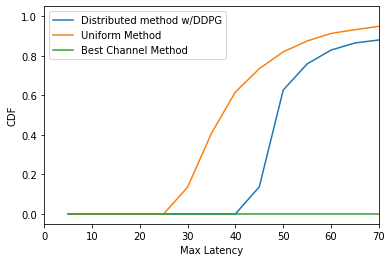

In [ ]:
#stats = np.arange(10, 8000000, 10) #3000 #10000000
stats = np.arange(5, 500, 5)
ep_cdf =np.zeros([1,len(stats)])[0]
unif_cdf =np.zeros([1,len(stats)])[0]
const_cdf =np.zeros([1,len(stats)])[0]
count = 0
for il in stats:
  tata = len(np.argwhere(ep_reward_list<il))
  tata2 = len(np.argwhere(unif_reward_list<il))
  tata3 = len(np.argwhere(const_reward_list<il))
  '''
  ep_cdf[count] = tata/999#1000
  unif_cdf[count] = tata2/999#1000
  const_cdf[count] = tata3/999#1000
  '''
  ep_cdf[count] = tata/(len(ep_reward_list))#999#1000
  unif_cdf[count] = tata2/(len(unif_reward_list))#999#1000
  const_cdf[count] = tata3/(len(const_reward_list))#999#1000
  count = count + 1

plt.xlim(0, 70)
plt.plot(stats,ep_cdf)
plt.plot(stats,unif_cdf)
plt.plot(stats,const_cdf)
plt.xlabel("Max Latency")
plt.ylabel("CDF")
plt.legend(['Distributed method w/DDPG', 'Uniform Method', 'Best Channel Method'])
plt.show()

In [ ]:
#cdf ver 2

print(len(ep_cdf))
print(len(stats))
'''
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

N = len(ep_reward_list)
data = ep_reward_list #np.random.randn(N)
count, bins_count = np.histogram(data, bins=100)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()
'''

'''
sorted_ddpg = np.sort(ep_reward_list)
sorted_const = np.sort(const_reward_list)
sorted_unif = np.sort(unif_reward_list)
p = 1. * np.arange(len(sorted_ddpg)) / float(len(sorted_ddpg) - 1)
p_const = 1. * np.arange(len(sorted_const)) / float(len(sorted_const) - 1)
p_unif = 1. * np.arange(len(sorted_unif)) / float(len(sorted_unif) - 1)


figure, axis = plt.subplots(2, 2)
  

plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
plot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3, colspan=2)
plot3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)

plot2.plot(sorted_ddpg, p)
plot2.set_title('DDPG')
  
# Plot for exponent
plot1.plot(sorted_const, p_const)
plot1.set_title('Best Channel')
  
# Plot for Square
plot3.plot(sorted_unif, p_unif)
plot3.set_title('Uniform')
  
# Packing all the plots and displaying them
plt.tight_layout()
plt.show()



#plt.plot(p_const)
#plt.xlabel("Max Latency")
#plt.ylabel("CDF")
#plt.legend(['Distributed method w/DDPG', 'Uniform Method', 'Best Channel Method'])
plt.show()
'''

99
99


'\nsorted_ddpg = np.sort(ep_reward_list)\nsorted_const = np.sort(const_reward_list)\nsorted_unif = np.sort(unif_reward_list)\np = 1. * np.arange(len(sorted_ddpg)) / float(len(sorted_ddpg) - 1)\np_const = 1. * np.arange(len(sorted_const)) / float(len(sorted_const) - 1)\np_unif = 1. * np.arange(len(sorted_unif)) / float(len(sorted_unif) - 1)\n\n\nfigure, axis = plt.subplots(2, 2)\n  \n\nplot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)\nplot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3, colspan=2)\nplot3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)\n\nplot2.plot(sorted_ddpg, p)\nplot2.set_title(\'DDPG\')\n  \n# Plot for exponent\nplot1.plot(sorted_const, p_const)\nplot1.set_title(\'Best Channel\')\n  \n# Plot for Square\nplot3.plot(sorted_unif, p_unif)\nplot3.set_title(\'Uniform\')\n  \n# Packing all the plots and displaying them\nplt.tight_layout()\nplt.show()\n\n\n\n#plt.plot(p_const)\n#plt.xlabel("Max Latency")\n#plt.ylabel("CDF")\n#plt.legend([\'Distributed method w/DDPG\', \'Uni

In [ ]:
print(new_rate)
'''
print(rate[0])
x = rate[0][:]
print(x)
x[6] = 0
print(x)
'''
#print(rate[0])
#print(sum_temp)
#print(sum_den)

'''
print('alphasss_indices')
print(alphasss_indices)
print('Alphas')
print(alphasss)
print('Original rate')
print(rate)
print('New_rate')
print(new_rate)
print('New alphasss')
print(new_alphasss)
'''

####print(actions[0])
###print(actions[1])
#print(sum_temp)
#print(rate[0])
#print(new_rate)
#print(alphasss)
###########print(B*np.log2(1+((sum_temp[0])/(1+sum_den[0]))))

'''
x = B*np.log2(1+((sum_temp[0])/(1+sum_den[0])))
print('rate')
print(x)
print(type(x))
y = x.copy()
print('copy rate')
print(y)
print('new y')
y[6] = 1
print(y)
print('Original x')
print(x)
'''


#print(np.where(actions[0]==0)[0])
#print(np.where(actions[1]==0)[0])
#print(np.where(rate[0]==0)[0])

'''
print(actions[sew])
print(len(product))
print(new_rate)
print(rate[0])
print(new_alphasss)
'''

[]


'\nprint(actions[sew])\nprint(len(product))\nprint(new_rate)\nprint(rate[0])\nprint(new_alphasss)\n'